In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from scipy.stats import ttest_ind, pointbiserialr, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from info_gain import info_gain
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree, metrics
#from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Understanding

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
print(list(df.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [5]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [6]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


# Step 2: Filtering High Value Customers

**Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

**Hence, the columns to be considered are: total_rech_amt_6, total_rech_amt_7, av_rech_amt_data_6, av_rech_amt_data_7, total_rech_data_6, total_rech_data_7.**     

In [7]:
#Checking the nulls in the dataset for these particular columns
print(df['total_rech_amt_6'].isnull().sum())
print(df['total_rech_amt_7'].isnull().sum())
print(df['av_rech_amt_data_6'].isnull().sum())
print(df['av_rech_amt_data_7'].isnull().sum())
print(df['total_rech_data_6'].isnull().sum())
print(df['total_rech_data_7'].isnull().sum())

0
0
74846
74428
74846
74428


In [8]:
#Imputing the missing values with zeros
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0)

**Similarly, we take the same decision to impute the missing values as zeroes for corresponding columns in action phase 8.**

In [9]:
print(df['total_rech_amt_8'].isnull().sum())
print(df['av_rech_amt_data_8'].isnull().sum())
print(df['total_rech_data_8'].isnull().sum())

0
73660
73660


In [10]:
#Imputing the missing values with zeroes for the corresponding columns in the action phase - 8
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0)

In [11]:
#Finding the totals for months 6 and 7 
df['voice_recharge_good'] = df['total_rech_amt_6'] + df['total_rech_amt_7']/2

In [12]:
#Finding the total recharge data amount for months 6 and 7
df['data_recharge_good'] = (df['av_rech_amt_data_6']*df['total_rech_data_6']+df['av_rech_amt_data_7']*df['total_rech_data_7'])/2

In [13]:
#Average recharge amount for months 6 & 7
df['rech_amt_good'] = df['voice_recharge_good']+df['data_recharge_good']

In [14]:
#Finding the 70th percentile for finding the high value customers
high_val = df['rech_amt_good'].quantile(0.7)

In [15]:
print(high_val)

677.0


In [16]:
df['highvalcust'] = df['rech_amt_good'].apply(lambda x: 1 if x>high_val else 0)

In [17]:
df[['highvalcust','rech_amt_good']]

,highvalcust,rech_amt_good
0,1,740.0
1,0,343.0
2,0,325.5
3,0,385.0
4,0,399.0
...,...,...
99994,0,115.0
99995,0,165.0
99996,0,158.0
99997,1,1792.5


In [18]:
df['highvalcust'].value_counts()

0    70023
1    29976
Name: highvalcust, dtype: int64

In [19]:
df = df[df['highvalcust']==1]

In [20]:
df.shape

(29976, 230)

In [21]:
#Check nulls again

In [22]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [23]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
max_rech_data_9,52.098345
fb_user_9,52.098345
date_of_last_rech_data_9,52.098345
arpu_3g_9,52.098345
av_rech_amt_data_9,52.098345
total_rech_data_9,52.098345
arpu_2g_9,52.098345
night_pck_user_9,52.098345
count_rech_2g_9,52.098345
count_rech_3g_9,52.098345


# Step 3: Creating the column - Churn

**As per assignment guidelines: Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:**
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [24]:
#Checking the nulls
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(df.index)*100

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [25]:
#Checking the nulls
df[['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']].isnull().sum()/len(df.index)*100

total_ic_mou_8    0.0
total_og_mou_8    0.0
vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
dtype: float64

In [26]:
#Describe these columns
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29976.000000,29976.000000,29976.000000,29976.000000
mean,265.602725,505.338067,85.105071,333.547165
std,358.114302,657.521776,274.083497,940.582929
min,0.000000,0.000000,0.000000,0.000000
25%,51.475000,55.087500,0.000000,0.000000
50%,159.890000,302.695000,0.000000,0.000000
75%,344.322500,701.817500,29.552500,252.565000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [27]:
#Finding the total usage in Month 9
df['total_usage_9'] = df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']

In [28]:
#Creating the column - churn using the total usage in Month 9
df['churn'] = df['total_usage_9'].apply(lambda x: 'No' if x>0 else 'Yes')

In [29]:
#Here we confirm if the churn column was prepared properly
print(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']])

       total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9 churn
0                0.00            0.00         0.00         0.00   Yes
7                0.00            0.00         0.00         0.00   Yes
8               34.91          142.18         0.00         0.00    No
16             334.56          255.74         0.00         0.00    No
17              87.13          631.08         0.00         0.00    No
...               ...             ...          ...          ...   ...
99984          149.26           14.44       723.41       232.56    No
99986          547.11         1095.24         9.14       941.48    No
99988          265.84          182.16         0.05       393.34    No
99997            2.21            0.00        85.67      4177.14    No
99998            0.00            0.00         0.00         0.00   Yes

[29976 rows x 5 columns]


In [30]:
#Find the value_counts for the churn
df['churn'].value_counts()

No     27350
Yes     2626
Name: churn, dtype: int64

**Hence, there are 2433 people who have churned out of the 29953. Lets visualize it better in a pie chart.**

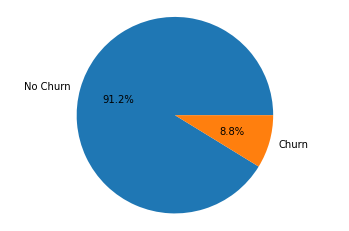

This is a class imbalance problem , which will be later handled using SMOTE technique


In [31]:
#Pie chart for the target variable - Churn
labels = ['No Churn','Churn']
sizes = [df['churn'].value_counts()[0],df['churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()
plt.show()
print('This is a class imbalance problem , which will be later handled using SMOTE technique')

**As we have created the desired column 'churn', we can now remove all the columns for month 9 as guided in the problem statement.**

In [32]:
text = '_9'
filtered_9 = list(filter(lambda x: True if text in x else False,list(df.columns)))

In [33]:
filtered_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [34]:
#Dropping the columns for September
df = df.drop(filtered_9,axis = 1)

In [35]:
#No of columns
df.shape

(29976, 177)

# Step 4: Data Cleaning

In [36]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
count_rech_2g_8,49.809848
date_of_last_rech_data_8,49.809848
arpu_3g_8,49.809848
fb_user_8,49.809848
arpu_2g_8,49.809848
max_rech_data_8,49.809848
count_rech_3g_8,49.809848
night_pck_user_8,49.809848
date_of_last_rech_data_7,47.641446
max_rech_data_7,47.641446


**As per assignment guidelines** <br>
We will be focusing on usage based churn and these columns are having very high nulls. Hence below featues related to revenue will be dropped.

In [37]:
for  column in df.columns:
    if 'rech' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'arpu' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'last_date_of_month' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'rch' in column:
        print(column)
        df = df.drop(column,axis=1)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
last_day_rch_amt_6
last_day_rch_amt_7
last_day_rch_amt_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
total_rech_data_6
total_rech_data_7
total_rech_data_8
max_rech_data_6
max_rech_data_7
max_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
voice_recharge_good
data_recharge_good
rech_amt_good


In [38]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
night_pck_user_8,49.809848
fb_user_8,49.809848
night_pck_user_7,47.641446
fb_user_7,47.641446
night_pck_user_6,47.117694
fb_user_6,47.117694
loc_ic_t2m_mou_8,4.153323
loc_ic_t2f_mou_8,4.153323
std_og_t2t_mou_8,4.153323
std_og_t2m_mou_8,4.153323


**Handling the columns: night_pck_user & fb_user**

In [39]:
df.pivot_table(values = 'night_pck_user_6', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_6
churn,
No,354.0
Yes,36.0


In [40]:
df.pivot_table(values = 'night_pck_user_7', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_7
churn,
No,333.0
Yes,22.0


In [41]:
df.pivot_table(values = 'night_pck_user_8', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_8
churn,
No,320.0
Yes,9.0


**Seeing the night_pck_user in Good & action phases, we conclude that this is not affecting churn much. These columns can be dropped.**

In [42]:
df = df.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1)

In [43]:
df.shape

(29976, 126)

**Converting Fb_user to categorical columns**

In [44]:
df['fb_user_good'] = df['fb_user_6'] + df['fb_user_7']

In [45]:
df['fb_user_good'].value_counts()

2.0    12305
0.0      685
1.0      323
Name: fb_user_good, dtype: int64

In [46]:
#Converting Fb_user to categorical columns
def fill(x):
    if x==0.0: return 'No'
    elif x>0: return 'Yes'
    else: return 'Unknown'
fb_user_columns = ['fb_user_good','fb_user_8']

for column in fb_user_columns:
    df[column] = df[column].apply(fill)
    df[column] = df[column].astype('str')
    
df['fb_user_good'].value_counts()

Unknown    16663
Yes        12628
No           685
Name: fb_user_good, dtype: int64

In [47]:
df = df.drop(['fb_user_6','fb_user_7'],axis=1)
df = df.rename(columns={'fb_user_8': 'fb_user_action'})

In [48]:
df['fb_user_good'].value_counts()

Unknown    16663
Yes        12628
No           685
Name: fb_user_good, dtype: int64

In [49]:
#Dropping mobile number
df=df.drop('mobile_number',axis=1)

In [50]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
std_ic_t2t_mou_8,4.153323
loc_og_t2t_mou_8,4.153323
loc_og_t2m_mou_8,4.153323
loc_og_t2f_mou_8,4.153323
loc_ic_mou_8,4.153323
loc_og_t2c_mou_8,4.153323
loc_ic_t2f_mou_8,4.153323
loc_og_mou_8,4.153323
loc_ic_t2m_mou_8,4.153323
loc_ic_t2t_mou_8,4.153323


In [51]:
for column in df.select_dtypes(exclude=['object']).columns.to_list():
    median = df[column].median()
    df[column] = df[column].fillna(median)

In [52]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
circle_id,0.0
std_ic_t2f_mou_8,0.0
isd_ic_mou_6,0.0
spl_ic_mou_8,0.0
spl_ic_mou_7,0.0
spl_ic_mou_6,0.0
total_ic_mou_8,0.0
total_ic_mou_7,0.0
total_ic_mou_6,0.0
std_ic_mou_8,0.0


### Understanding Data

circle_id


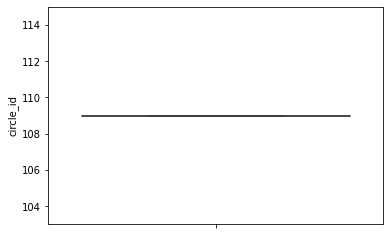

loc_og_t2o_mou


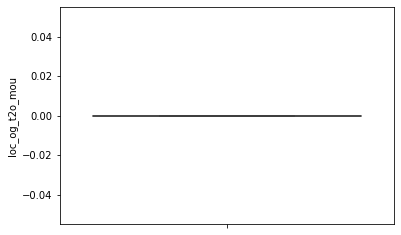

std_og_t2o_mou


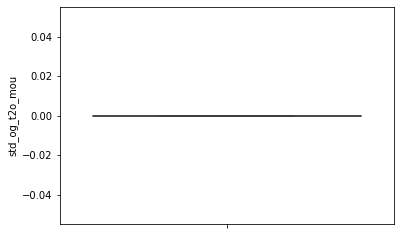

loc_ic_t2o_mou


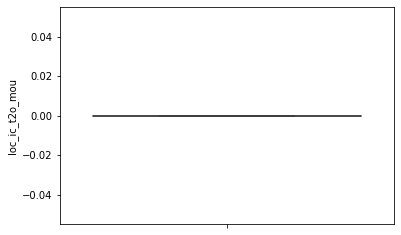

onnet_mou_6


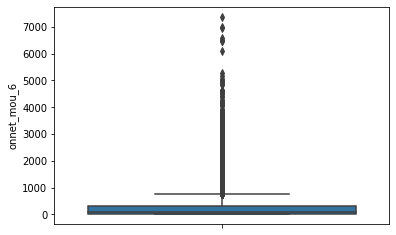

onnet_mou_7


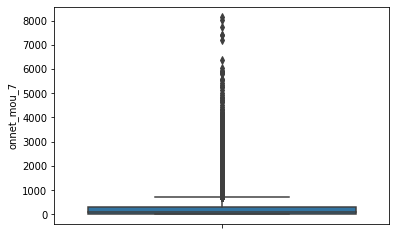

onnet_mou_8


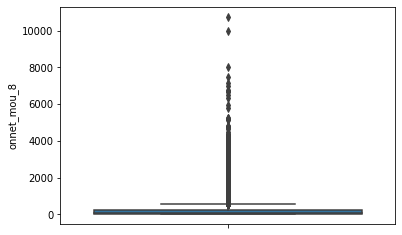

offnet_mou_6


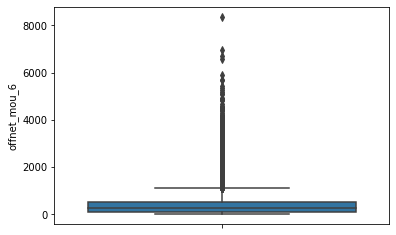

offnet_mou_7


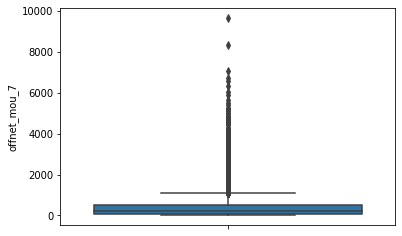

offnet_mou_8


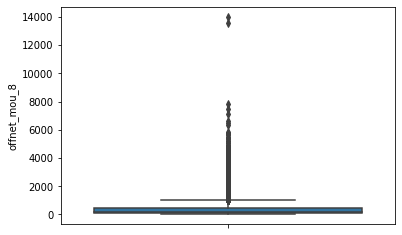

roam_ic_mou_6


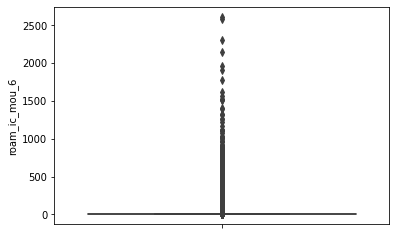

roam_ic_mou_7


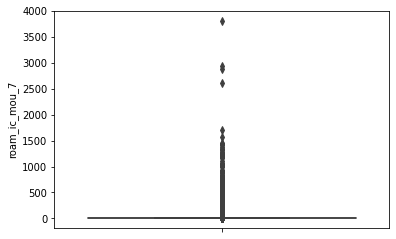

roam_ic_mou_8


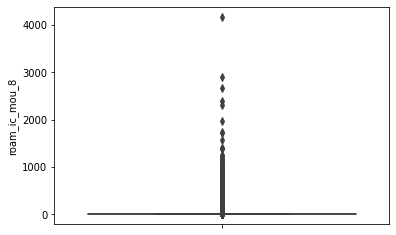

roam_og_mou_6


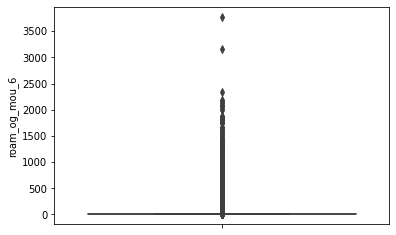

roam_og_mou_7


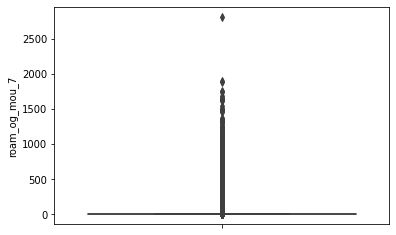

roam_og_mou_8


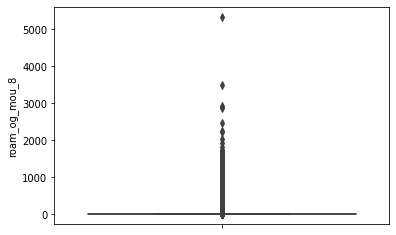

loc_og_t2t_mou_6


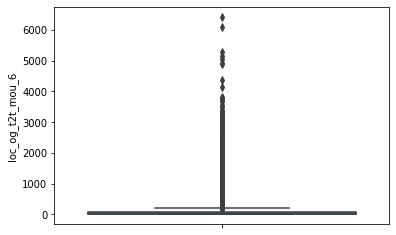

loc_og_t2t_mou_7


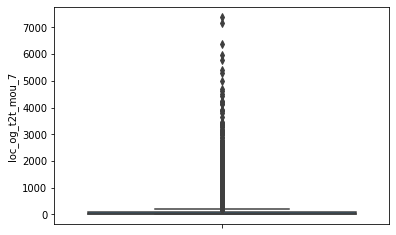

loc_og_t2t_mou_8


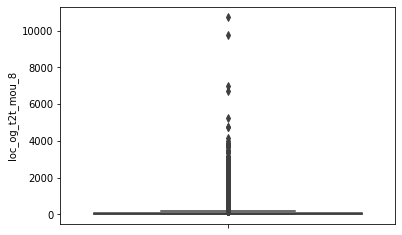

loc_og_t2m_mou_6


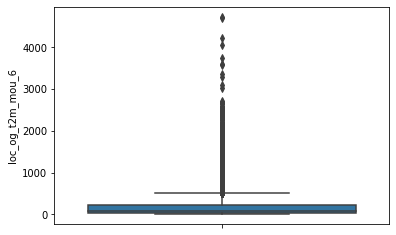

loc_og_t2m_mou_7


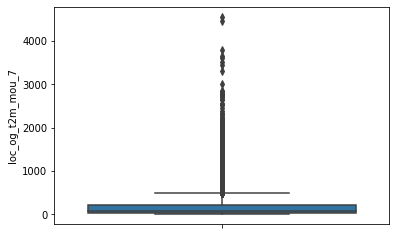

loc_og_t2m_mou_8


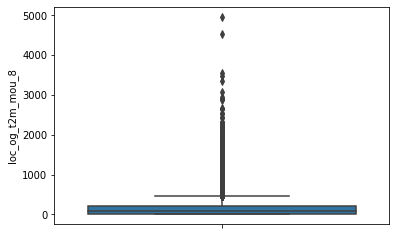

loc_og_t2f_mou_6


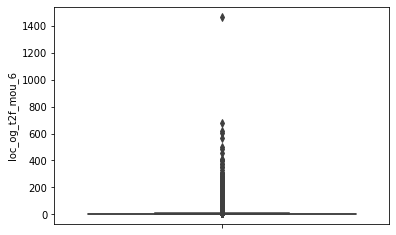

loc_og_t2f_mou_7


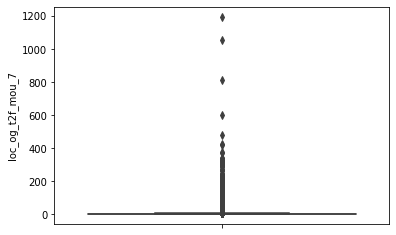

loc_og_t2f_mou_8


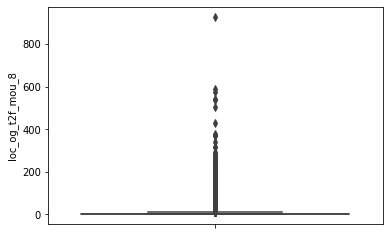

loc_og_t2c_mou_6


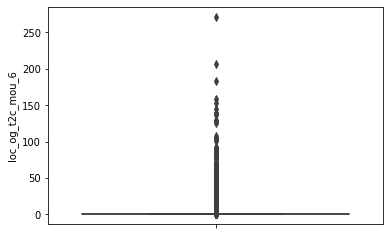

loc_og_t2c_mou_7


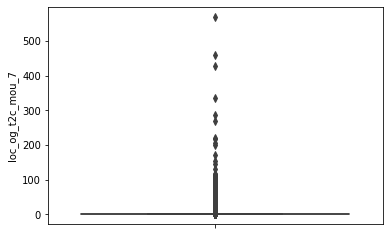

loc_og_t2c_mou_8


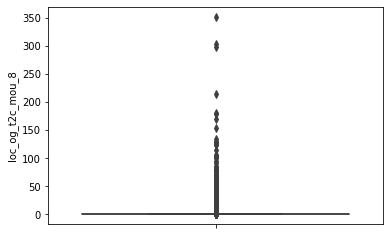

loc_og_mou_6


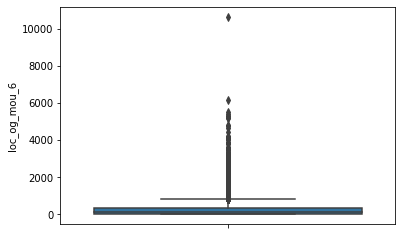

loc_og_mou_7


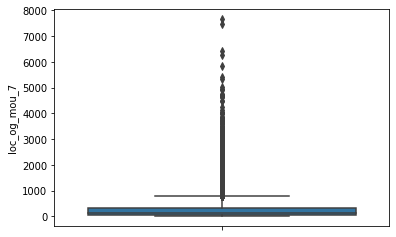

loc_og_mou_8


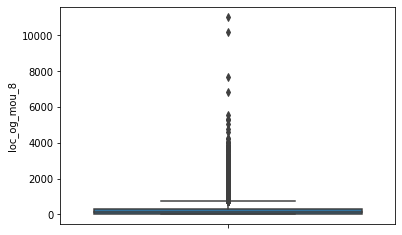

std_og_t2t_mou_6


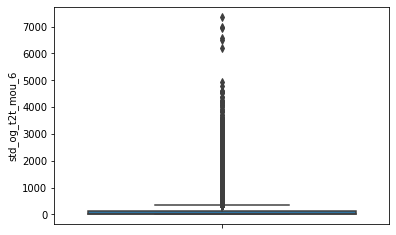

std_og_t2t_mou_7


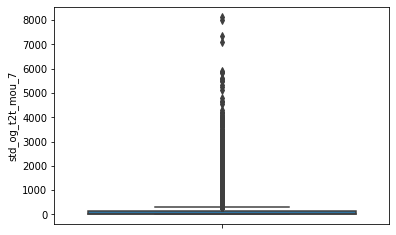

std_og_t2t_mou_8


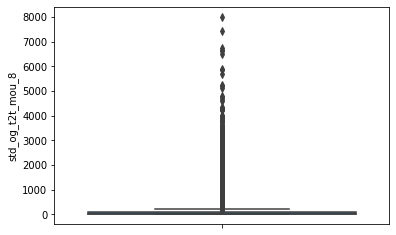

std_og_t2m_mou_6


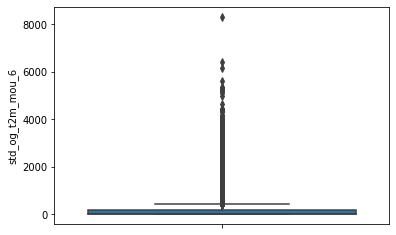

std_og_t2m_mou_7


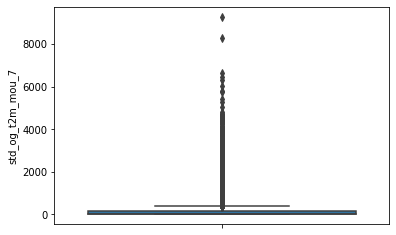

std_og_t2m_mou_8


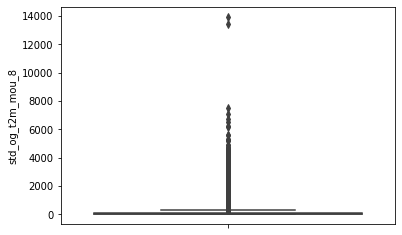

std_og_t2f_mou_6


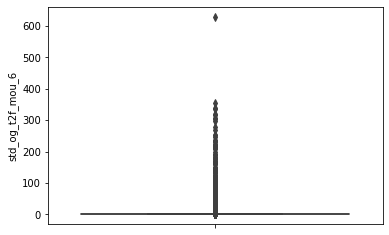

std_og_t2f_mou_7


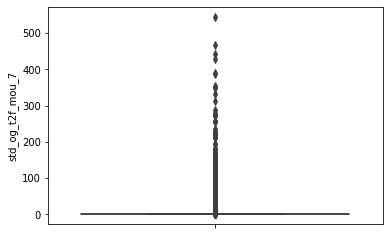

std_og_t2f_mou_8


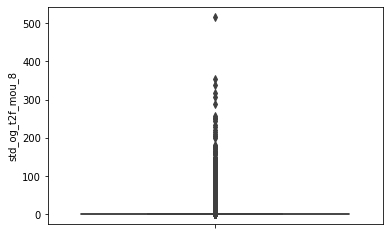

std_og_t2c_mou_6


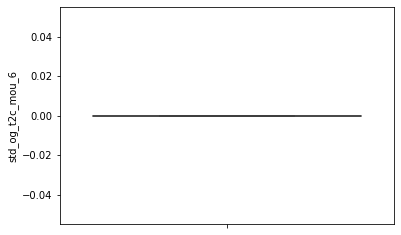

std_og_t2c_mou_7


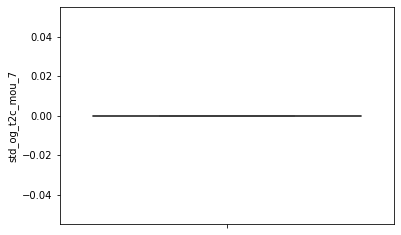

std_og_t2c_mou_8


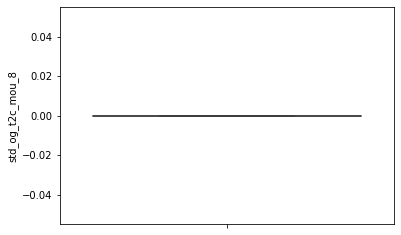

std_og_mou_6


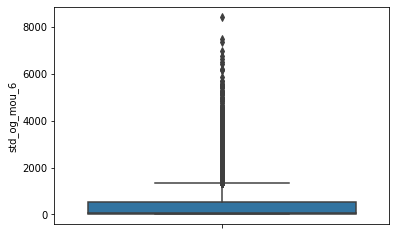

std_og_mou_7


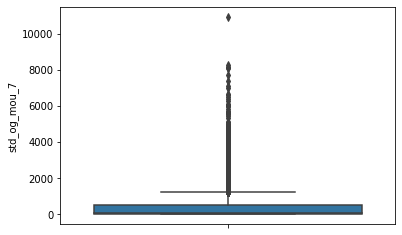

std_og_mou_8


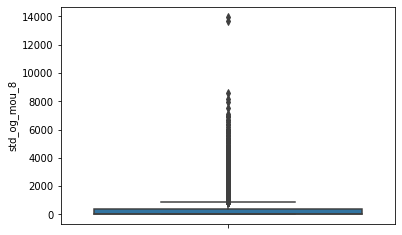

isd_og_mou_6


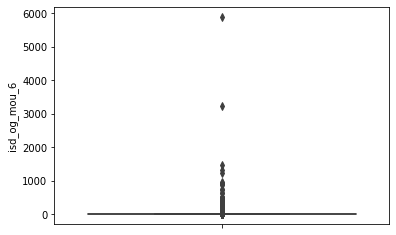

isd_og_mou_7


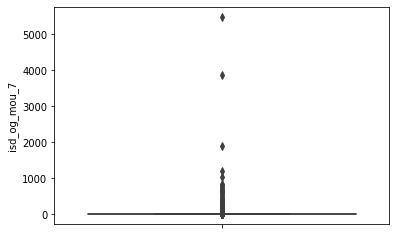

isd_og_mou_8


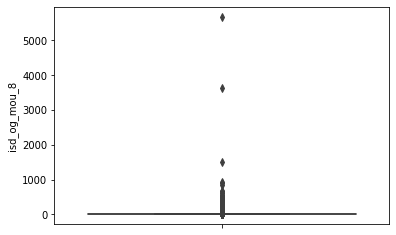

spl_og_mou_6


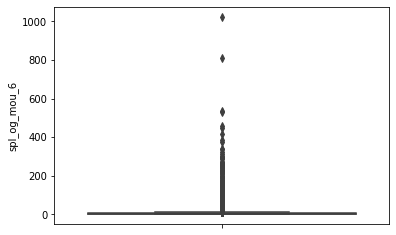

spl_og_mou_7


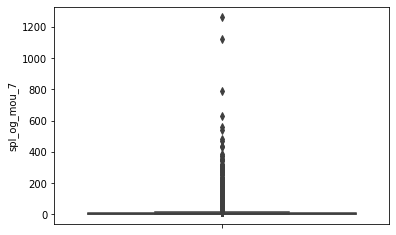

spl_og_mou_8


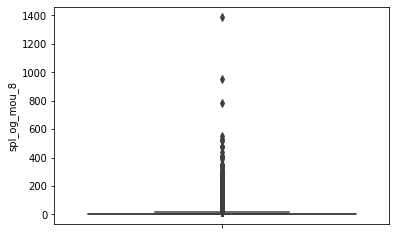

og_others_6


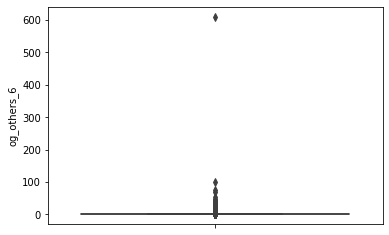

og_others_7


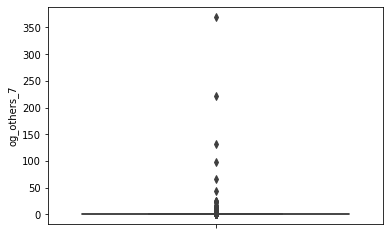

og_others_8


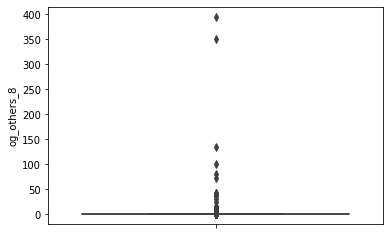

total_og_mou_6


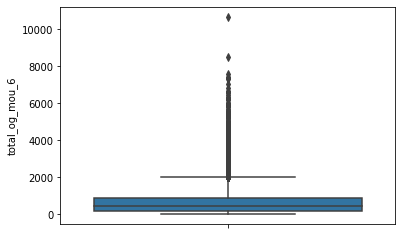

total_og_mou_7


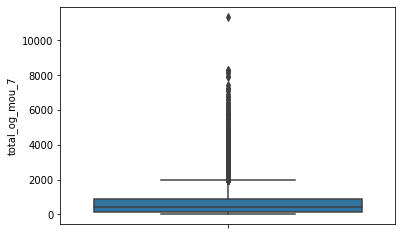

total_og_mou_8


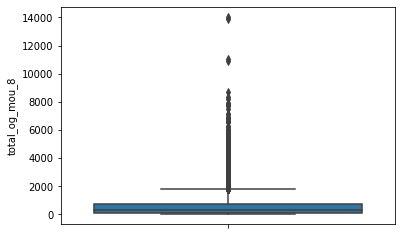

loc_ic_t2t_mou_6


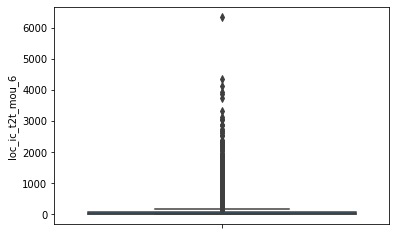

loc_ic_t2t_mou_7


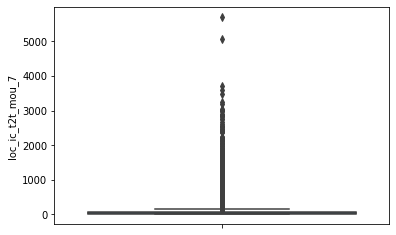

loc_ic_t2t_mou_8


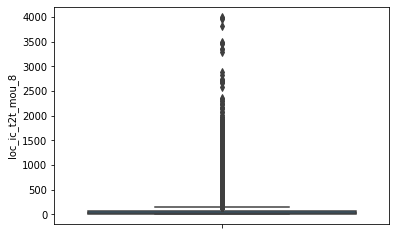

loc_ic_t2m_mou_6


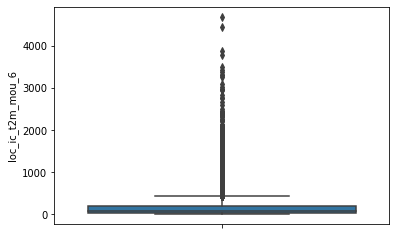

loc_ic_t2m_mou_7


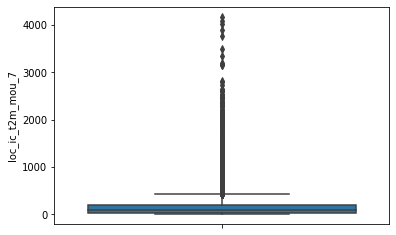

loc_ic_t2m_mou_8


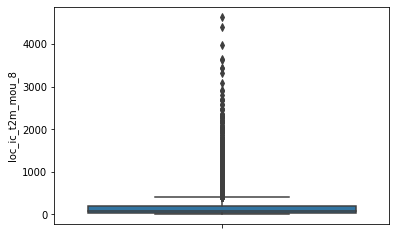

loc_ic_t2f_mou_6


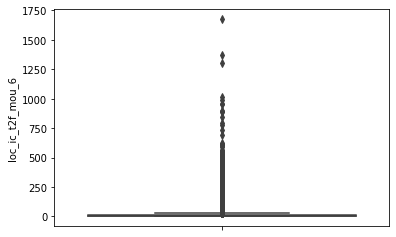

loc_ic_t2f_mou_7


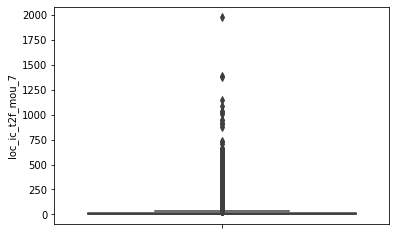

loc_ic_t2f_mou_8


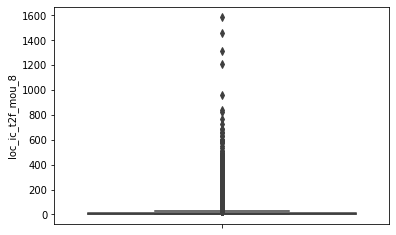

loc_ic_mou_6


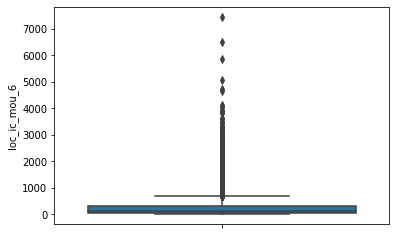

loc_ic_mou_7


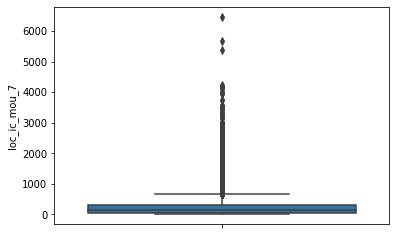

loc_ic_mou_8


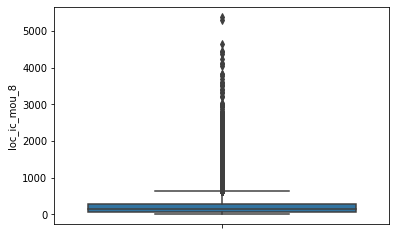

std_ic_t2t_mou_6


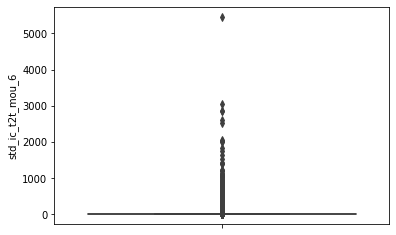

std_ic_t2t_mou_7


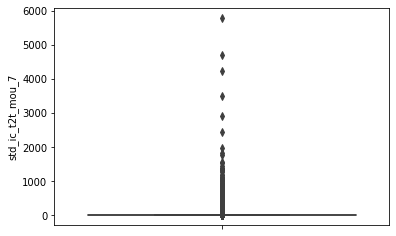

std_ic_t2t_mou_8


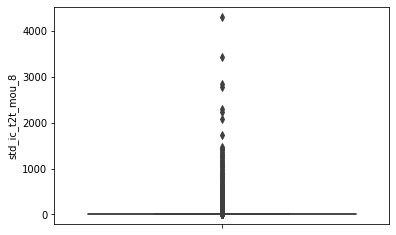

std_ic_t2m_mou_6


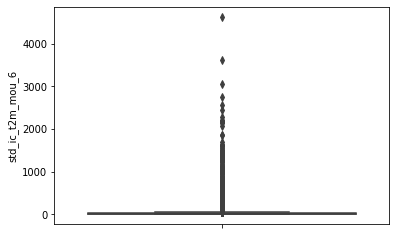

std_ic_t2m_mou_7


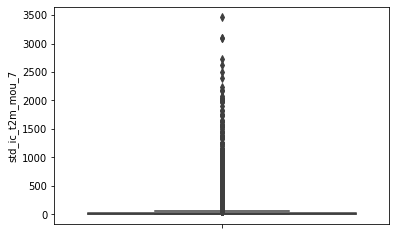

std_ic_t2m_mou_8


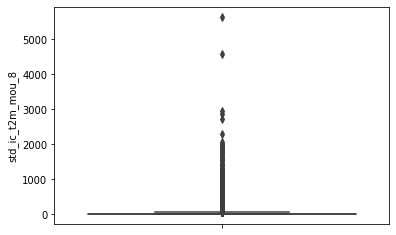

std_ic_t2f_mou_6


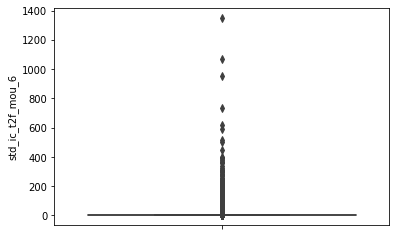

std_ic_t2f_mou_7


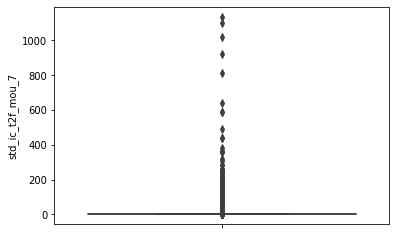

std_ic_t2f_mou_8


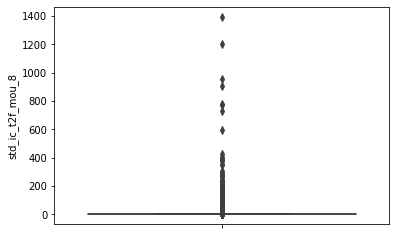

std_ic_t2o_mou_6


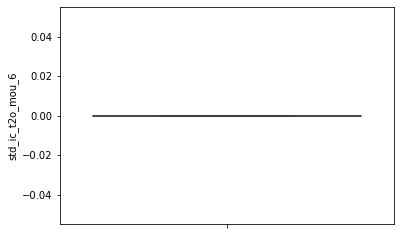

std_ic_t2o_mou_7


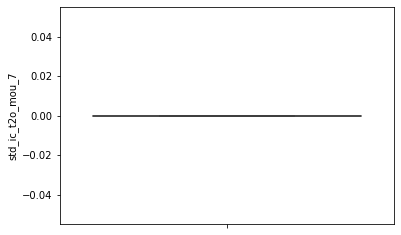

std_ic_t2o_mou_8


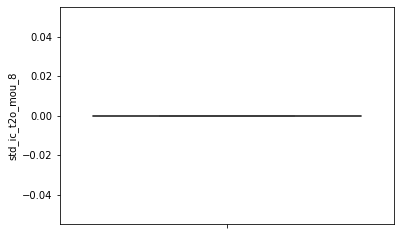

std_ic_mou_6


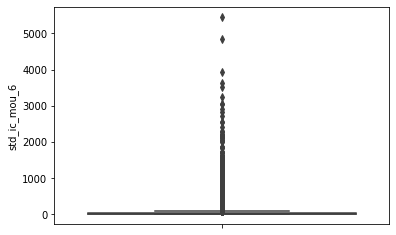

std_ic_mou_7


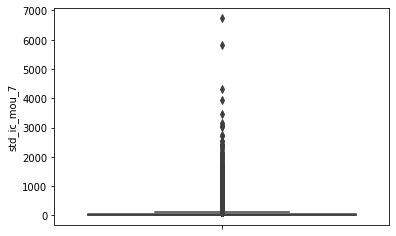

std_ic_mou_8


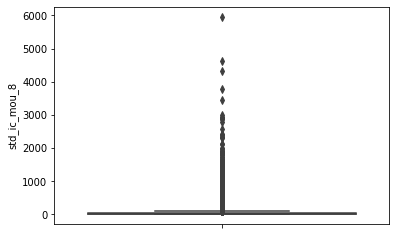

total_ic_mou_6


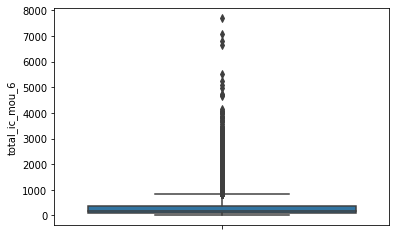

total_ic_mou_7


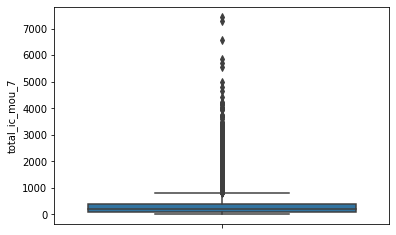

total_ic_mou_8


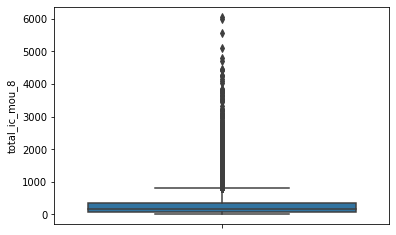

spl_ic_mou_6


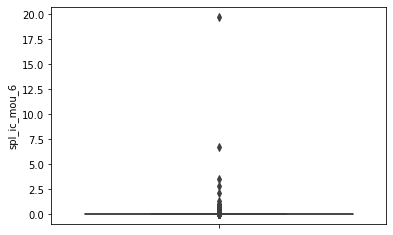

spl_ic_mou_7


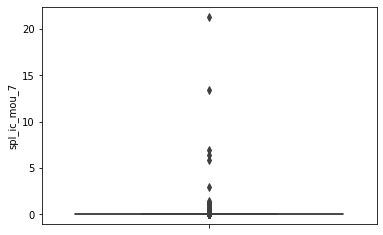

spl_ic_mou_8


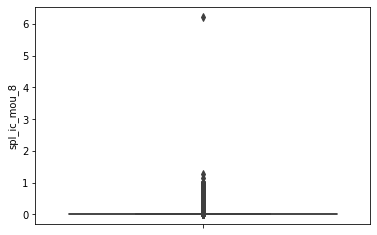

isd_ic_mou_6


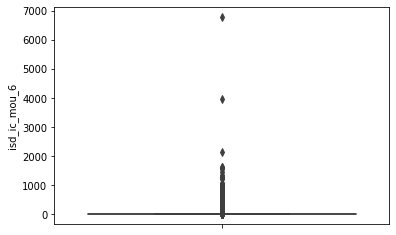

isd_ic_mou_7


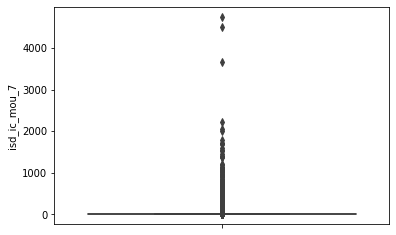

isd_ic_mou_8


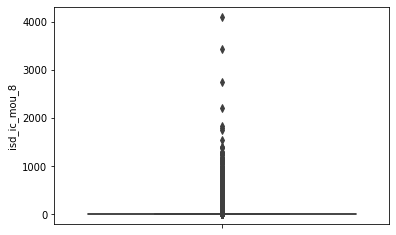

ic_others_6


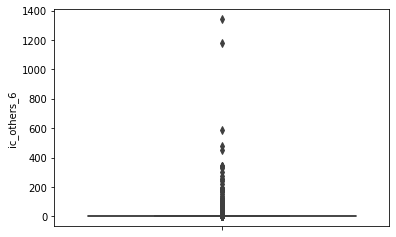

ic_others_7


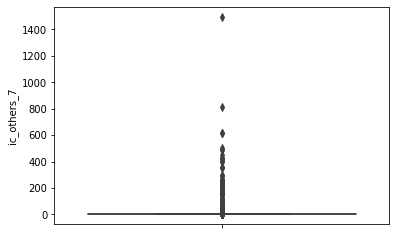

ic_others_8


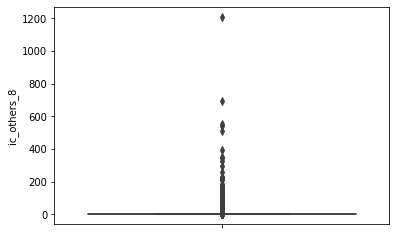

vol_2g_mb_6


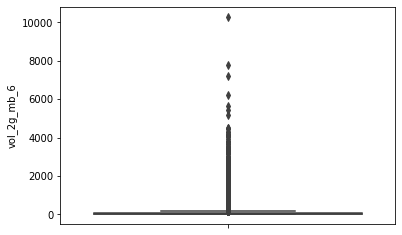

vol_2g_mb_7


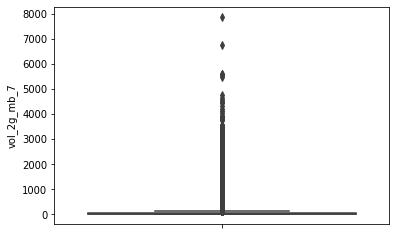

vol_2g_mb_8


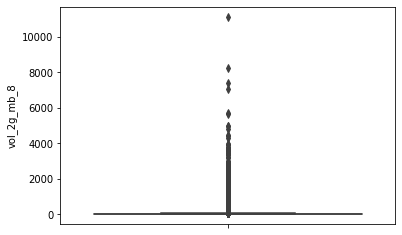

vol_3g_mb_6


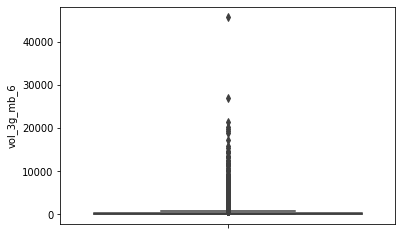

vol_3g_mb_7


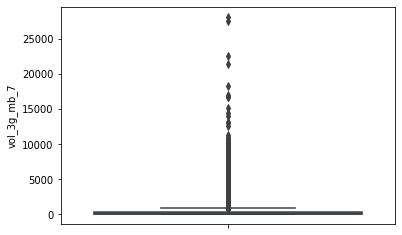

vol_3g_mb_8


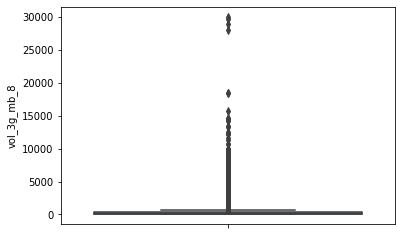

monthly_2g_6


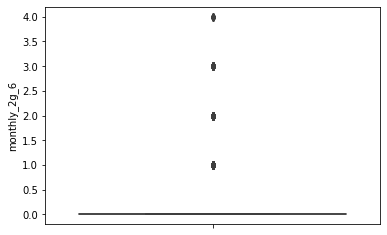

monthly_2g_7


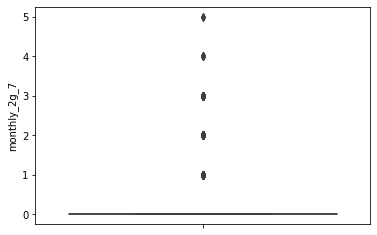

monthly_2g_8


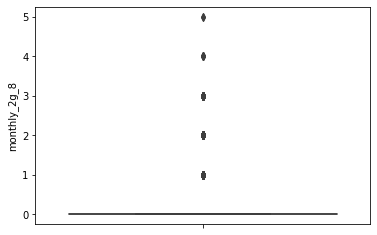

sachet_2g_6


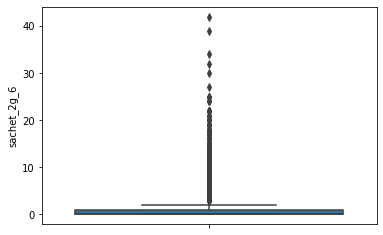

sachet_2g_7


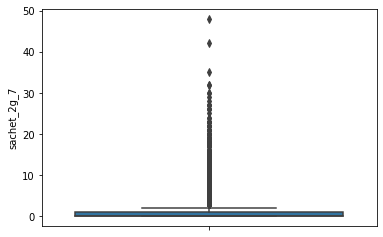

sachet_2g_8


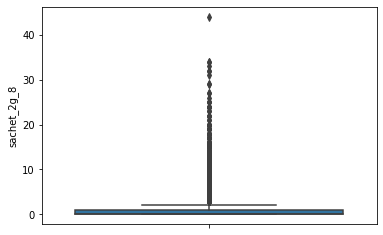

monthly_3g_6


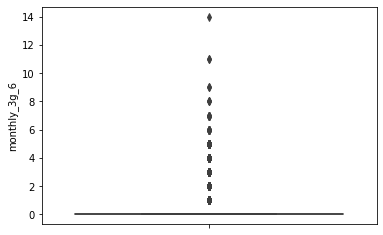

monthly_3g_7


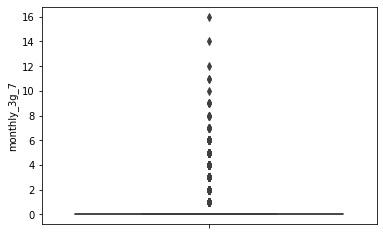

monthly_3g_8


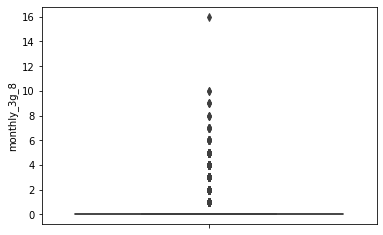

sachet_3g_6


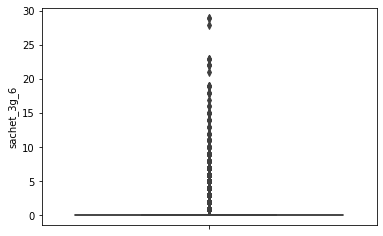

sachet_3g_7


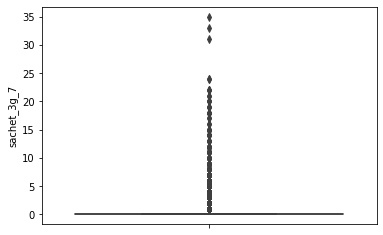

sachet_3g_8


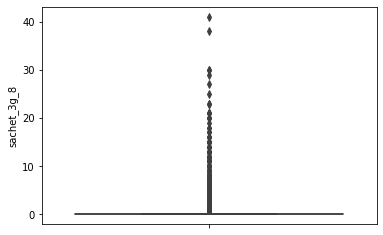

aon


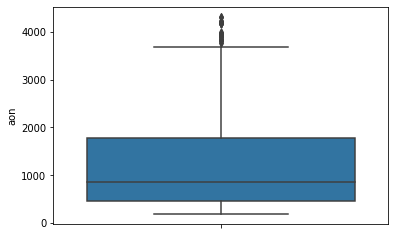

aug_vbc_3g


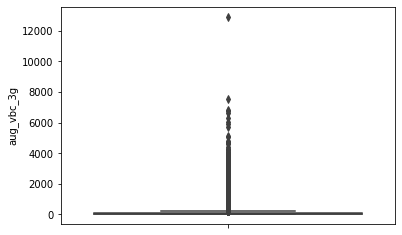

jul_vbc_3g


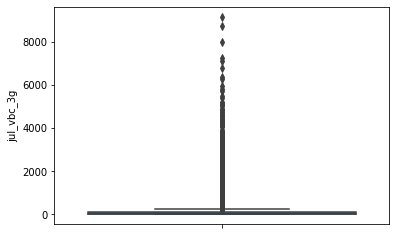

jun_vbc_3g


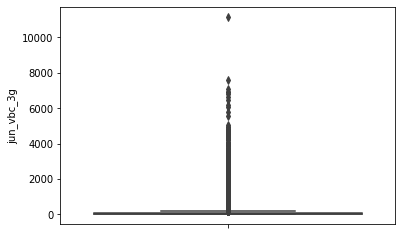

sep_vbc_3g


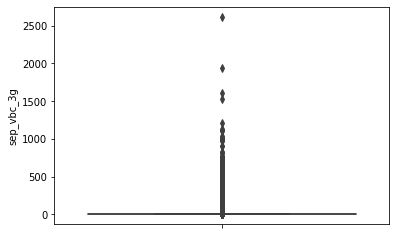

highvalcust


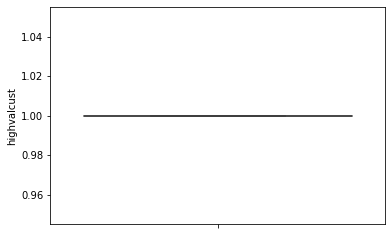

In [53]:
for column in df.select_dtypes(exclude=['object']).columns.to_list():
    print(column)
    sns.boxplot(y=column,data=df)
    plt.show()

As per the above box plot analysis, below columns can be dropped: (They contain same value in all rows)
1. circle_id
2. loc_og_t2o_mou
3. std_og_t2o_mou
4. loc_ic_t2o_mou
5. highvalcust
6. 'std_og_t2c_mou_6'
7. 'std_ic_t2o_mou_6'
8. 'std_og_t2c_mou_7'
9. 'std_ic_t2o_mou_7'
10. 'std_og_t2c_mou_8'
11. 'std_ic_t2o_mou_8'

In [54]:
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','highvalcust'],axis=1)

In [55]:
zero_col = ['std_og_t2c_mou_6','std_ic_t2o_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_8']

In [56]:
df = df.drop(zero_col,axis=1)

**Combining all the columns of 6 & 7 into new columns for the good phase having avg values.**

In [57]:
for  column in df.select_dtypes(exclude=['object']).columns.to_list():
    if '_6' in column:
        print(column)
        print(df[column].value_counts())
        print()

onnet_mou_6
0.00       1655
102.31      396
0.26         17
0.33         16
1.01         16
           ... 
405.89        1
1671.08       1
639.59        1
102.94        1
2414.04       1
Name: onnet_mou_6, Length: 17585, dtype: int64

offnet_mou_6
0.000       698
253.385     396
0.610        11
2.080         8
0.080         8
           ... 
0.060         1
3517.140      1
2411.160      1
1146.730      1
375.040       1
Name: offnet_mou_6, Length: 21760, dtype: int64

roam_ic_mou_6
0.00      23500
0.86         13
1.01         13
0.53         12
0.30         12
          ...  
47.84         1
12.85         1
35.53         1
166.43        1
22.64         1
Name: roam_ic_mou_6, Length: 4127, dtype: int64

roam_og_mou_6
0.00      23474
0.21         13
0.60         10
0.36          9
1.01          9
          ...  
39.59         1
150.79        1
473.11        1
362.89        1
68.46         1
Name: roam_og_mou_6, Length: 4879, dtype: int64

loc_og_t2t_mou_6
0.00      2829
28.12      396
0

In [58]:
for  column in df.select_dtypes(exclude=['object']).columns.to_list():
    if '_6' in column:
        column = column.replace('_6','')
        df['{}_good'.format(column)] = (df['{}_6'.format(column)] + df['{}_7'.format(column)])/2
        df = df.drop(['{}_6'.format(column),'{}_7'.format(column)],axis=1)

In [59]:
df['VBC_good'] = (df['jul_vbc_3g']+ df['jun_vbc_3g'])/2
df = df.drop(['sep_vbc_3g','jul_vbc_3g','jun_vbc_3g'],axis=1)
df = df.rename(columns={'aug_vbc_3g':'VBC_8'})

In [60]:
df.shape

(29976, 76)

In [61]:
df.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_action', 'aon',
       'VBC_8', 'churn', 'fb_user_good', 'onnet_mou_good', 'offnet_mou_good',
       'roam_ic_mou_good', 'roam_og_mou_good', 'loc_og_t2t_mou_good',
       'loc_og_t2m_mou_good', 'loc_og_t2f_mou_good', 'loc_og_t2c_mou_good',
       'loc_og_mou_good', 'std_og_t2t_mou_good', 'std_og_t2m_mou_good'

In [62]:
df.shape

(29976, 76)

# Step 5: Exploratory Data Analysis

**Outlier Treatment** <br>


In [63]:
categorical_columns=df.select_dtypes(include=['object']).columns.to_list()
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()

In [64]:
df.shape

(29976, 76)

aon
3651.0

3651    471
2372    190
495     114
494      90
492      73
       ... 
3464      1
3492      1
3643      1
1852      1
1877      1
Name: aon, Length: 3287, dtype: int64


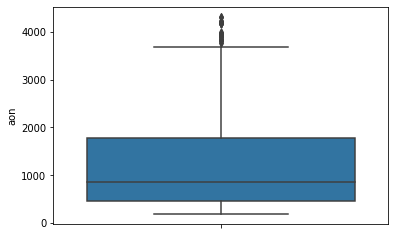

onnet_mou_good
2046.76375

0.000      949
96.990     235
45.835      80
51.155      70
0.125       13
          ... 
78.925       1
74.835       1
142.675      1
220.235      1
46.035       1
Name: onnet_mou_good, Length: 24159, dtype: int64


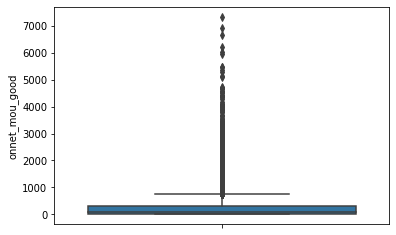

offnet_mou_good
2145.94375

0.0000       331
242.8350     235
116.1425      50
126.6925      34
0.0500         6
            ... 
229.4150       1
1925.7950      1
491.9900       1
534.0400       1
260.2750       1
Name: offnet_mou_good, Length: 27042, dtype: int64


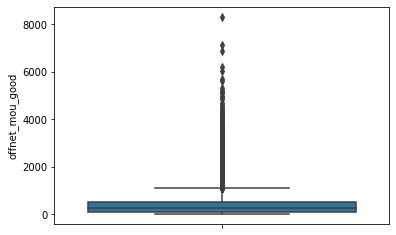

roam_ic_mou_good
279.645

0.000      21069
0.505         25
0.630         15
0.605         14
0.300         12
           ...  
151.160        1
107.920        1
402.145        1
53.115         1
2.500          1
Name: roam_ic_mou_good, Length: 5809, dtype: int64


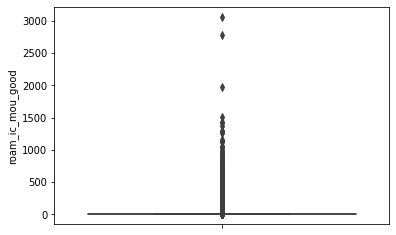

roam_og_mou_good
438.87375

0.000      20991
0.105         11
0.505         11
0.180         10
0.365         10
           ...  
22.230         1
73.970         1
55.670         1
134.270        1
38.795         1
Name: roam_og_mou_good, Length: 6792, dtype: int64


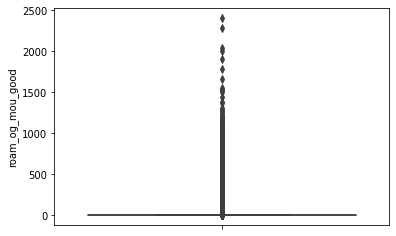

loc_og_t2t_mou_good
995.8975

0.000      1487
27.350      235
13.290       99
14.060       85
0.215        19
           ... 
24.790        1
13.315        1
109.525       1
21.660        1
46.035        1
Name: loc_og_t2t_mou_good, Length: 18559, dtype: int64


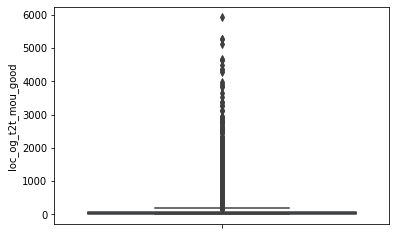

loc_og_t2m_mou_good
1097.6975

0.000      837
85.180     235
41.950      78
43.230      57
0.115        8
          ... 
54.295       1
547.000      1
685.945      1
12.775       1
299.850      1
Name: loc_og_t2m_mou_good, Length: 23684, dtype: int64


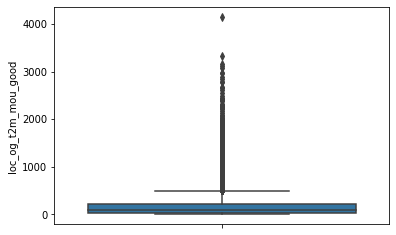

loc_og_t2f_mou_good
86.4025

0.000      10842
0.105        373
0.210        235
0.140         66
0.190         65
           ...  
60.020         1
0.445          1
140.070        1
23.170         1
38.810         1
Name: loc_og_t2f_mou_good, Length: 6328, dtype: int64


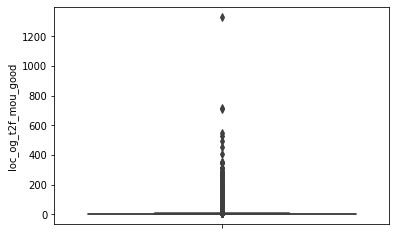

loc_og_t2c_mou_good
22.11375

0.000     18260
0.005        82
0.015        78
0.040        70
0.180        63
          ...  
13.870        1
18.715        1
7.930         1
3.435         1
16.920        1
Name: loc_og_t2c_mou_good, Length: 3124, dtype: int64


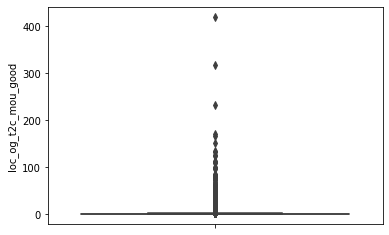

loc_og_mou_good
1678.3275

0.0000      740
138.7900    235
68.4475      75
70.3425      57
0.1250        6
           ... 
14.7950       1
101.0150      1
129.9750      1
236.3000      1
189.1000      1
Name: loc_og_mou_good, Length: 25428, dtype: int64


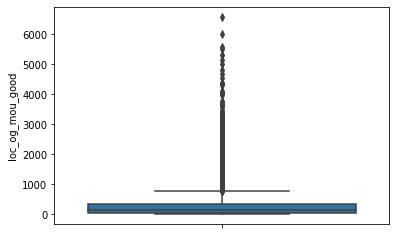

std_og_t2t_mou_good
1761.275

0.0000      9805
4.9325       235
2.1525       163
2.7800       117
0.1650        31
            ... 
25.5250        1
11.5450        1
157.7350       1
224.1750       1
11.7900        1
Name: std_og_t2t_mou_good, Length: 15280, dtype: int64


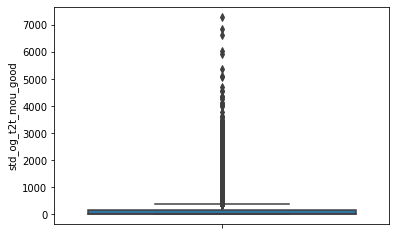

std_og_t2m_mou_good
1851.1124999999997

0.000       5443
21.835       236
10.040       133
11.795        99
0.230         26
            ... 
65.300         1
220.945        1
726.470        1
16.485         1
1695.875       1
Name: std_og_t2m_mou_good, Length: 18134, dtype: int64


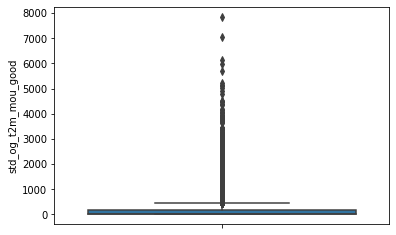

std_og_t2f_mou_good
39.10875

0.000     23321
0.200        36
0.130        34
0.255        33
0.090        32
          ...  
6.615         1
9.830         1
8.770         1
7.955         1
13.505        1
Name: std_og_t2f_mou_good, Length: 2640, dtype: int64


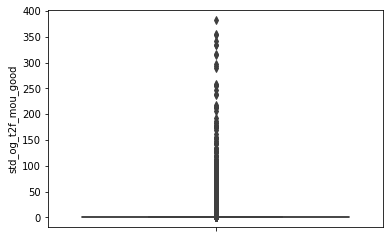

std_og_mou_good
2585.3599999999997

0.0000      4046
64.0925      235
29.0200      112
35.0725       89
0.2300        27
            ... 
294.8950       1
102.6600       1
683.1000       1
175.6550       1
381.9100       1
Name: std_og_mou_good, Length: 20770, dtype: int64


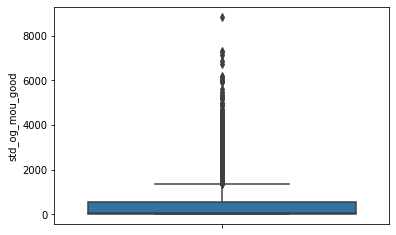

isd_og_mou_good
42.017500000000005

0.000      26408
0.005         71
0.505         64
0.015         50
0.125         44
           ...  
198.320        1
6.195          1
229.200        1
24.220         1
20.200         1
Name: isd_og_mou_good, Length: 1560, dtype: int64


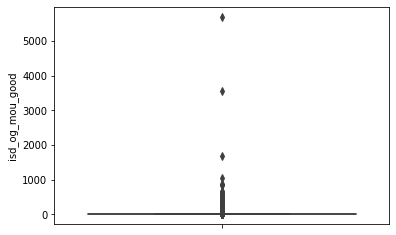

spl_og_mou_good
63.03875000000001

0.000     8390
0.560      236
0.380      191
0.180      145
0.005      102
          ... 
13.290       1
25.190       1
17.740       1
19.770       1
6.005        1
Name: spl_og_mou_good, Length: 6685, dtype: int64


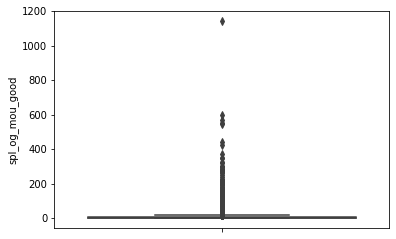

og_others_good
4.7225

0.000     22853
0.105       147
0.215        62
0.325        52
0.100        52
          ...  
2.970         1
12.165        1
5.370         1
37.105        1
3.155         1
Name: og_others_good, Length: 895, dtype: int64


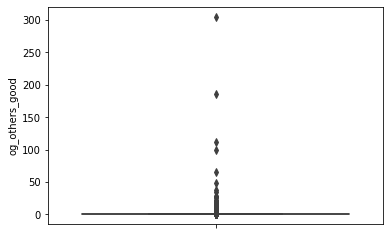

total_og_mou_good
2960.4875

0.000      753
0.105       11
1.580        5
0.980        5
0.505        5
          ... 
56.800       1
150.690      1
39.925       1
459.285      1
548.370      1
Name: total_og_mou_good, Length: 27807, dtype: int64


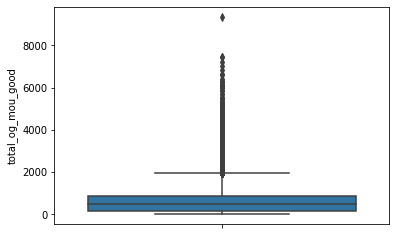

loc_ic_t2t_mou_good
620.12

0.000     831
27.205    235
13.530     85
13.675     66
0.895      15
         ... 
35.480      1
27.895      1
77.350      1
32.565      1
44.115      1
Name: loc_ic_t2t_mou_good, Length: 18284, dtype: int64


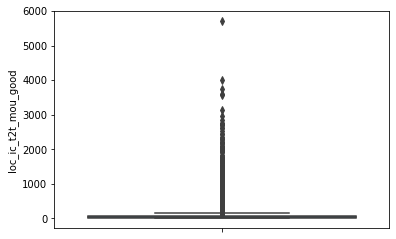

loc_ic_t2m_mou_good
977.09

0.0000      319
89.6175     235
44.7625      53
44.8550      48
4.5100        6
           ... 
456.9950      1
71.3100       1
219.7700      1
667.8700      1
13.7500       1
Name: loc_ic_t2m_mou_good, Length: 24087, dtype: int64


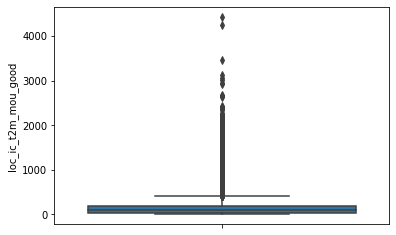

loc_ic_t2f_mou_good
189.375

0.000      6021
2.110       236
1.080       175
1.030       127
0.180        64
           ... 
300.075       1
67.960        1
37.150        1
107.080       1
48.020        1
Name: loc_ic_t2f_mou_good, Length: 9374, dtype: int64


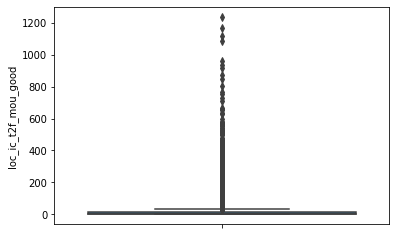

loc_ic_mou_good
1427.4175000000002

0.0000      249
143.2275    235
71.4025      44
71.8250      34
57.8100       5
           ... 
173.4300      1
68.2300       1
133.9850      1
34.1350       1
787.8700      1
Name: loc_ic_mou_good, Length: 25772, dtype: int64


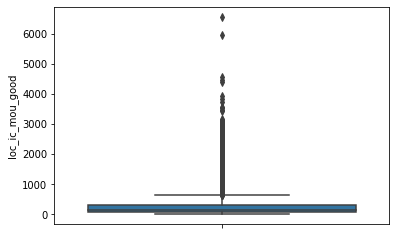

std_ic_t2t_mou_good
200.55375

0.000     9313
0.645      242
0.305      190
0.340      148
0.015       77
          ... 
37.480       1
7.685        1
26.775       1
13.785       1
28.370       1
Name: std_ic_t2t_mou_good, Length: 8581, dtype: int64


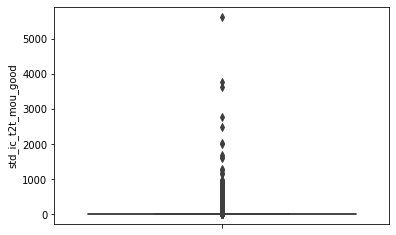

std_ic_t2m_mou_good
373.11125

0.000      4314
5.875       241
2.870       133
3.005       107
0.215        44
           ... 
8.450         1
17.740        1
11.235        1
135.140       1
11.360        1
Name: std_ic_t2m_mou_good, Length: 12395, dtype: int64


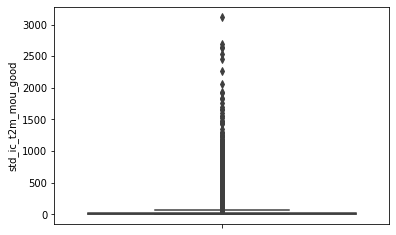

std_ic_t2f_mou_good
46.75

0.000     19058
0.240        73
0.215        67
0.100        64
0.230        63
          ...  
7.870         1
3.015         1
10.695        1
21.110        1
3.385         1
Name: std_ic_t2f_mou_good, Length: 3599, dtype: int64


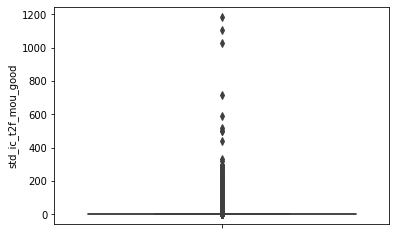

std_ic_mou_good
545.23875

0.000      2413
13.170      236
6.570       109
6.600        91
0.130        34
           ... 
100.410       1
26.905        1
778.890       1
20.840        1
32.415        1
Name: std_ic_mou_good, Length: 15274, dtype: int64


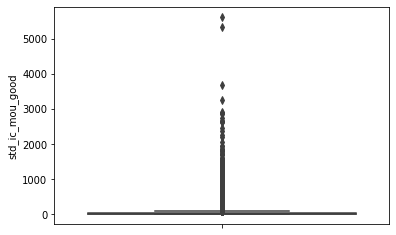

total_ic_mou_good
1684.7675

0.000       483
0.615         6
76.985        6
86.410        5
143.085       4
           ... 
69.620        1
427.480       1
1630.740      1
111.975       1
772.775       1
Name: total_ic_mou_good, Length: 26370, dtype: int64


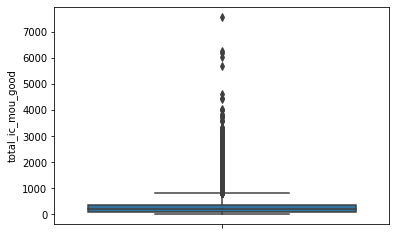

spl_ic_mou_good
0.405

0.000    22612
0.075      620
0.065      293
0.030      276
0.100      251
         ...  
0.635        1
1.480        1
0.525        1
0.545        1
0.425        1
Name: spl_ic_mou_good, Length: 207, dtype: int64


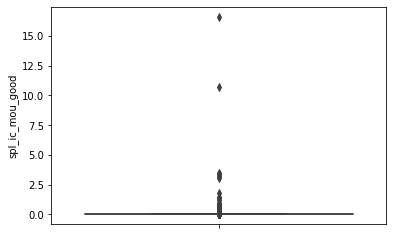

isd_ic_mou_good
227.12

0.000      20609
0.005        159
0.015         94
0.025         83
0.230         61
           ...  
246.780        1
249.995        1
42.560         1
24.780         1
10.505         1
Name: isd_ic_mou_good, Length: 5045, dtype: int64


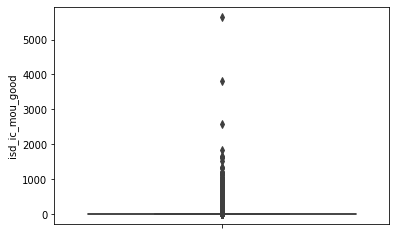

ic_others_good
19.74625

0.000     19223
0.030       193
0.040       192
0.240       180
0.025       179
          ...  
2.315         1
2.445         1
5.830         1
68.630        1
5.000         1
Name: ic_others_good, Length: 2432, dtype: int64


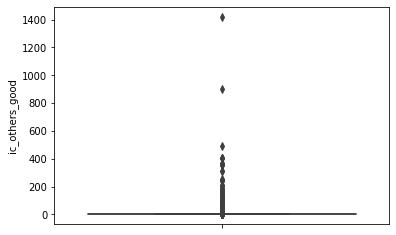

vol_2g_mb_good
1360.9025000000001

0.000      13500
0.005         66
0.010         45
0.020         33
0.015         30
           ...  
83.460         1
575.135        1
213.220        1
199.395        1
27.895         1
Name: vol_2g_mb_good, Length: 13783, dtype: int64


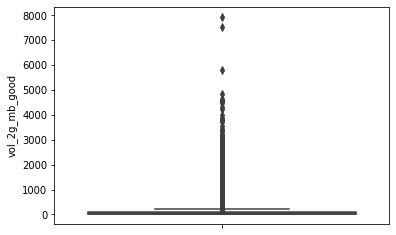

vol_3g_mb_good
3452.82

0.000       17938
0.005          21
0.010           7
0.030           6
0.015           6
            ...  
1577.935        1
819.755         1
674.270         1
666.855         1
440.300         1
Name: vol_3g_mb_good, Length: 11754, dtype: int64


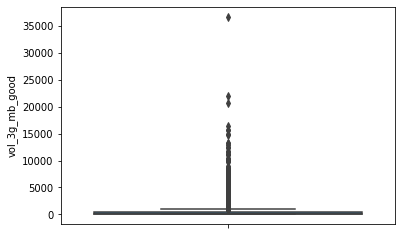

monthly_2g_good
1.5

0.0    24036
0.5     2866
1.0     2215
1.5      745
2.0       89
2.5       17
3.0        6
3.5        1
4.5        1
Name: monthly_2g_good, dtype: int64


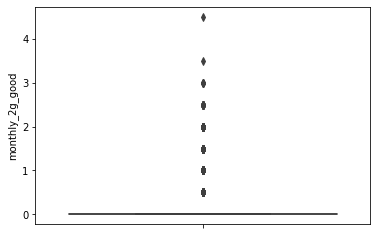

sachet_2g_good
11.0

0.0     19364
0.5      2565
1.0      1593
1.5       951
2.0       750
2.5       567
3.0       514
3.5       468
4.0       441
4.5       382
5.0       367
5.5       287
6.0       267
6.5       194
7.0       179
7.5       136
8.0       134
8.5       116
9.0       115
10.0       87
9.5        82
10.5       70
11.0       59
11.5       49
12.0       40
12.5       38
13.0       33
13.5       17
14.5       16
14.0       15
16.5       11
16.0       11
15.0        8
15.5        7
17.5        7
17.0        5
18.0        4
20.5        3
19.0        3
21.0        3
29.5        2
22.0        2
22.5        2
37.0        1
23.0        1
20.0        1
24.0        1
36.5        1
24.5        1
27.0        1
19.5        1
18.5        1
28.0        1
25.5        1
38.0        1
Name: sachet_2g_good, dtype: int64


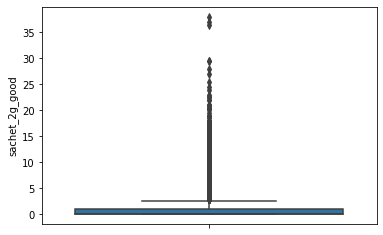

monthly_3g_good
2.5

0.0     24157
0.5      2437
1.0      1723
1.5       934
2.0       338
2.5       148
3.0       102
3.5        44
4.0        25
4.5        21
5.0        14
6.0        10
5.5         8
6.5         4
8.0         3
7.0         3
9.0         2
9.5         1
10.0        1
11.5        1
Name: monthly_3g_good, dtype: int64


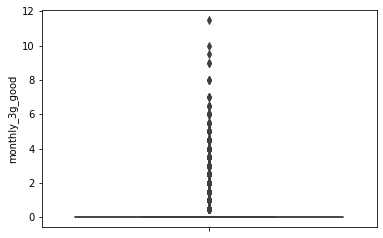

sachet_3g_good
4.0

0.0     25383
0.5      2403
1.0       958
1.5       435
2.0       197
2.5       127
3.0        92
3.5        63
4.0        57
4.5        47
5.0        37
6.0        21
5.5        21
7.0        16
6.5        15
8.0        14
8.5        10
9.5         9
11.0        8
7.5         8
9.0         6
10.0        6
14.5        5
12.0        5
11.5        4
10.5        3
18.5        3
15.0        3
23.5        2
12.5        2
15.5        2
13.5        2
18.0        2
13.0        2
27.0        1
21.5        1
20.5        1
25.0        1
17.0        1
25.5        1
26.5        1
19.5        1
Name: sachet_3g_good, dtype: int64


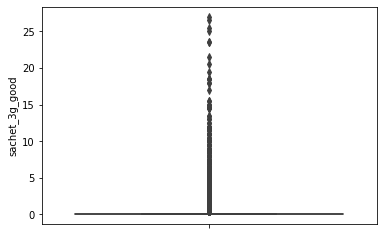

VBC_good
1822.8799999999999

0.000      18773
0.015          6
0.010          5
0.545          4
0.075          4
           ...  
560.670        1
512.780        1
19.470         1
270.160        1
637.885        1
Name: VBC_good, Length: 10805, dtype: int64


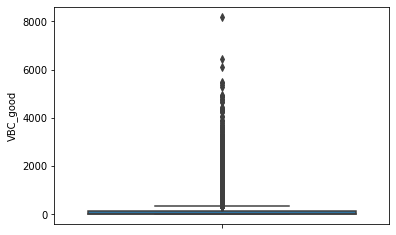

In [65]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
good = list(filter(lambda x: True if '_8' not in x else False, continous_columns))
for column in good:
    print(column)
    print(df[column].quantile(.99))
    print()
    
    print(df[column].value_counts())
    sns.boxplot(y=column,data=df)
    plt.show()

In [66]:
df.shape

(29976, 76)

In [67]:
df.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_action', 'aon',
       'VBC_8', 'churn', 'fb_user_good', 'onnet_mou_good', 'offnet_mou_good',
       'roam_ic_mou_good', 'roam_og_mou_good', 'loc_og_t2t_mou_good',
       'loc_og_t2m_mou_good', 'loc_og_t2f_mou_good', 'loc_og_t2c_mou_good',
       'loc_og_mou_good', 'std_og_t2t_mou_good', 'std_og_t2m_mou_good'

In [68]:
#df=df.loc[df['loc_og_t2f_mou_good']<=df['loc_og_t2f_mou_good'].quantile(.99)]
#df=df.loc[df['spl_og_mou_good']<=df['loc_og_t2f_mou_good'].quantile(.99)]
#df=df.loc[df['loc_og_t2t_mou_good']<=df['loc_og_t2t_mou_good'].quantile(.99)]

In [69]:
good.remove('monthly_2g_good')
good.remove('sachet_2g_good')
good.remove('monthly_3g_good')
good.remove('sachet_3g_good')
for column in good:
    df=df.loc[df[column]<=df[column].quantile(.995)]

In [70]:
df.shape

(25464, 76)

aon
3651.0

3651    404
2372    165
495     102
494      78
492      63
       ... 
1751      1
3184      1
2110      1
1626      1
2412      1
Name: aon, Length: 3196, dtype: int64


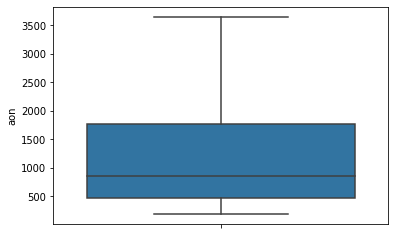

onnet_mou_good
1425.0797499999983

0.000      881
96.990     221
45.835      74
51.155      64
0.125       13
          ... 
897.050      1
291.475      1
3.020        1
107.595      1
7.000        1
Name: onnet_mou_good, Length: 20650, dtype: int64


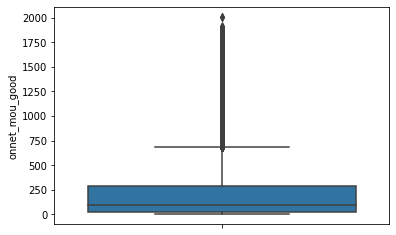

offnet_mou_good
1516.6832499999996

0.0000      311
242.8350    221
116.1425     48
126.6925     30
0.0500        6
           ... 
417.8550      1
38.9000       1
49.1200       1
208.0375      1
37.4100       1
Name: offnet_mou_good, Length: 23008, dtype: int64


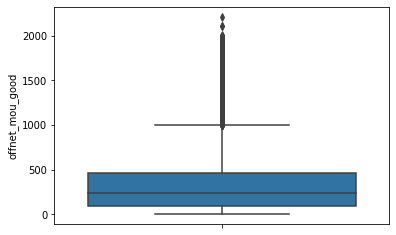

roam_ic_mou_good
185.70789999999982

0.000     17955
0.505        21
0.630        12
0.605        12
0.025        11
          ...  
14.970        1
8.635         1
65.605        1
65.895        1
2.915         1
Name: roam_ic_mou_good, Length: 4944, dtype: int64


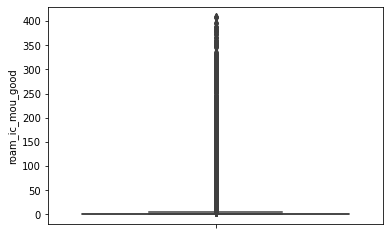

roam_og_mou_good
292.76594999999804

0.000      17892
0.105         10
0.365         10
0.225          8
0.340          8
           ...  
126.390        1
8.760          1
20.015         1
473.680        1
63.315         1
Name: roam_og_mou_good, Length: 5830, dtype: int64


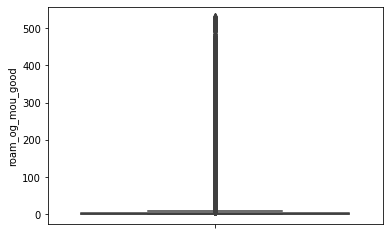

loc_og_t2t_mou_good
626.874449999999

0.000      1299
27.350      221
13.290       91
14.060       77
0.230        17
           ... 
147.250       1
17.870        1
76.955        1
54.600        1
44.115        1
Name: loc_og_t2t_mou_good, Length: 16096, dtype: int64


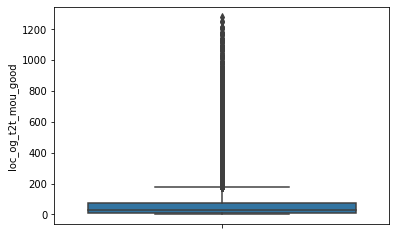

loc_og_t2m_mou_good
842.0163999999997

0.000      721
85.180     221
41.950      73
43.230      51
0.530        8
          ... 
230.235      1
157.850      1
78.815       1
382.735      1
732.670      1
Name: loc_og_t2m_mou_good, Length: 20410, dtype: int64


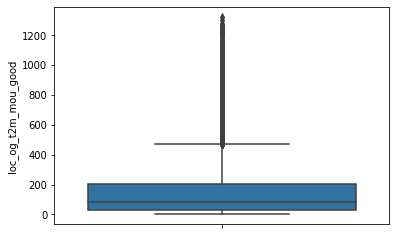

loc_og_t2f_mou_good
65.9887

0.000     9448
0.105      336
0.210      221
0.140       63
0.130       57
          ... 
31.625       1
14.480       1
7.800        1
8.210        1
2.275        1
Name: loc_og_t2f_mou_good, Length: 5495, dtype: int64


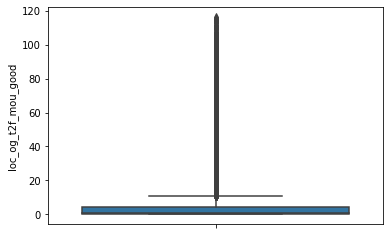

loc_og_t2c_mou_good
17.07979999999996

0.000     15781
0.005        70
0.040        65
0.015        65
0.180        55
          ...  
11.860        1
13.400        1
1.585         1
7.790         1
6.060         1
Name: loc_og_t2c_mou_good, Length: 2647, dtype: int64


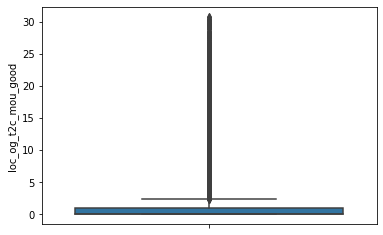

loc_og_mou_good
1120.7626999999993

0.0000       637
138.7900     221
68.4475       70
70.3425       51
0.1250         6
            ... 
25.5850        1
361.2650       1
917.0200       1
1026.2750      1
102.7750       1
Name: loc_og_mou_good, Length: 21776, dtype: int64


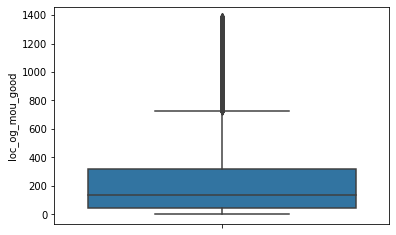

std_og_t2t_mou_good
1372.9394499999994

0.0000      8505
4.9325       221
2.1525       151
2.7800       108
0.1750        25
            ... 
604.7600       1
24.1600        1
164.4050       1
244.2650       1
18.7050        1
Name: std_og_t2t_mou_good, Length: 13030, dtype: int64


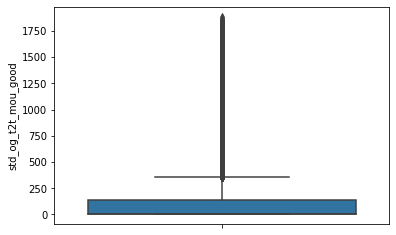

std_og_t2m_mou_good
1380.9455499999995

0.000      4820
21.835      222
10.040      124
11.795       91
0.230        23
           ... 
14.095        1
147.910       1
686.785       1
220.830       1
142.895       1
Name: std_og_t2m_mou_good, Length: 15549, dtype: int64


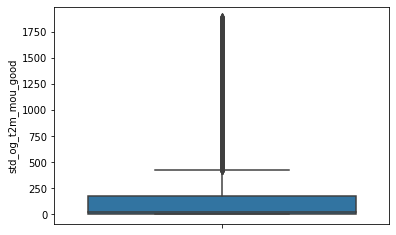

std_og_t2f_mou_good
22.941399999999774

0.000     20222
0.200        31
0.255        31
0.165        29
0.180        28
          ...  
21.010        1
8.395         1
6.640         1
2.395         1
29.105        1
Name: std_og_t2f_mou_good, Length: 2117, dtype: int64


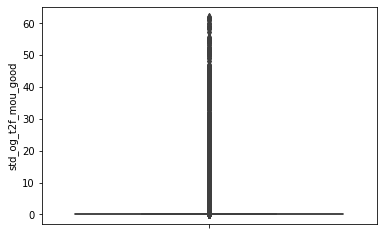

std_og_mou_good
1711.220549999999

0.0000      3618
64.0925      221
29.0200      104
35.0725       82
0.2300        24
            ... 
588.3050       1
77.0450        1
39.1400        1
378.3750       1
358.3350       1
Name: std_og_mou_good, Length: 17647, dtype: int64


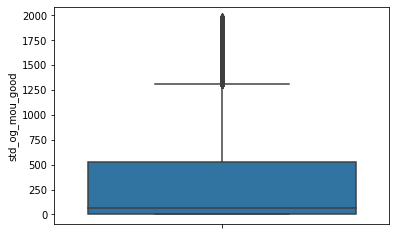

isd_og_mou_good
19.42869999999999

0.000     22782
0.005        63
0.505        57
0.125        34
0.025        32
          ...  
60.560        1
5.265         1
1.555         1
3.190         1
4.980         1
Name: isd_og_mou_good, Length: 1147, dtype: int64


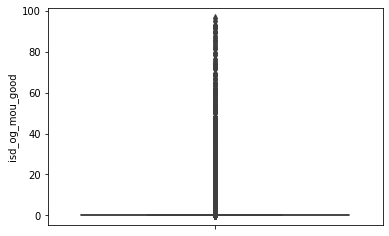

spl_og_mou_good
43.8988499999999

0.000     7233
0.560      221
0.380      177
0.180      127
0.005       90
          ... 
42.755       1
3.730        1
9.000        1
27.065       1
21.560       1
Name: spl_og_mou_good, Length: 5742, dtype: int64


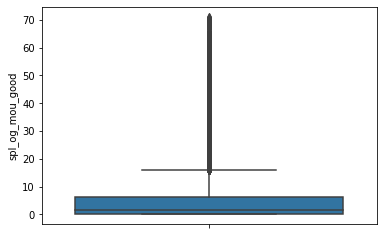

og_others_good
3.65869999999999

0.000    19650
0.105      134
0.215       57
0.100       50
0.325       46
         ...  
1.625        1
2.750        1
0.020        1
3.415        1
3.145        1
Name: og_others_good, Length: 688, dtype: int64


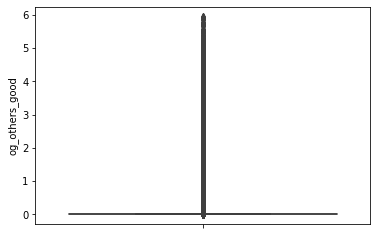

total_og_mou_good
1866.1392999999994

0.000      666
0.105        8
1.580        5
0.980        5
0.505        5
          ... 
896.665      1
53.295       1
16.100       1
181.195      1
536.635      1
Name: total_og_mou_good, Length: 23643, dtype: int64


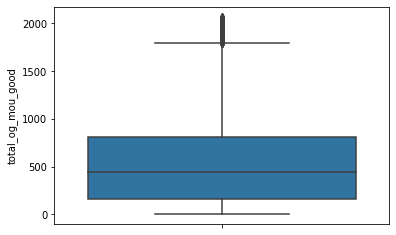

loc_ic_t2t_mou_good
403.50645

0.000      685
27.205     221
13.530      76
13.675      61
0.090       13
          ... 
152.700      1
164.810      1
173.345      1
218.655      1
12.795       1
Name: loc_ic_t2t_mou_good, Length: 15963, dtype: int64


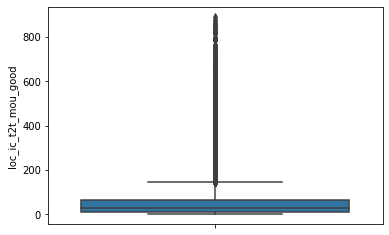

loc_ic_t2m_mou_good
678.4125499999999

0.0000      238
89.6175     221
44.7625      47
44.8550      44
40.4700       6
           ... 
298.3550      1
4.1450        1
386.7500      1
304.6600      1
190.9550      1
Name: loc_ic_t2m_mou_good, Length: 20837, dtype: int64


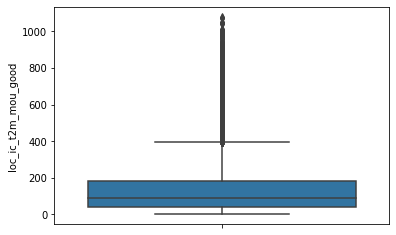

loc_ic_t2f_mou_good
139.59494999999987

0.000     5247
2.110      222
1.080      150
1.030      115
0.180       61
          ... 
8.030        1
42.910       1
11.495       1
38.085       1
39.105       1
Name: loc_ic_t2f_mou_good, Length: 8102, dtype: int64


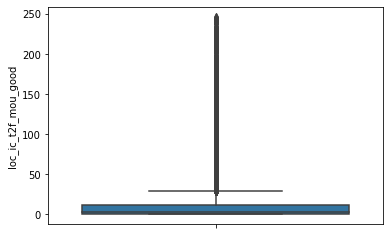

loc_ic_mou_good
895.7617999999998

143.2275    221
0.0000      180
71.4025      38
71.8250      31
57.8100       5
           ... 
664.6900      1
89.1750       1
306.2600      1
24.0350       1
76.8500       1
Name: loc_ic_mou_good, Length: 22105, dtype: int64


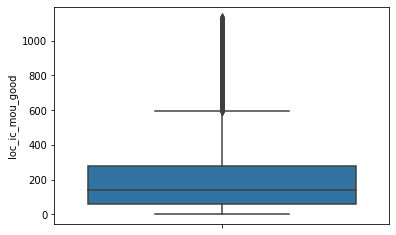

std_ic_t2t_mou_good
131.03479999999996

0.000     8164
0.645      228
0.305      175
0.340      139
0.015       67
          ... 
52.360       1
12.365       1
13.275       1
11.480       1
24.020       1
Name: std_ic_t2t_mou_good, Length: 7289, dtype: int64


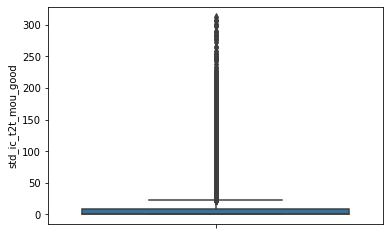

std_ic_t2m_mou_good
201.52849999999995

0.000      3801
5.875       227
2.870       122
3.005       100
0.215        38
           ... 
8.450         1
119.285       1
3.935         1
13.540        1
148.445       1
Name: std_ic_t2m_mou_good, Length: 10639, dtype: int64


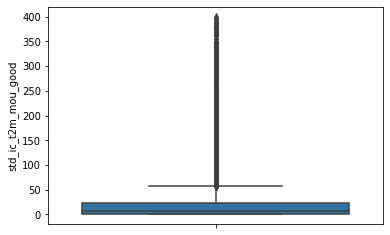

std_ic_t2f_mou_good
28.470149999999904

0.000     16632
0.240        59
0.215        58
0.100        57
0.165        56
          ...  
8.185         1
11.155        1
1.300         1
37.725        1
8.565         1
Name: std_ic_t2f_mou_good, Length: 2868, dtype: int64


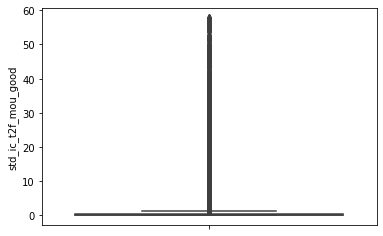

std_ic_mou_good
276.3962499999999

0.000      2158
13.170      222
6.570       101
6.600        84
0.215        33
           ... 
121.300       1
81.190        1
50.275        1
221.975       1
36.670        1
Name: std_ic_mou_good, Length: 13049, dtype: int64


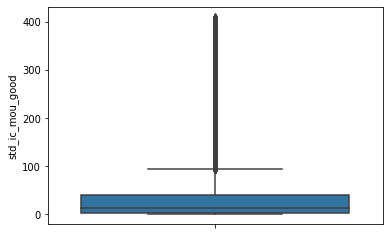

total_ic_mou_good
955.7728999999999

0.000      404
0.615        6
76.985       6
246.000      4
17.890       4
          ... 
51.740       1
3.145        1
91.800       1
291.590      1
851.450      1
Name: total_ic_mou_good, Length: 22483, dtype: int64


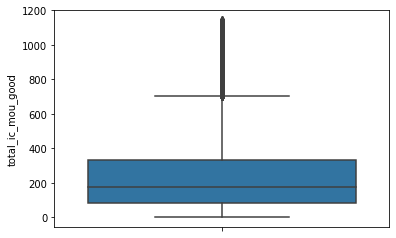

spl_ic_mou_good
0.365

0.000    19336
0.075      515
0.065      242
0.030      229
0.150      213
         ...  
0.350        1
0.465        1
0.050        1
0.200        1
0.325        1
Name: spl_ic_mou_good, Length: 141, dtype: int64


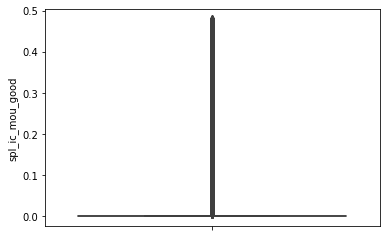

isd_ic_mou_good
114.35089999999991

0.000      17958
0.005        137
0.015         76
0.025         74
0.230         54
           ...  
14.100         1
16.410         1
13.505         1
103.680        1
36.335         1
Name: isd_ic_mou_good, Length: 4023, dtype: int64


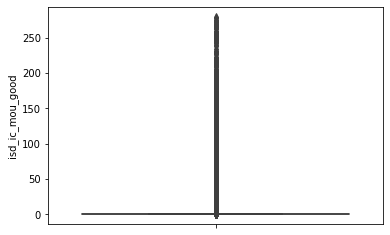

ic_others_good
12.908699999999989

0.000     16649
0.040       173
0.030       166
0.025       163
0.075       161
          ...  
4.740         1
6.555         1
3.560         1
5.140         1
21.715        1
Name: ic_others_good, Length: 1961, dtype: int64


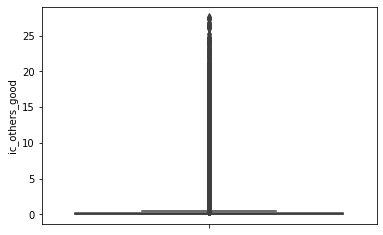

vol_2g_mb_good
1185.6239499999997

0.000      11299
0.005         55
0.010         39
0.020         28
0.015         22
           ...  
61.225         1
154.015        1
191.380        1
17.925         1
837.150        1
Name: vol_2g_mb_good, Length: 12087, dtype: int64


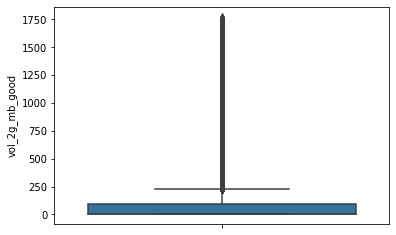

vol_3g_mb_good
2681.615999999989

0.000       15164
0.005          19
0.010           7
0.030           5
0.015           5
            ...  
832.130         1
1548.595        1
145.240         1
1794.775        1
216.300         1
Name: vol_3g_mb_good, Length: 10076, dtype: int64


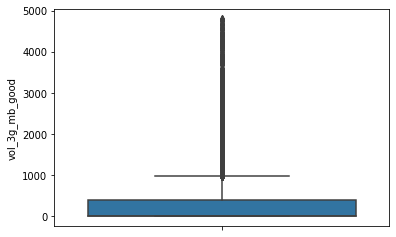

monthly_2g_good
1.5

0.0    20409
0.5     2485
1.0     1873
1.5      620
2.0       64
2.5       12
3.0        1
Name: monthly_2g_good, dtype: int64


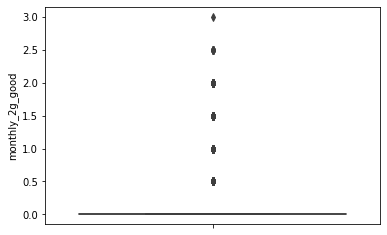

sachet_2g_good
11.5

0.0     16145
0.5      2143
1.0      1329
1.5       813
2.0       663
2.5       506
3.0       465
3.5       428
4.0       418
4.5       349
5.0       343
5.5       272
6.0       246
6.5       177
7.0       165
8.0       130
7.5       125
9.0       108
8.5       107
10.0       79
9.5        74
10.5       65
11.0       57
11.5       46
12.5       37
12.0       36
13.0       29
14.0       15
14.5       14
13.5       13
16.0       10
16.5        9
15.0        8
17.5        6
15.5        6
17.0        5
20.5        3
19.0        3
21.0        3
18.0        3
29.5        2
22.5        2
20.0        1
24.0        1
19.5        1
28.0        1
18.5        1
25.5        1
27.0        1
Name: sachet_2g_good, dtype: int64


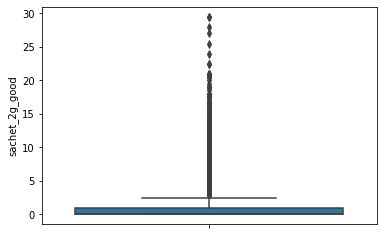

monthly_3g_good
2.0

0.0    20656
0.5     2075
1.0     1458
1.5      789
2.0      264
2.5      105
3.0       62
3.5       28
4.0       12
4.5        8
5.0        4
6.0        2
5.5        1
Name: monthly_3g_good, dtype: int64


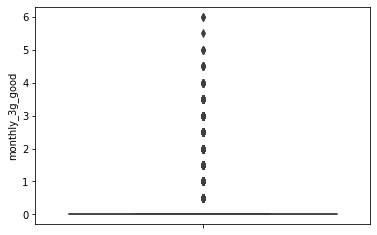

sachet_3g_good
4.0

0.0     21449
0.5      2096
1.0       847
1.5       387
2.0       172
2.5       111
3.0        78
3.5        57
4.0        50
4.5        41
5.0        34
5.5        20
6.0        19
7.0        15
6.5        13
8.0        11
11.0        7
9.5         7
9.0         6
7.5         6
10.0        5
12.0        4
14.5        4
8.5         3
15.0        3
10.5        2
11.5        2
18.5        2
12.5        2
15.5        2
13.5        2
13.0        2
27.0        1
21.5        1
25.0        1
18.0        1
17.0        1
Name: sachet_3g_good, dtype: int64


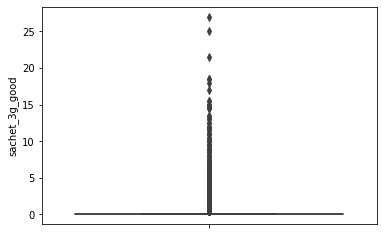

VBC_good
1482.3787499999996

0.000      15952
0.015          6
0.010          5
0.075          4
26.765         3
           ...  
560.670        1
16.990         1
420.830        1
226.585        1
10.000         1
Name: VBC_good, Length: 9206, dtype: int64


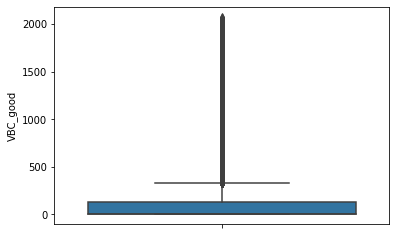

In [71]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
good = list(filter(lambda x: True if '_8' not in x else False, continous_columns))
for column in good:
    print(column)
    print(df[column].quantile(.99))
    print()
    
    print(df[column].value_counts())
    sns.boxplot(y=column,data=df)
    plt.show()

In [72]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
df[continous_columns]= np.log(df[continous_columns]+1)

**Creating Derived Columns: Diff = Action - Good** <br>


In [73]:
date_columns=df.select_dtypes(exclude=['object']).columns.to_list()
for  column in date_columns:
    if '_good' in column:
        column = column.replace('_good','')
        df['{}_diff'.format(column)] = df['{}_8'.format(column)] - df['{}_good'.format(column)]
        #df = df.drop('{}_8'.format(column),axis=1)
        #df = df.drop('{}_good'.format(column),axis=1)

In [74]:
df.shape

(25464, 112)

In [75]:
#Step 1 Improvement
#df = df.drop(['monthly_2g_diff', 'sachet_2g_diff','monthly_3g_diff', 'sachet_3g_diff'],axis=1)

In [76]:
#Step 2 Improvement
#df= df.drop(['roam_ic_mou_diff', 'roam_og_mou_diff','loc_og_t2c_mou_diff', 'std_og_t2f_mou_diff','isd_og_mou_diff','og_others_diff'],axis=1)

In [77]:
df.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       ...
       'spl_ic_mou_diff', 'isd_ic_mou_diff', 'ic_others_diff',
       'vol_2g_mb_diff', 'vol_3g_mb_diff', 'monthly_2g_diff', 'sachet_2g_diff',
       'monthly_3g_diff', 'sachet_3g_diff', 'VBC_diff'],
      dtype='object', length=112)

**Plotting Continuous variables vs churn column**

In [78]:
df['churn'].value_counts()

No     23258
Yes     2206
Name: churn, dtype: int64

In [79]:
#Creating a function for plotting categorical data using Boxplots
def plot_categorical_data(df_temp,xdata,ydata):
    plt.figure(figsize=(15,5))
    sns.boxplot(x=xdata,y=ydata, data=df_temp)
    plt.show() 

In [80]:
df_churn = df.loc[df['churn']=='Yes']

onnet_mou_8
6.093530757109753


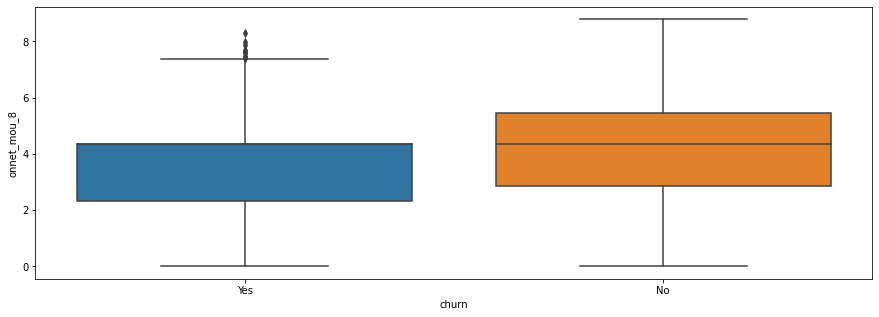

offnet_mou_8
6.206016247608792


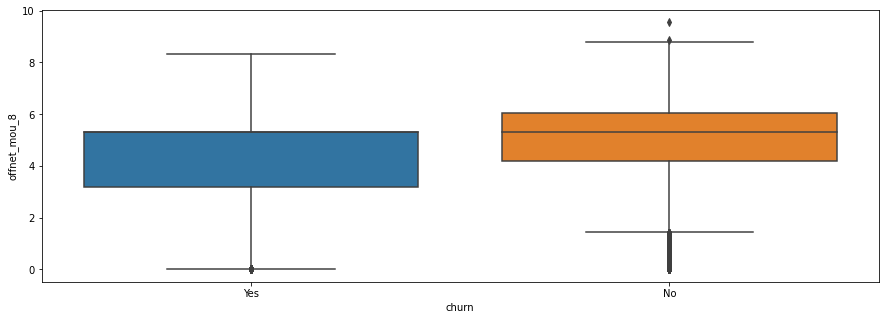

roam_ic_mou_8
4.499197996705108


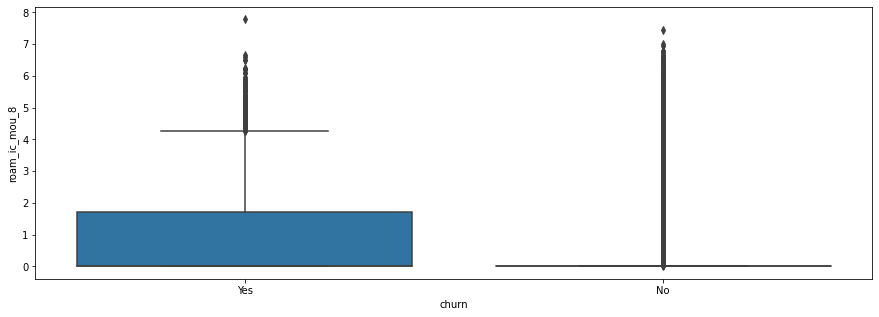

roam_og_mou_8
4.960235402296591


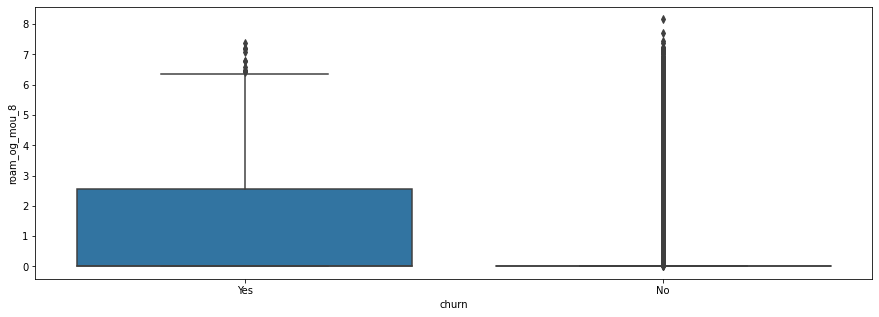

loc_og_t2t_mou_8
4.054842643195714


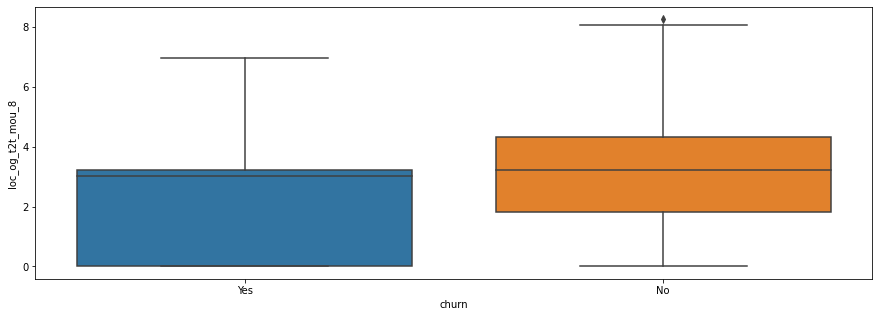

loc_og_t2m_mou_8
4.984821625733411


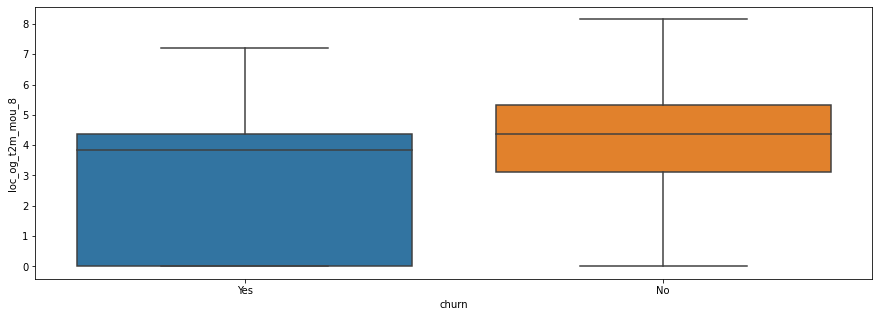

loc_og_t2f_mou_8
1.4427670488364104


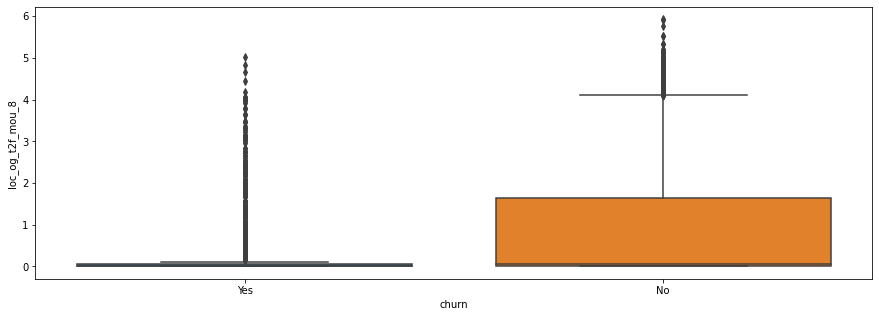

loc_og_t2c_mou_8
1.4188554977859729


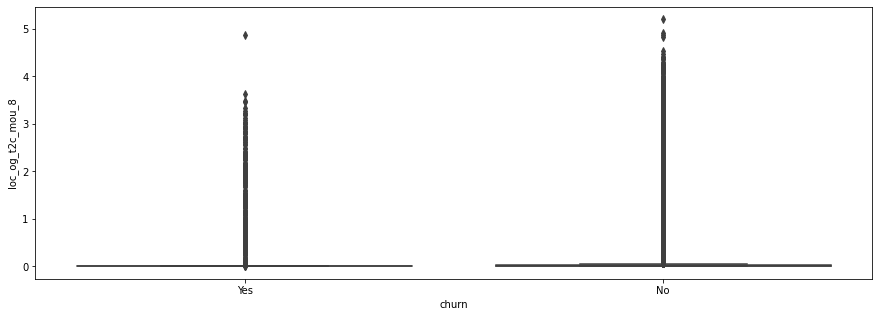

loc_og_mou_8
5.433662999753747


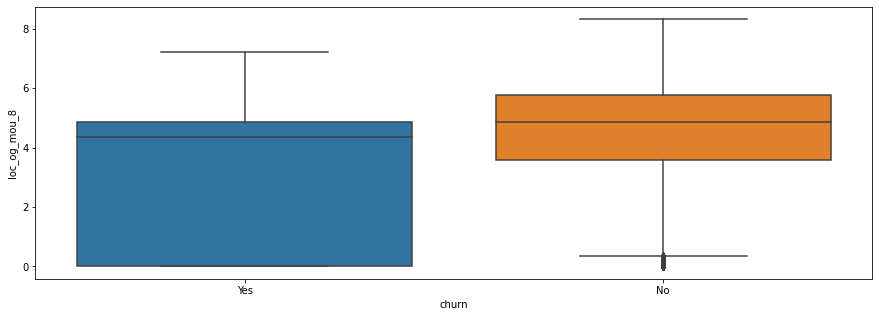

std_og_t2t_mou_8
5.891904440022864


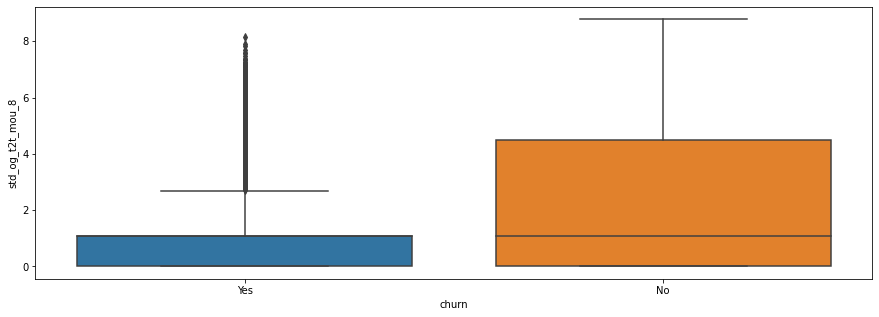

std_og_t2m_mou_8
5.793907655295626


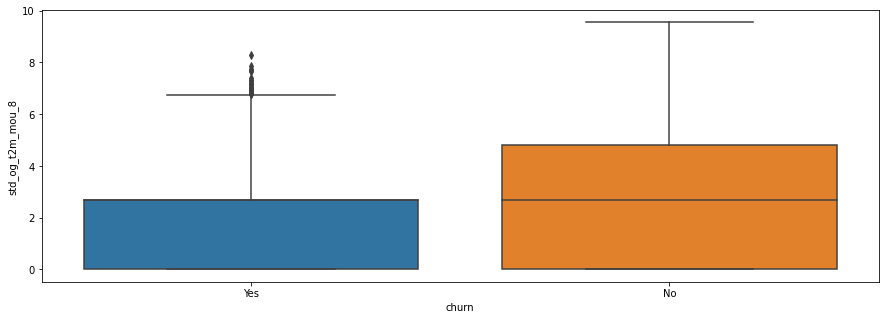

std_og_t2f_mou_8
0.0


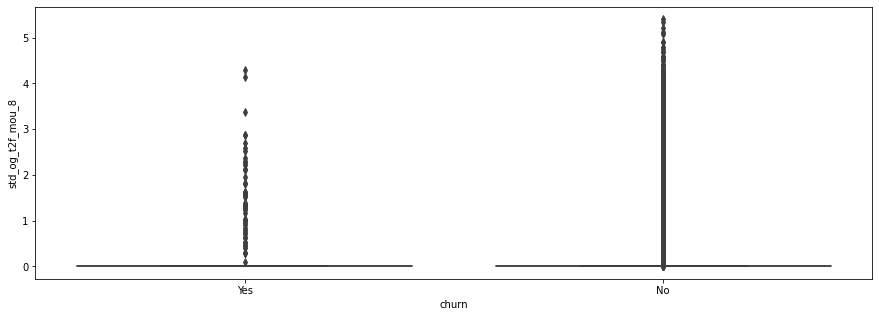

std_og_mou_8
6.58843398826028


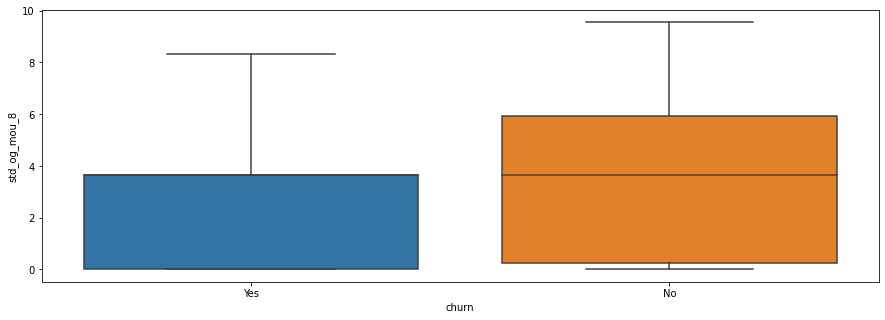

isd_og_mou_8
0.0


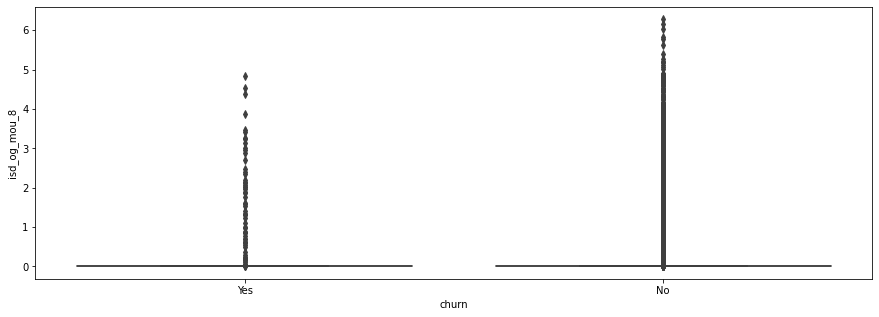

spl_og_mou_8
2.4357387211021653


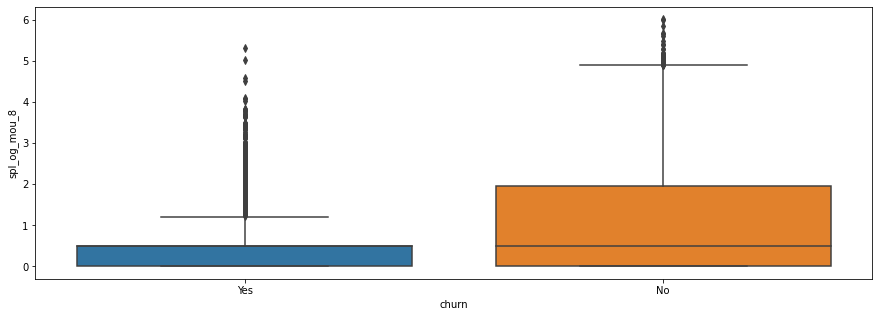

og_others_8
0.0


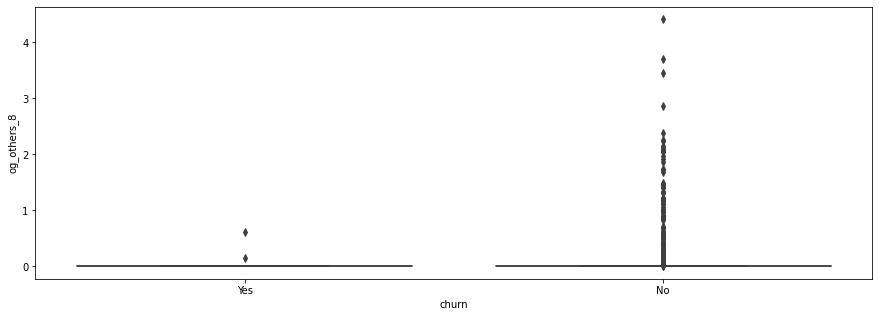

total_og_mou_8
6.767466547317663


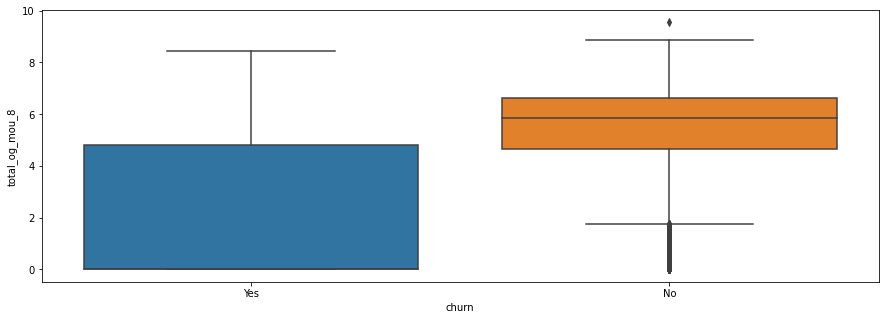

loc_ic_t2t_mou_8
4.044891667001621


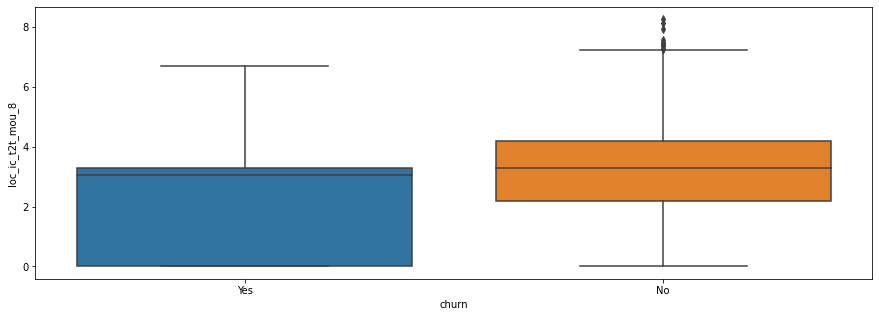

loc_ic_t2m_mou_8
4.869077591628476


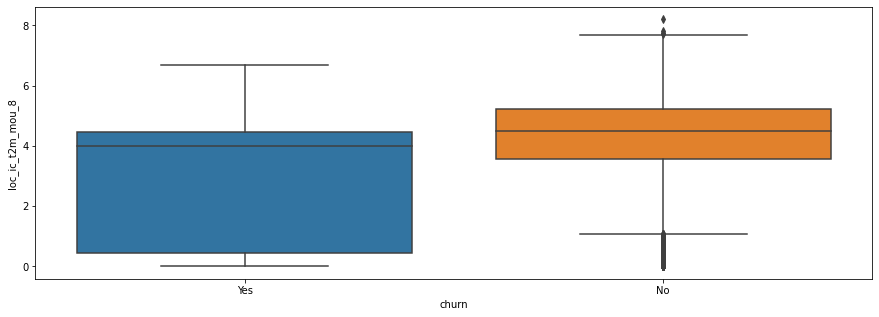

loc_ic_t2f_mou_8
2.3558867549308014


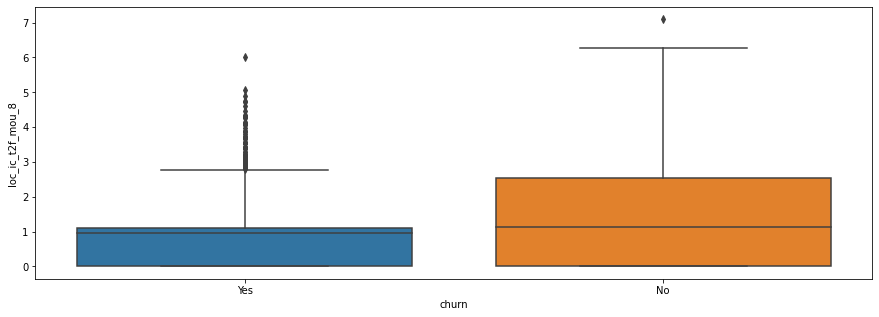

loc_ic_mou_8
5.259212646667276


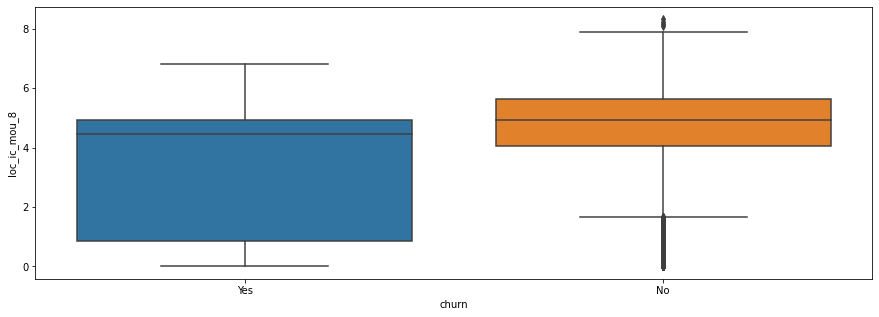

std_ic_t2t_mou_8
2.765775023170617


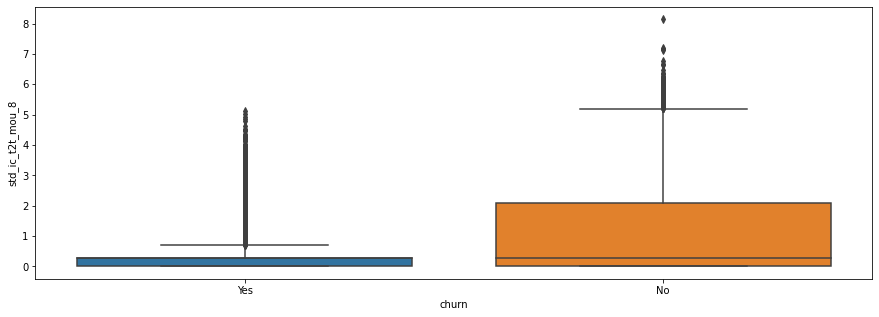

std_ic_t2m_mou_8
3.4172094003414015


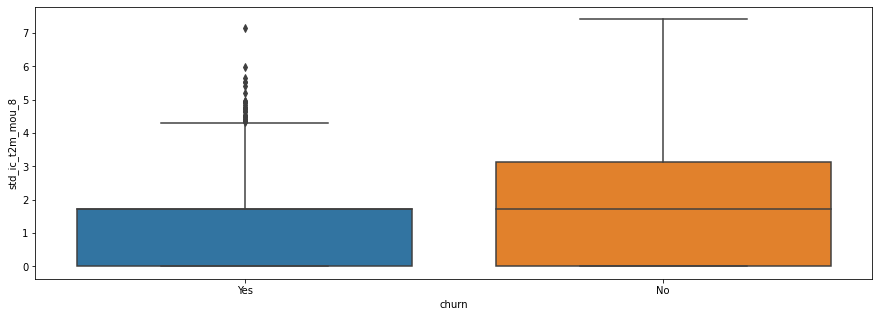

std_ic_t2f_mou_8
0.0


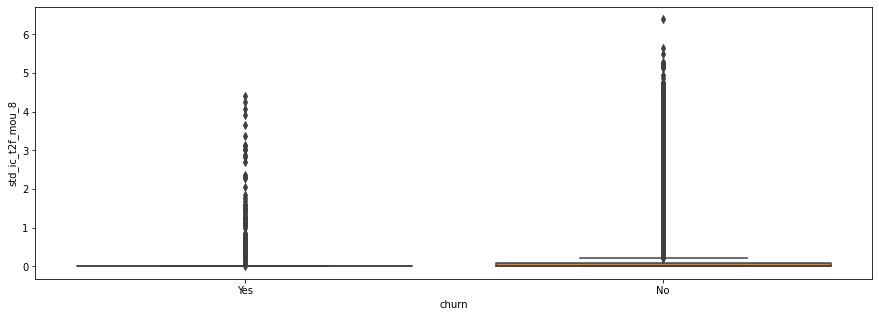

std_ic_mou_8
3.931863709473242


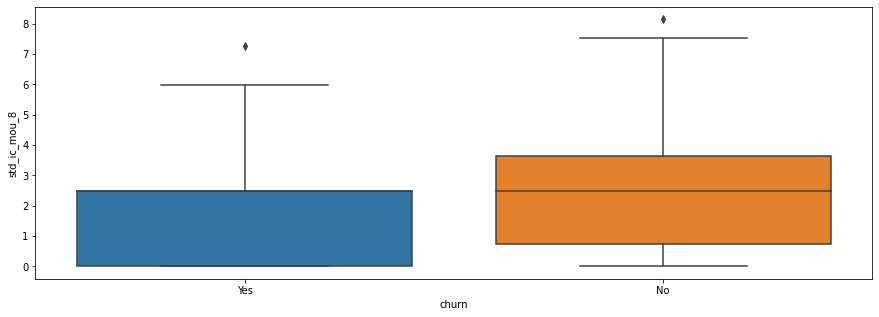

total_ic_mou_8
5.5157511091731335


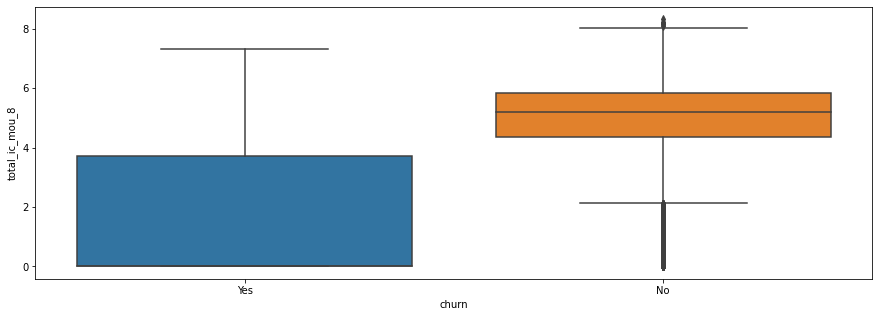

spl_ic_mou_8
0.0


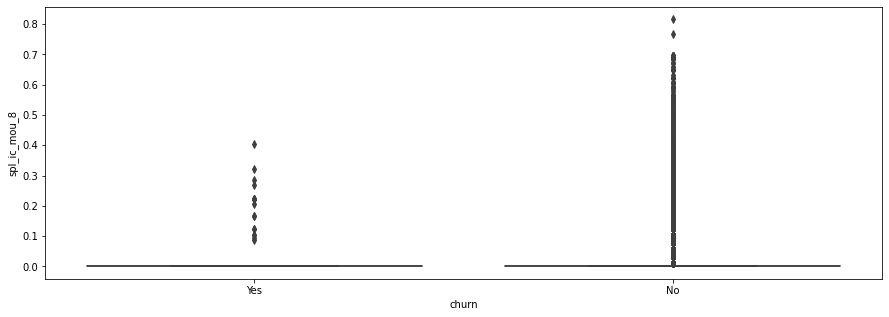

isd_ic_mou_8
1.8277543311723594


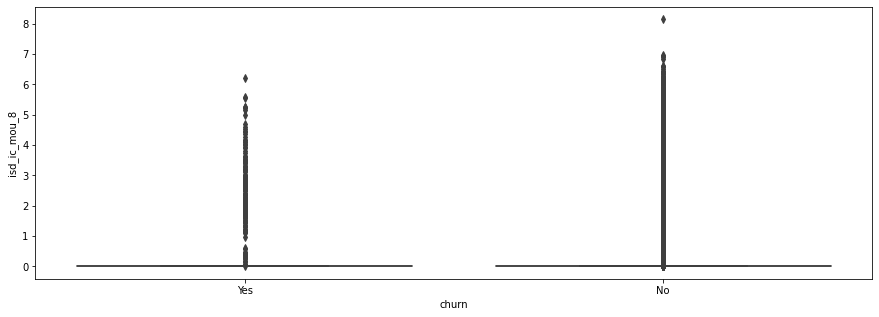

ic_others_8
0.1309114606124297


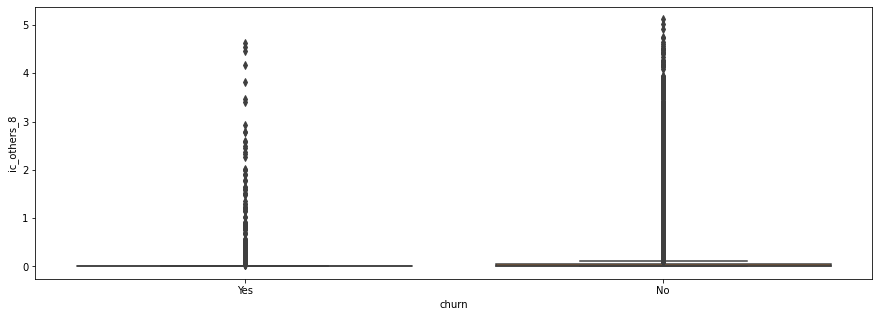

vol_2g_mb_8
4.132172780693802


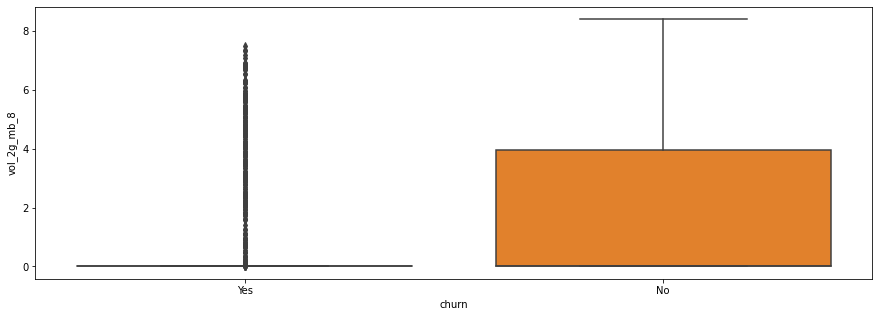

vol_3g_mb_8
5.3761567221834055


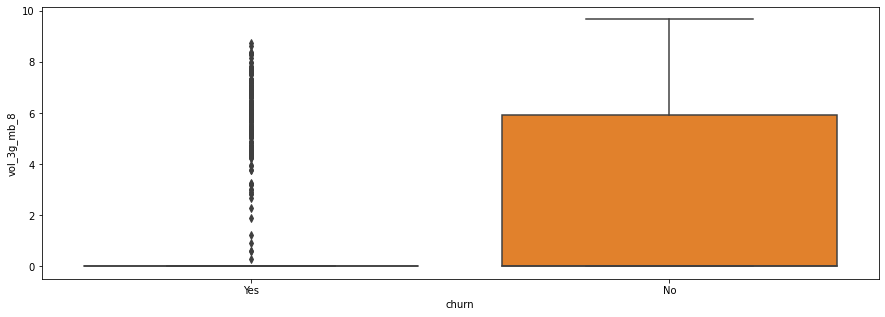

monthly_2g_8
0.0


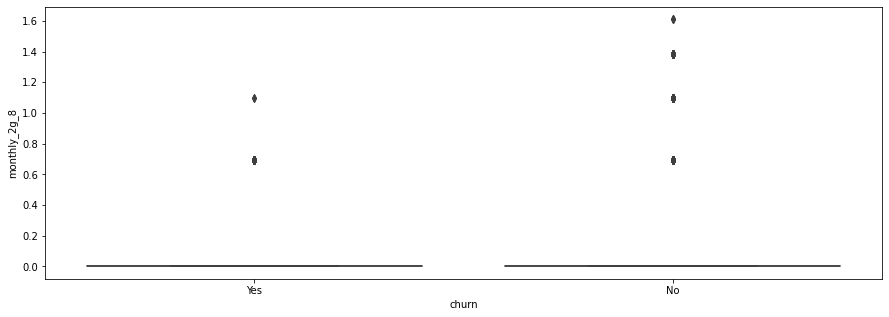

sachet_2g_8
1.0986122886681098


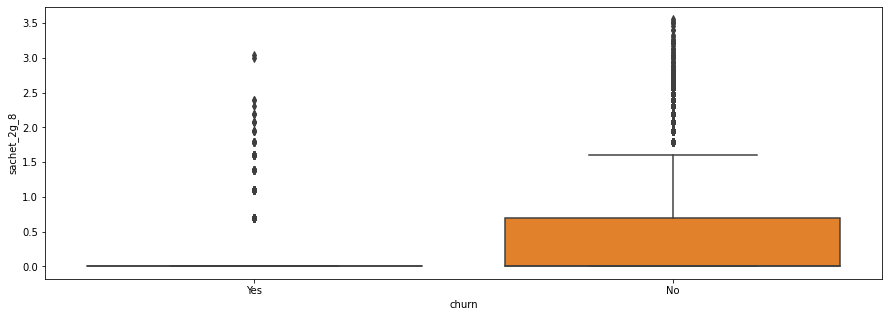

monthly_3g_8
0.0


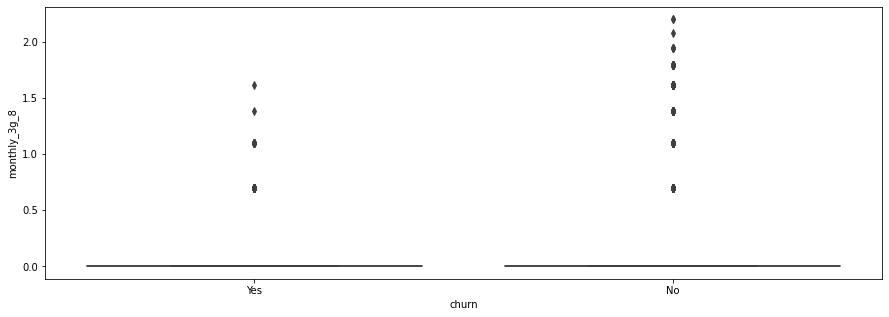

sachet_3g_8
0.0


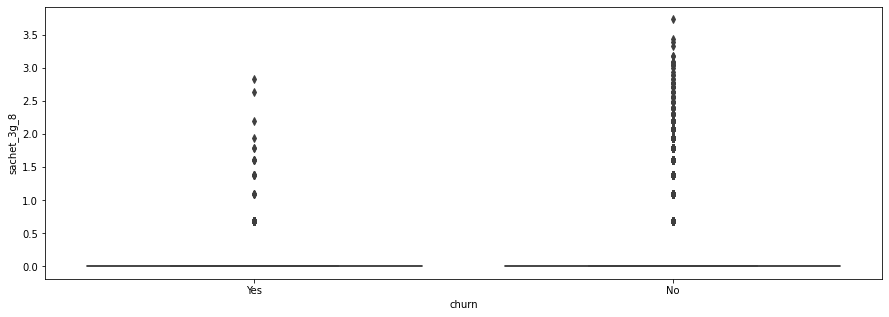

aon
7.84257295387457


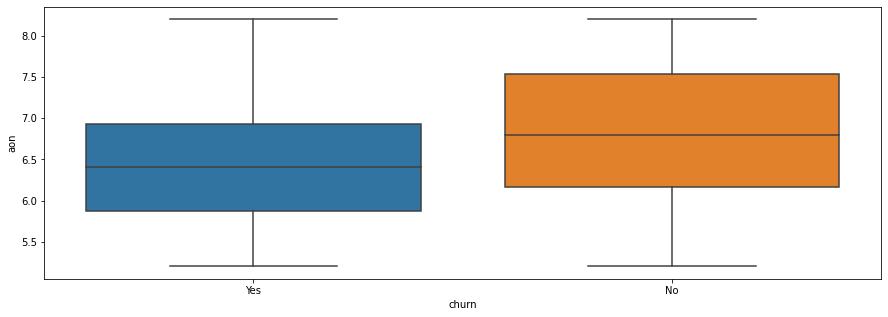

VBC_8
5.127918614252103


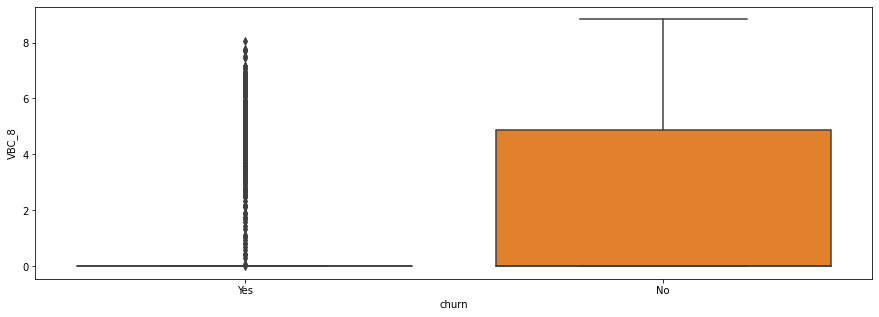

onnet_mou_good
6.989796928064319


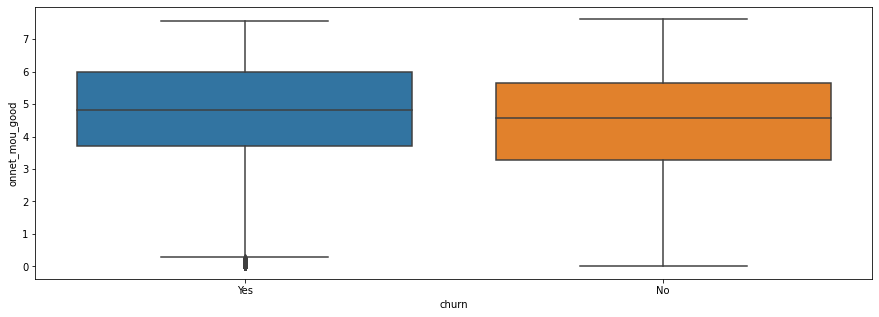

offnet_mou_good
7.048125310002788


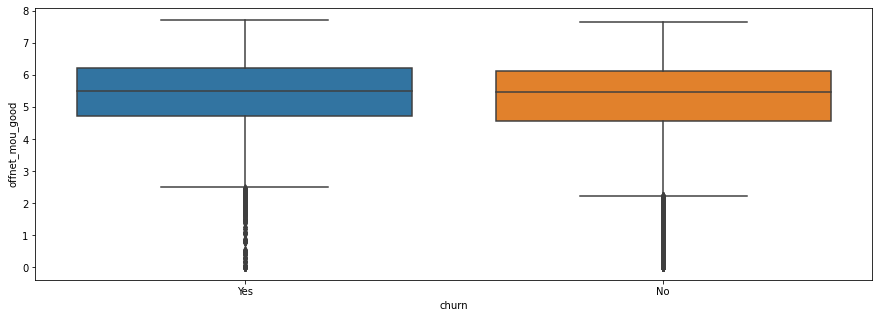

roam_ic_mou_good
4.4646283706213


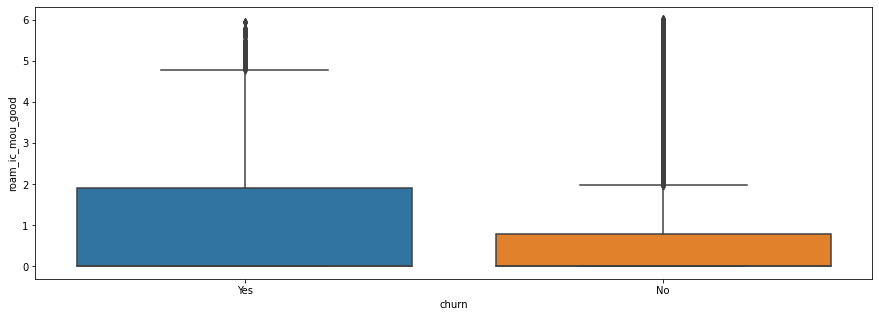

roam_og_mou_good
5.1729006321918565


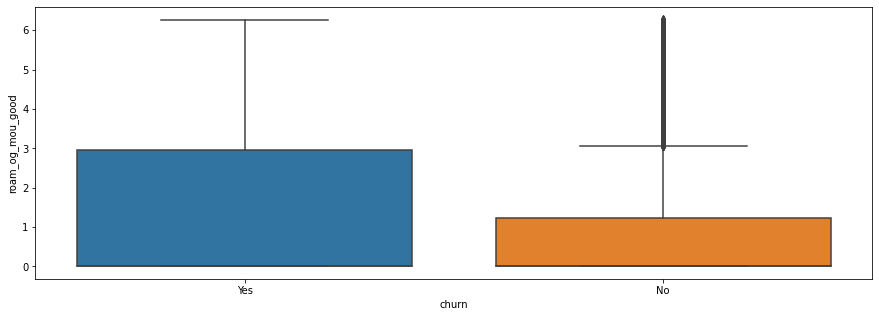

loc_og_t2t_mou_good
5.139787103462768


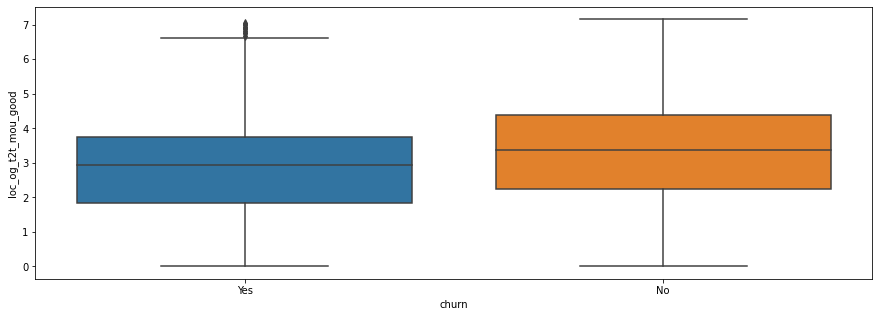

loc_og_t2m_mou_good
5.875761491943897


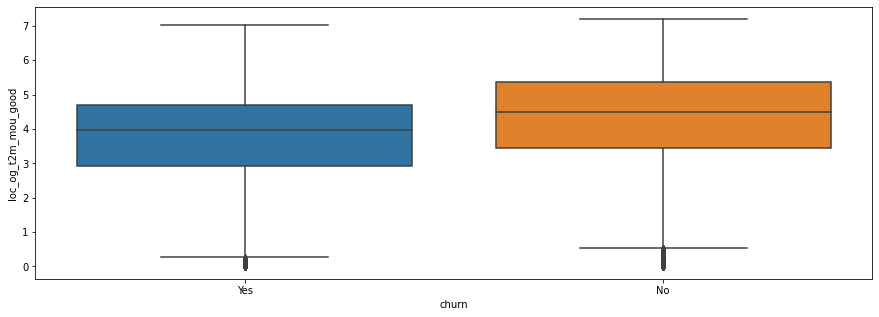

loc_og_t2f_mou_good
2.583997338725508


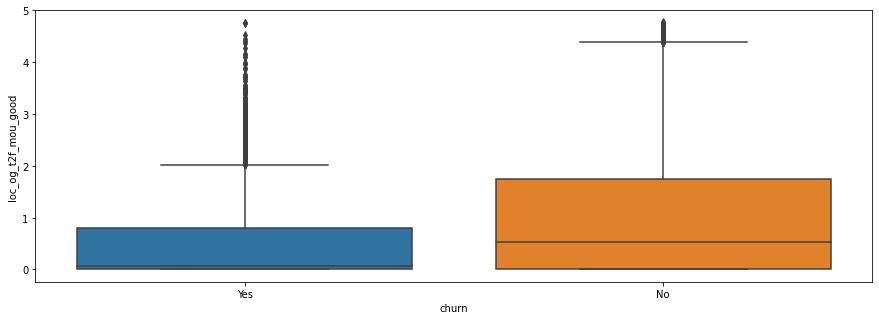

loc_og_t2c_mou_good
2.101233294566599


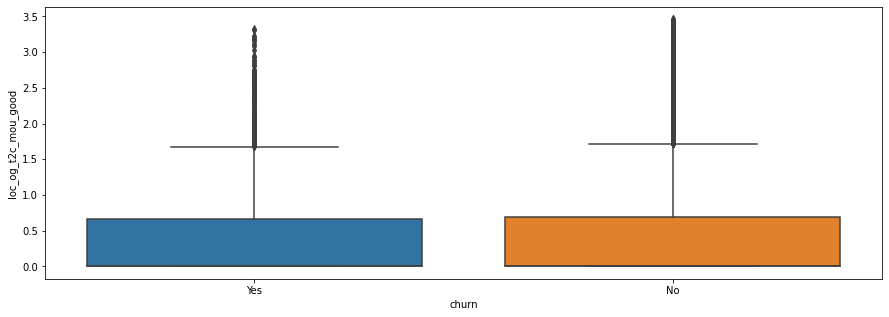

loc_og_mou_good
6.248271588961746


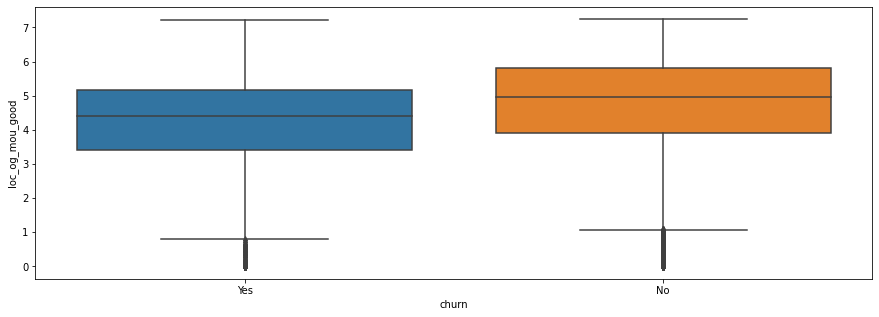

std_og_t2t_mou_good
6.911093450892135


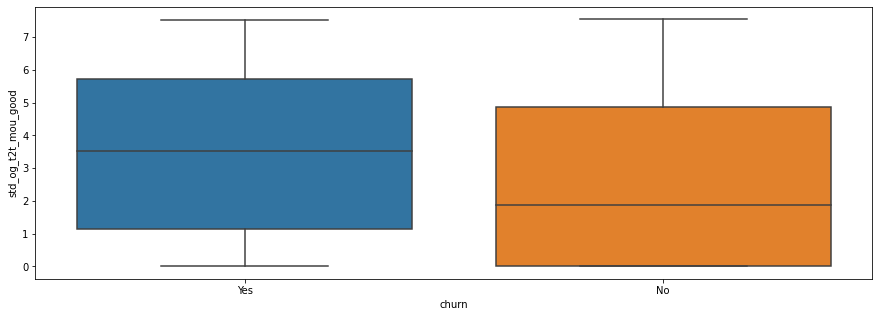

std_og_t2m_mou_good
6.9245995710246095


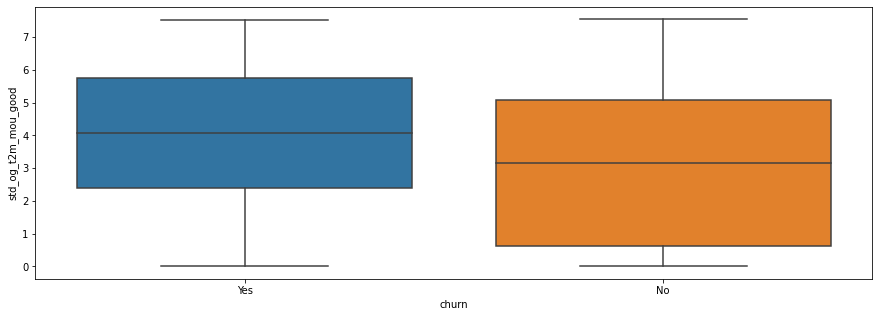

std_og_t2f_mou_good
1.3934141246105387


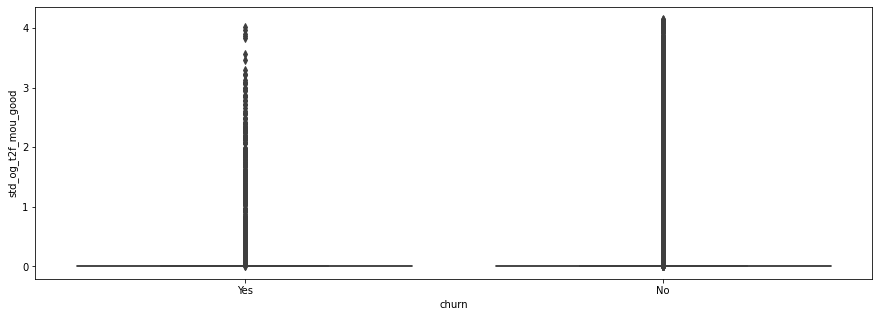

std_og_mou_good
7.313666116672046


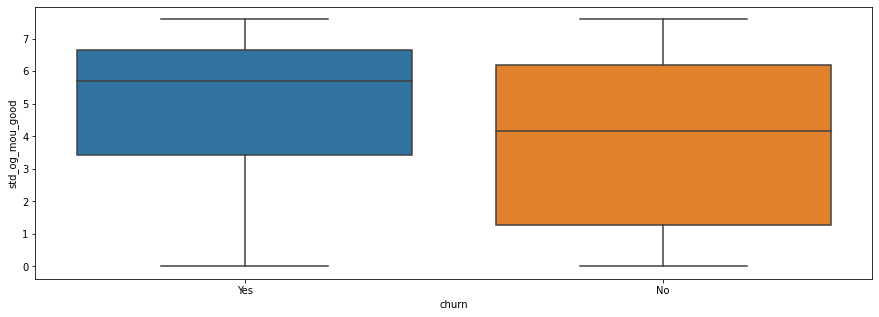

isd_og_mou_good
0.985732409200964


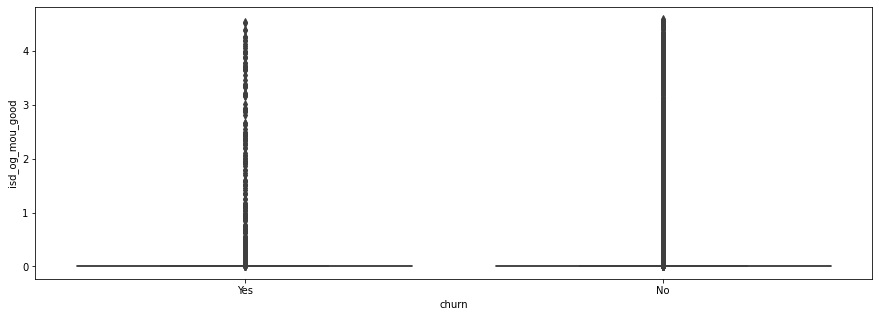

spl_og_mou_good
3.2298128832045805


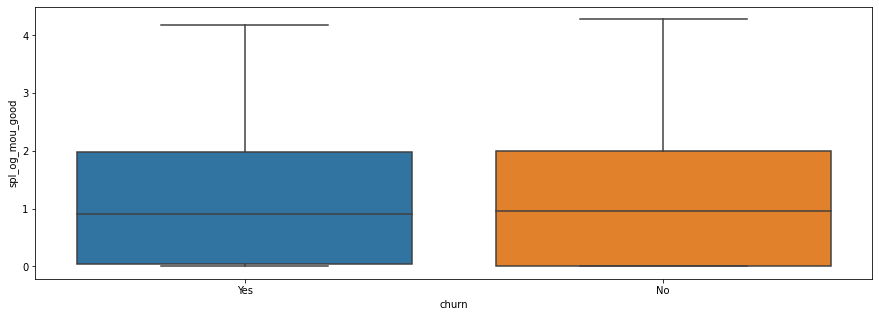

og_others_good
1.1410330045520618


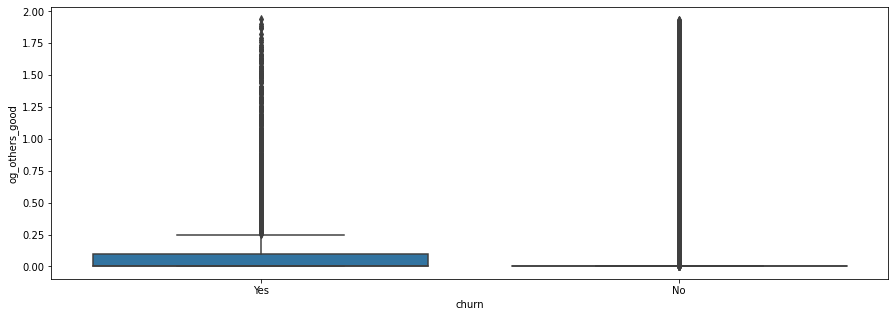

total_og_mou_good
7.402705975689291


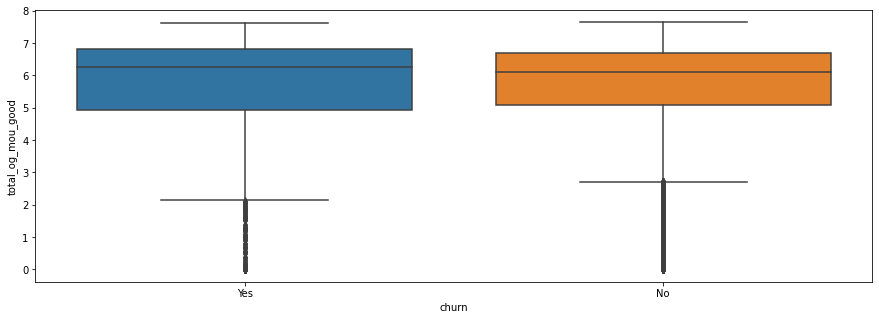

loc_ic_t2t_mou_good
4.95479597605774


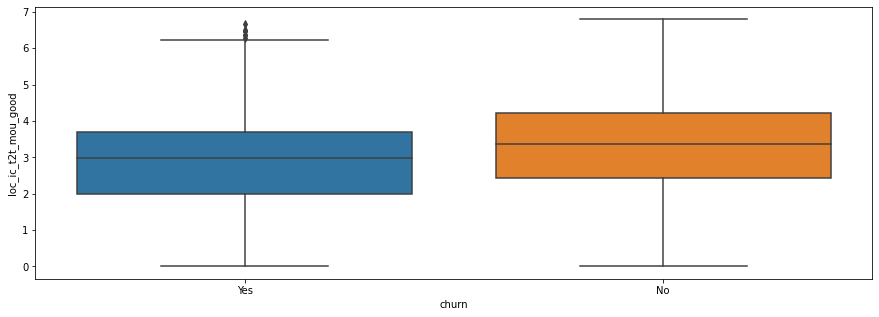

loc_ic_t2m_mou_good
5.676543982336515


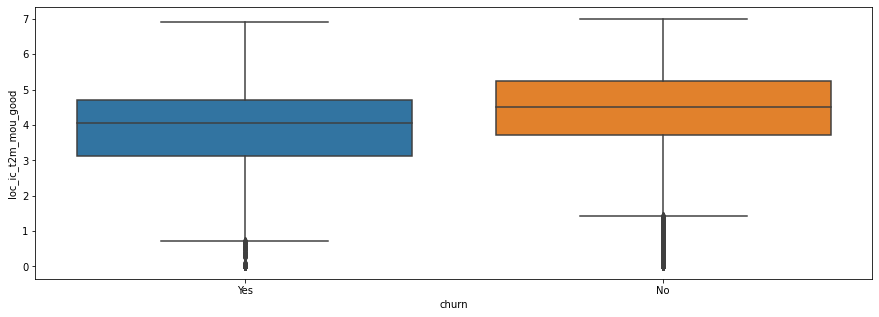

loc_ic_t2f_mou_good
3.406586758456798


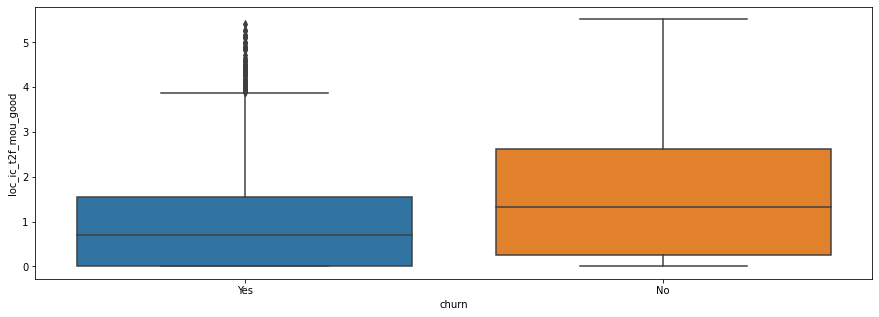

loc_ic_mou_good
6.104375983979467


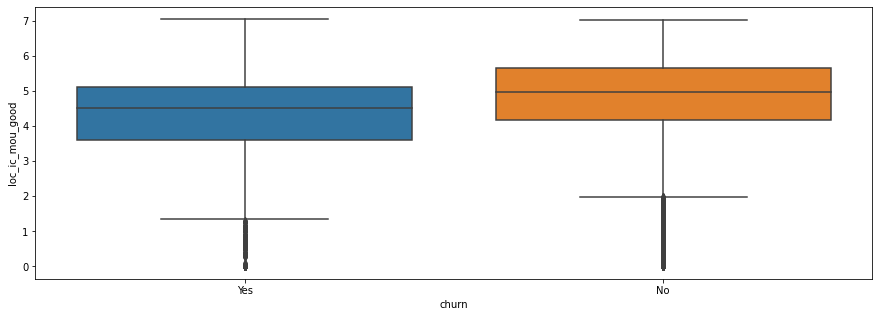

std_ic_t2t_mou_good
3.961788577350531


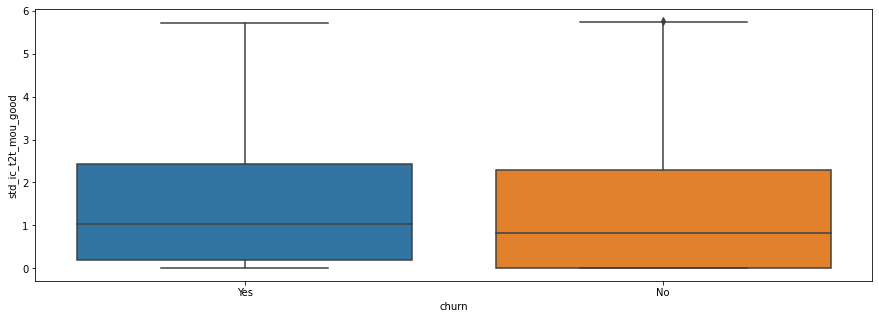

std_ic_t2m_mou_good
4.534130490949227


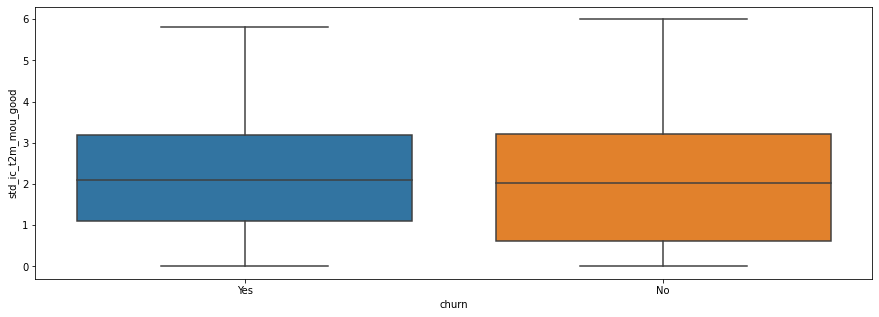

std_ic_t2f_mou_good
1.7128523928308954


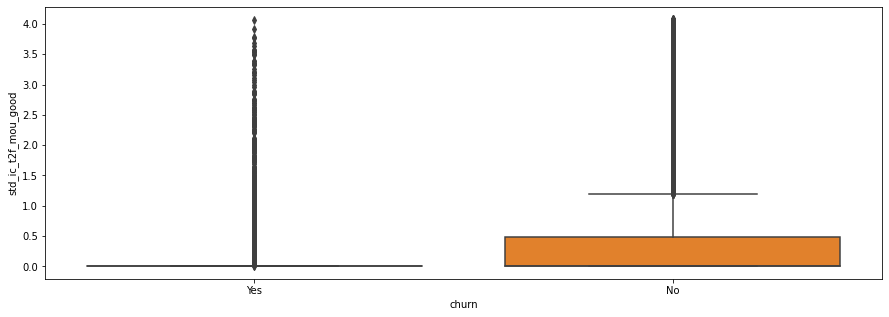

std_ic_mou_good
4.922774551047819


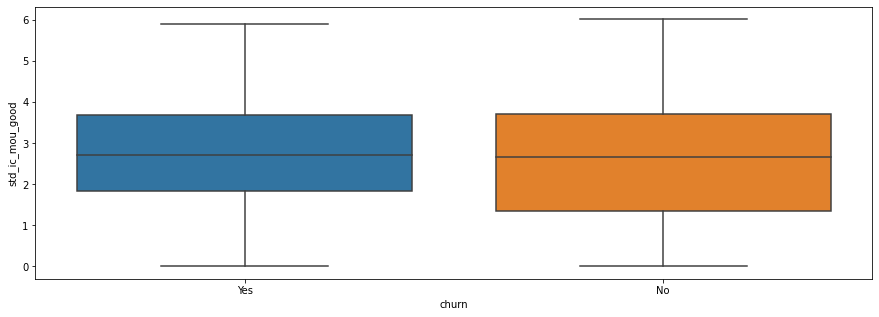

total_ic_mou_good
6.245257980091757


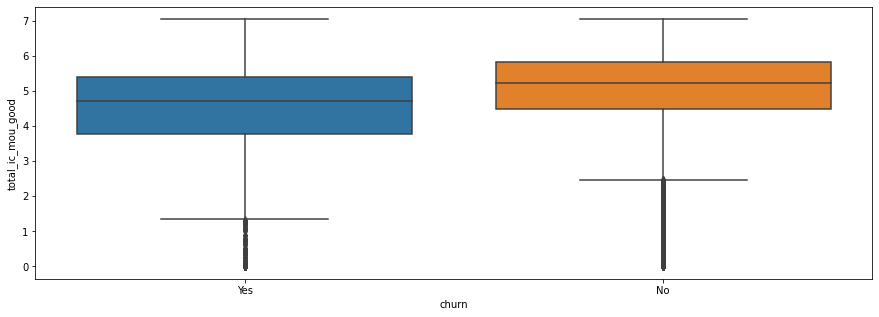

spl_ic_mou_good
0.20294084399669038


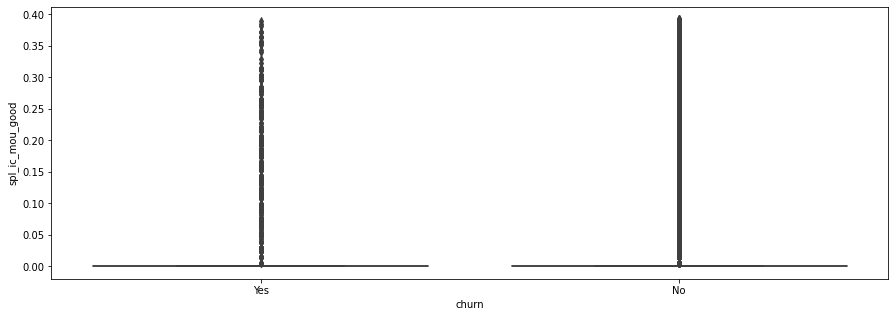

isd_ic_mou_good
3.626704762018962


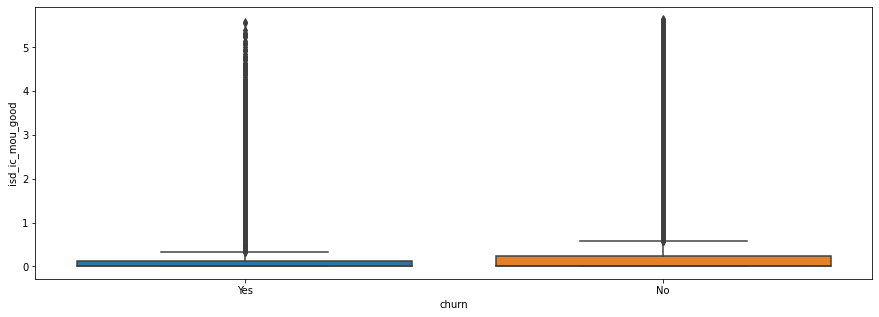

ic_others_good
1.5408826322016211


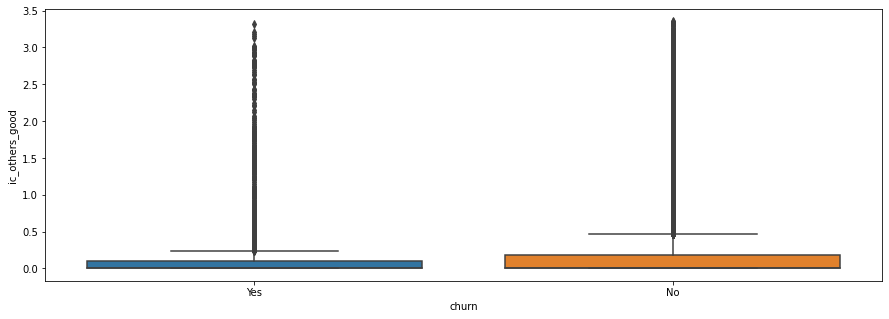

vol_2g_mb_good
6.211677835928172


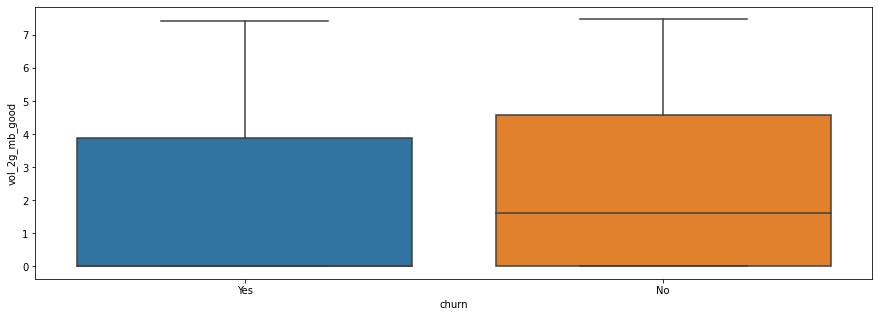

vol_3g_mb_good
7.038989862500088


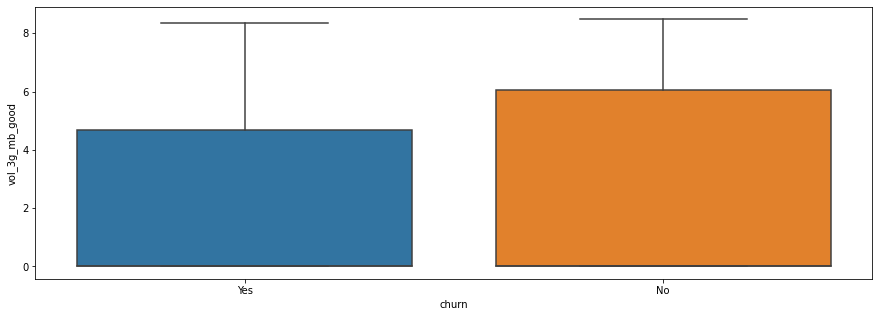

monthly_2g_good
0.4054651081081644


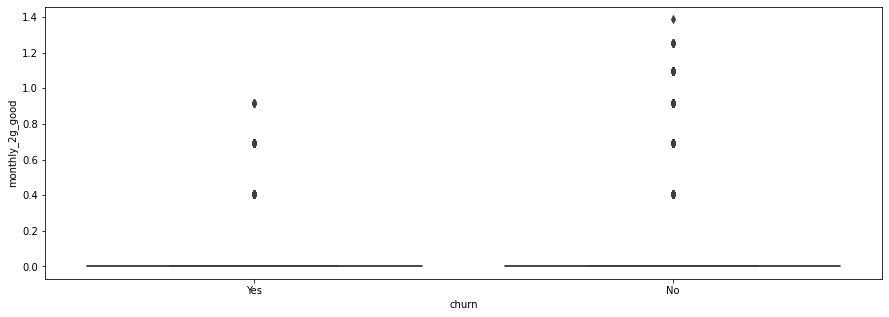

sachet_2g_good
1.8718021769015913


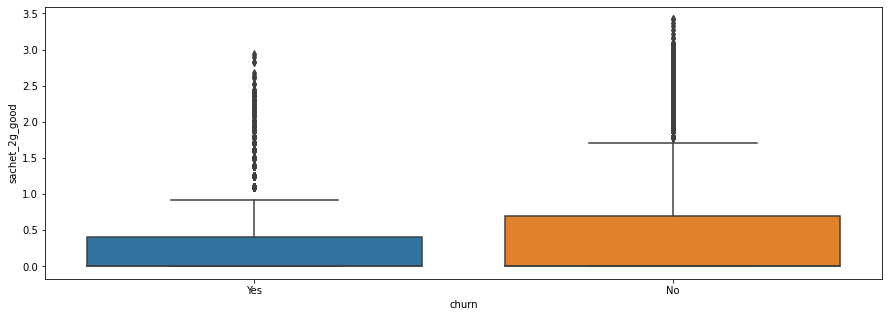

monthly_3g_good
0.6931471805599453


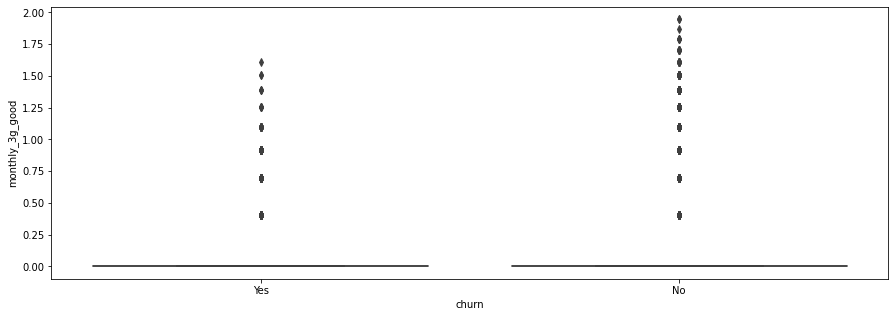

sachet_3g_good
0.6931471805599453


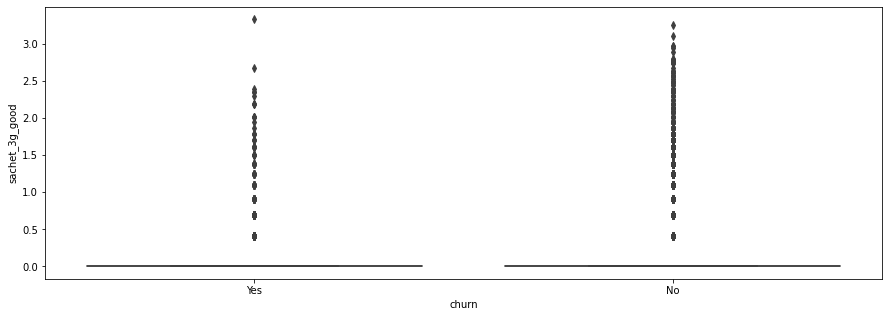

VBC_good
6.3746554844621395


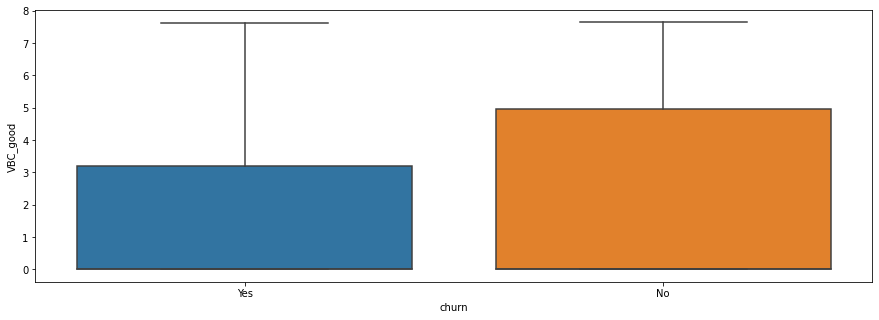

onnet_mou_diff
2.110846749928567


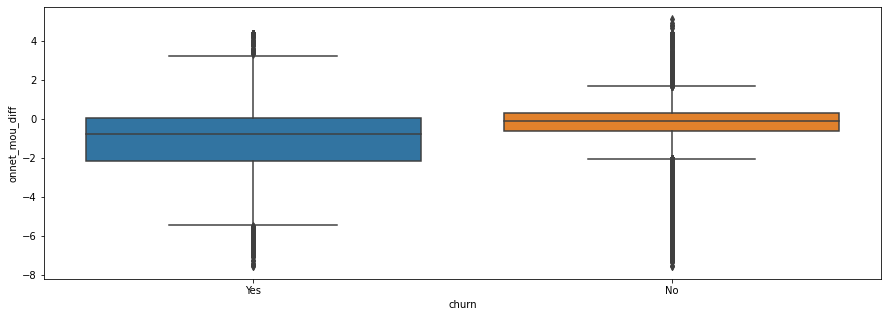

offnet_mou_diff
1.615112843868616


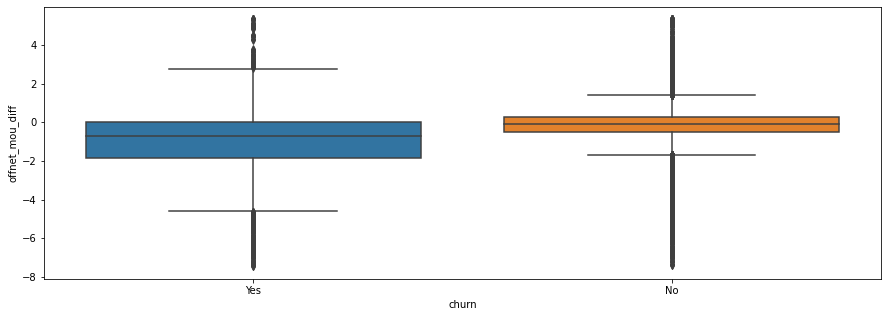

roam_ic_mou_diff
2.7637729278207086


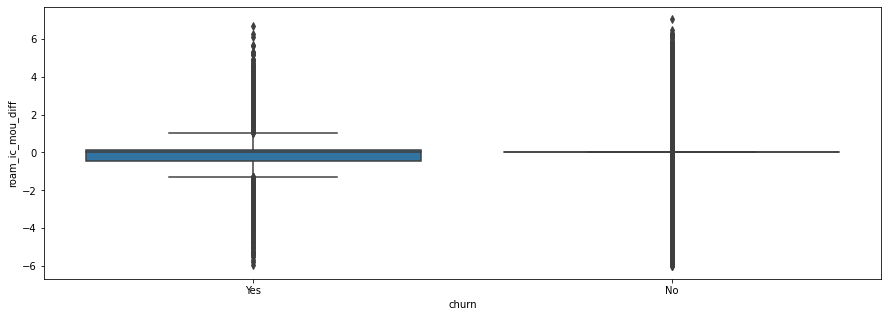

roam_og_mou_diff
3.6883905442586924


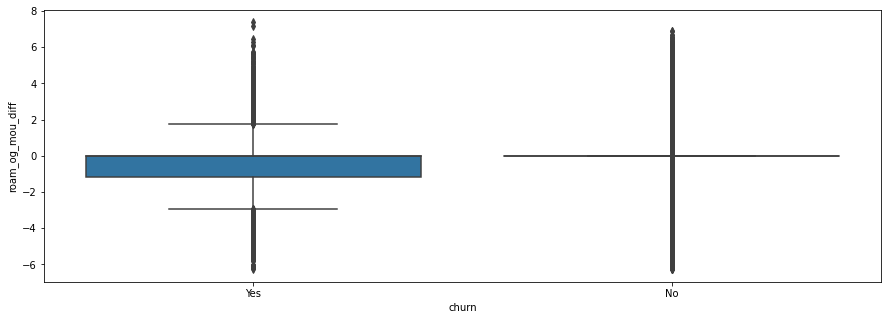

loc_og_t2t_mou_diff
2.423038631656829


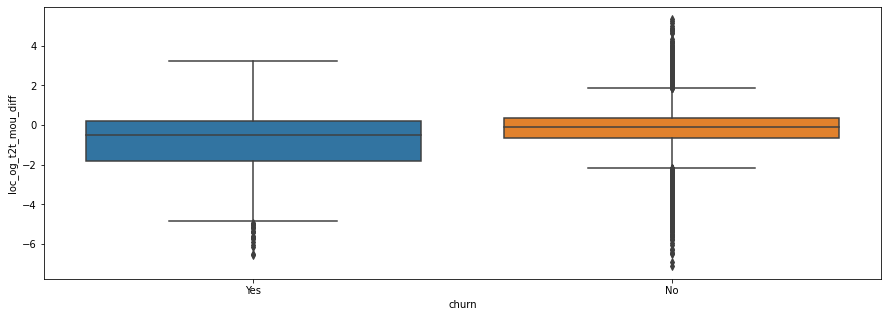

loc_og_t2m_mou_diff
2.3595666161851634


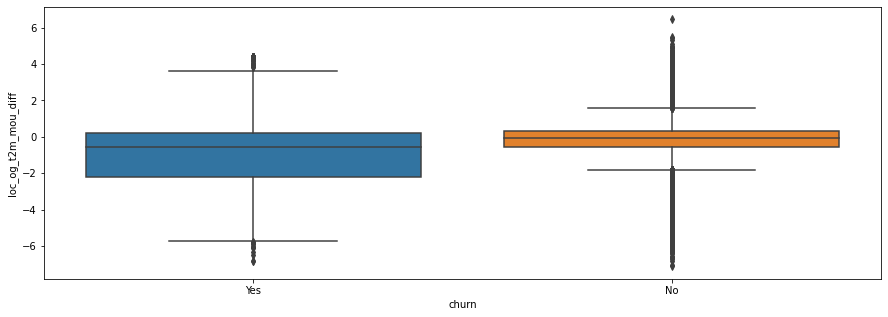

loc_og_t2f_mou_diff
0.14842000511827322


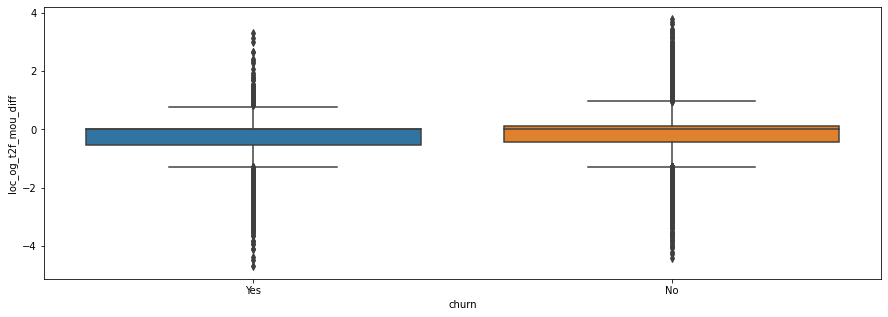

loc_og_t2c_mou_diff
0.7159585909083153


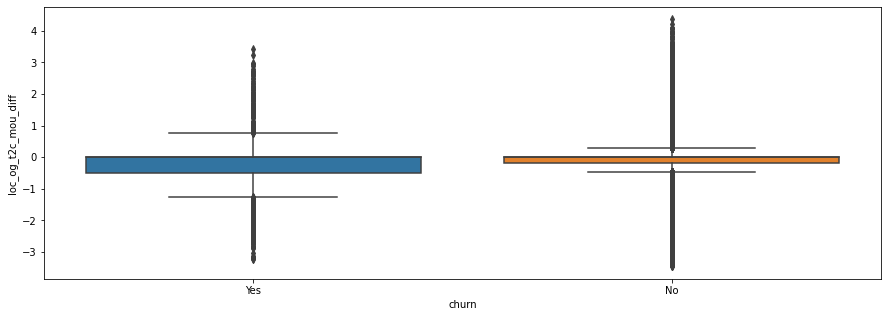

loc_og_mou_diff
2.2244487400497723


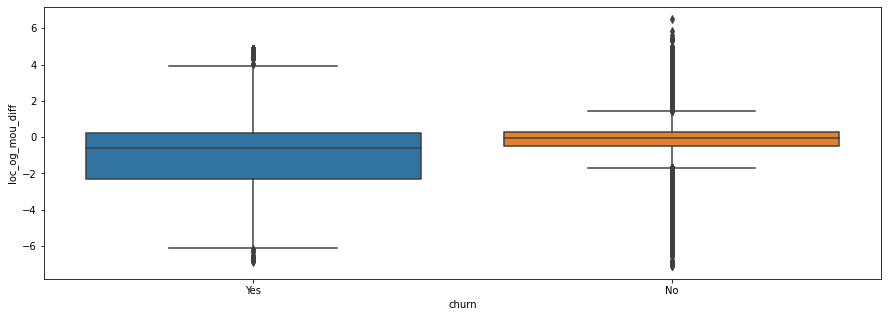

std_og_t2t_mou_diff
1.0750024230289759


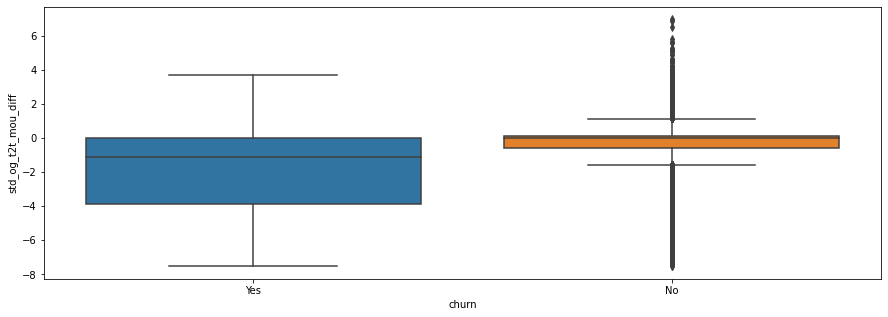

std_og_t2m_mou_diff
2.6939512767227085


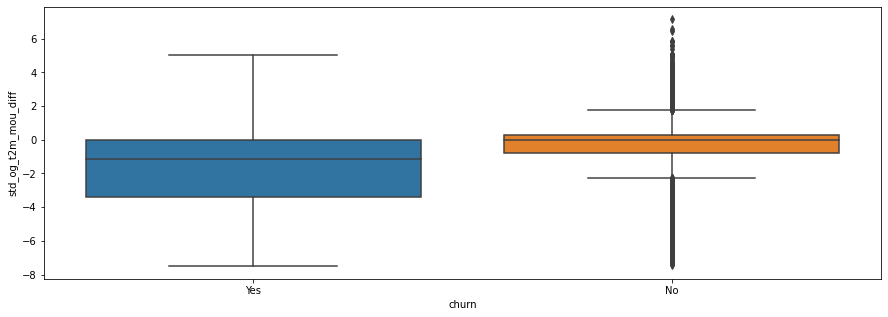

std_og_t2f_mou_diff
0.0


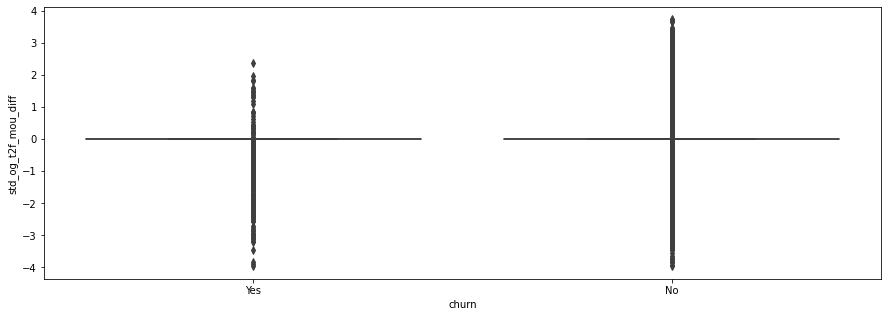

std_og_mou_diff
3.1503392944356294


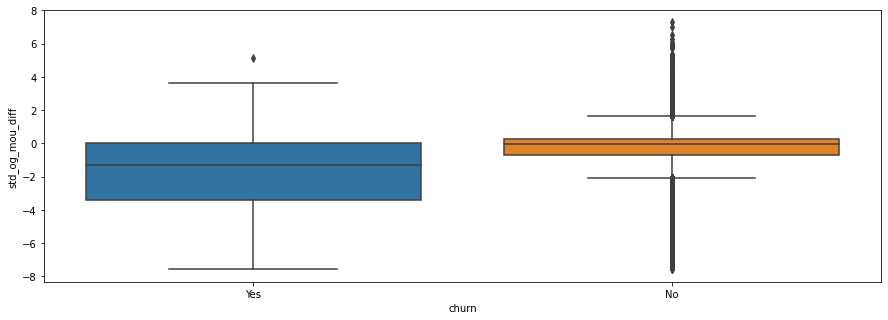

isd_og_mou_diff
0.0


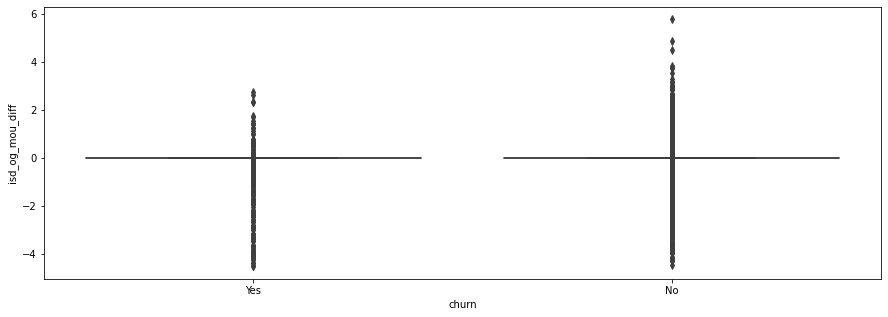

spl_og_mou_diff
0.9757489756086266


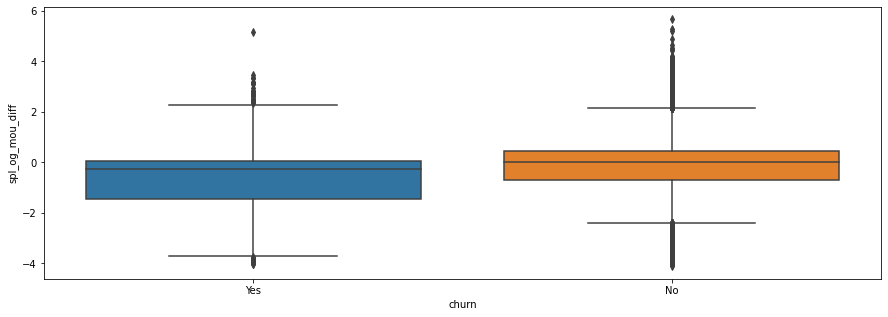

og_others_diff
0.0


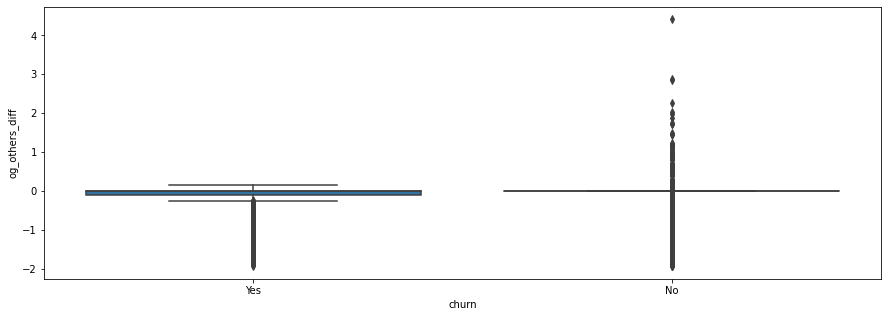

total_og_mou_diff
0.2297582198267959


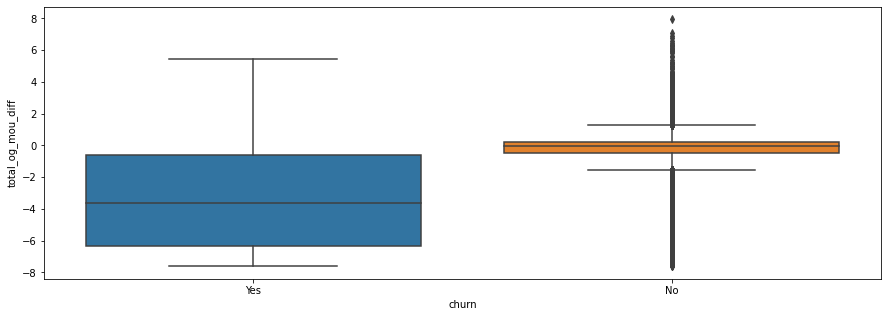

loc_ic_t2t_mou_diff
2.233552650221984


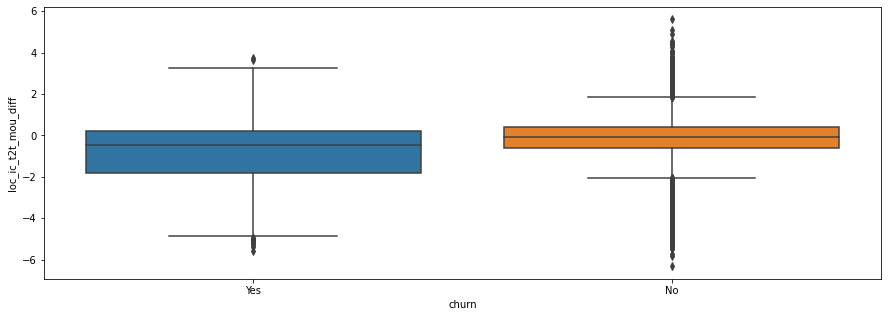

loc_ic_t2m_mou_diff
2.077639225309489


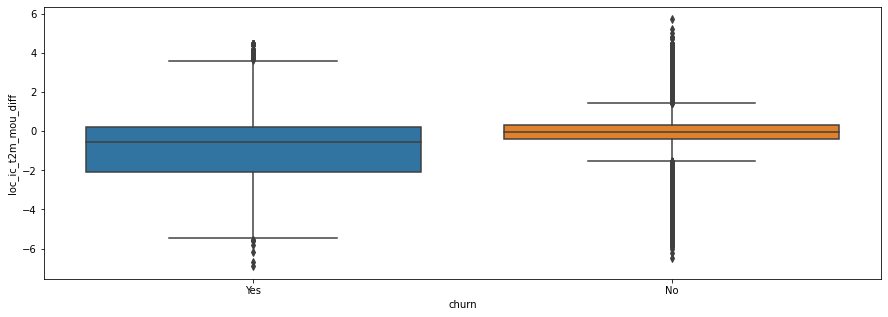

loc_ic_t2f_mou_diff
1.1085626195212777


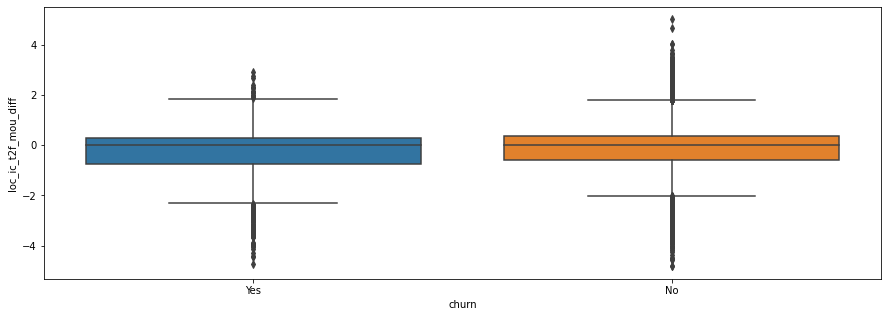

loc_ic_mou_diff
1.94542724924841


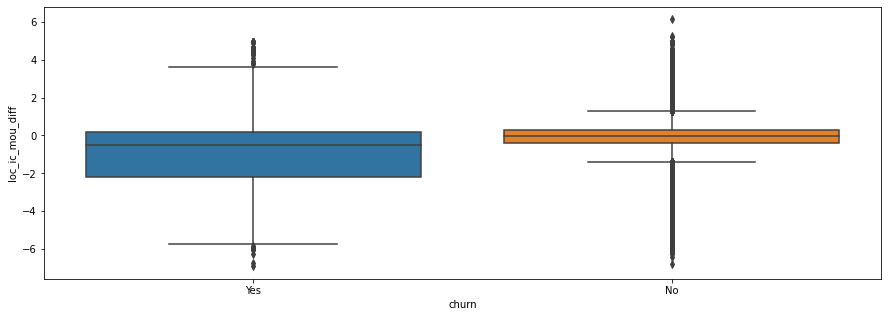

std_ic_t2t_mou_diff
0.438968782596186


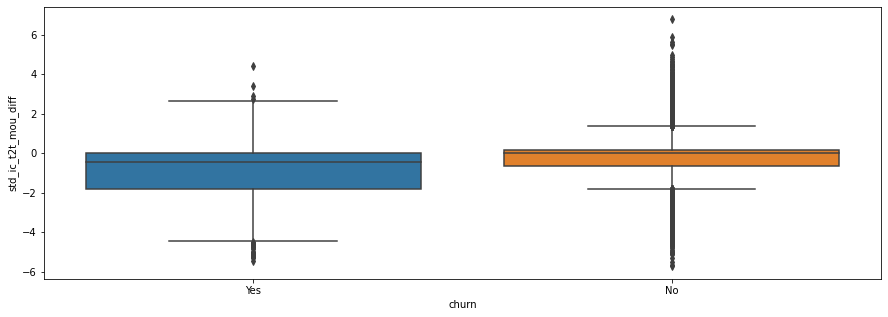

std_ic_t2m_mou_diff
1.728109442151599


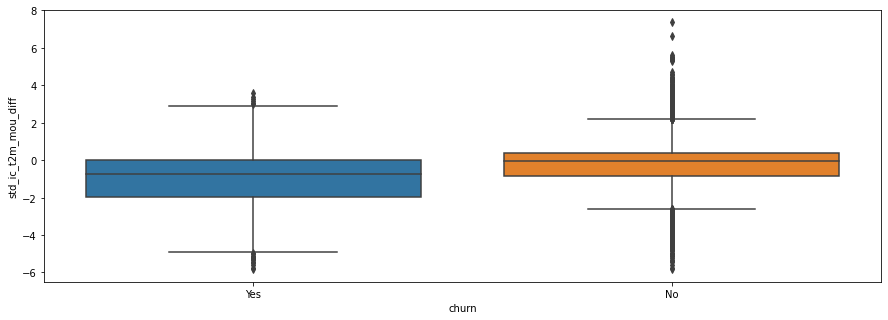

std_ic_t2f_mou_diff
0.0


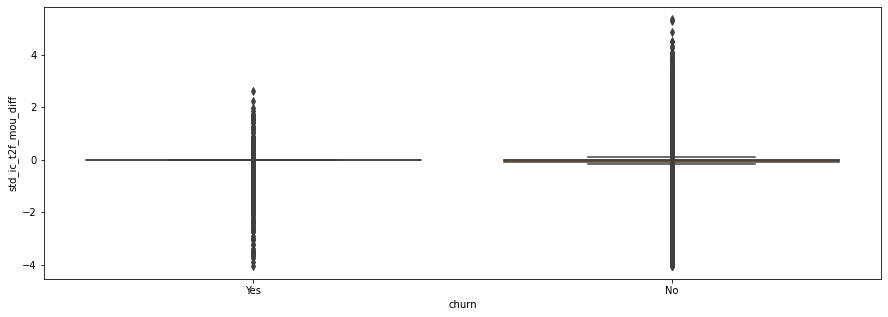

std_ic_mou_diff
1.9144797930951123


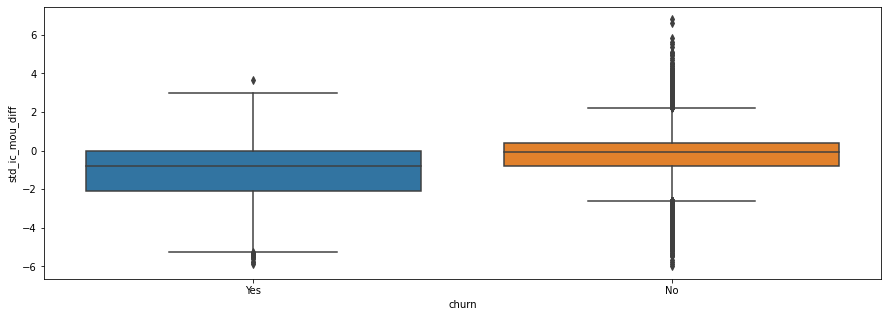

total_ic_mou_diff
0.2542590397908957


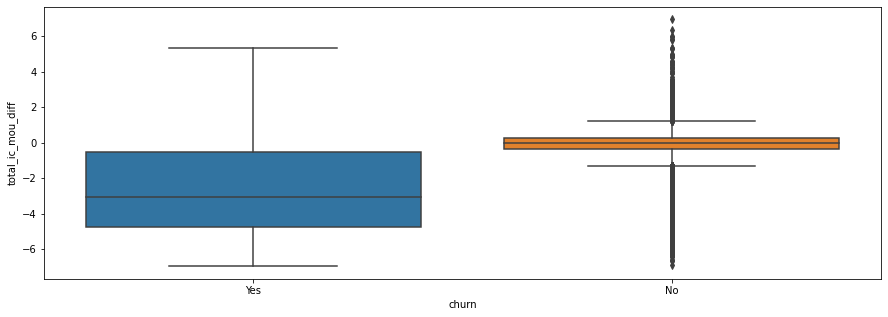

spl_ic_mou_diff
0.0


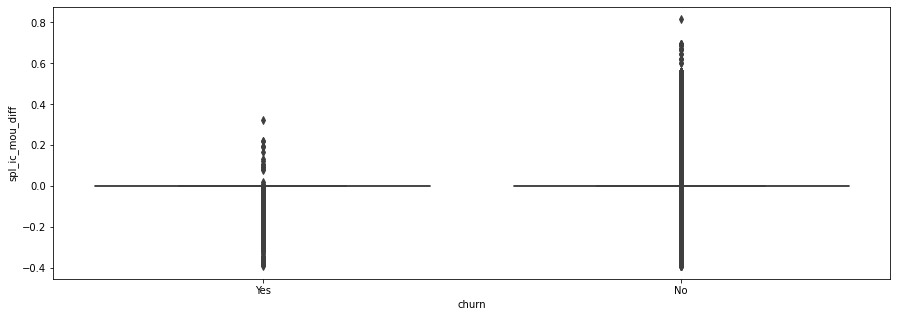

isd_ic_mou_diff
0.0


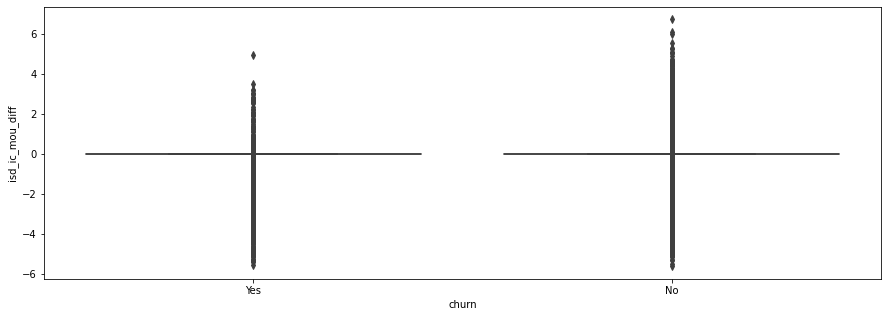

ic_others_diff
0.0


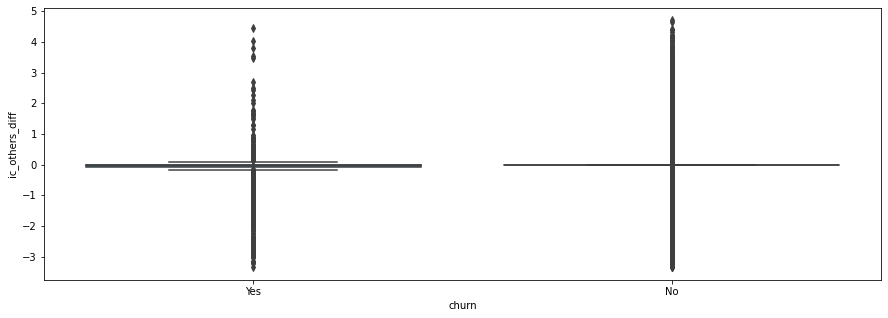

vol_2g_mb_diff
0.0


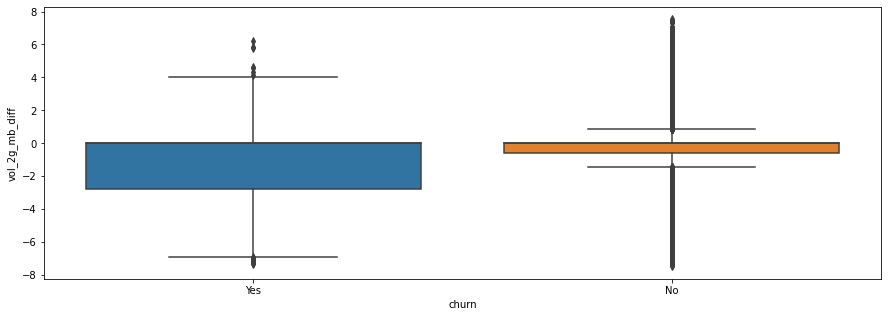

vol_3g_mb_diff
0.0


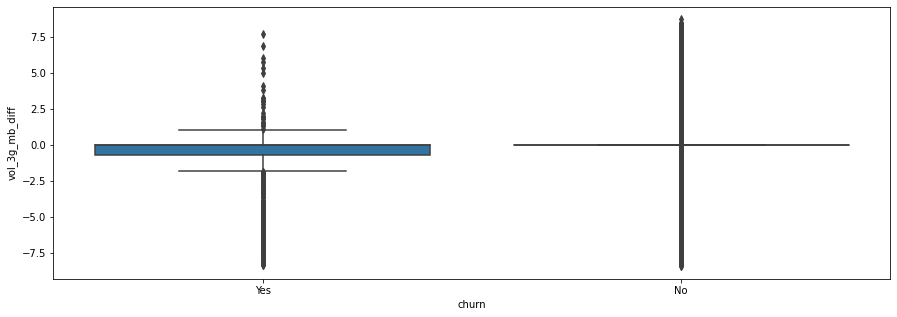

monthly_2g_diff
0.0


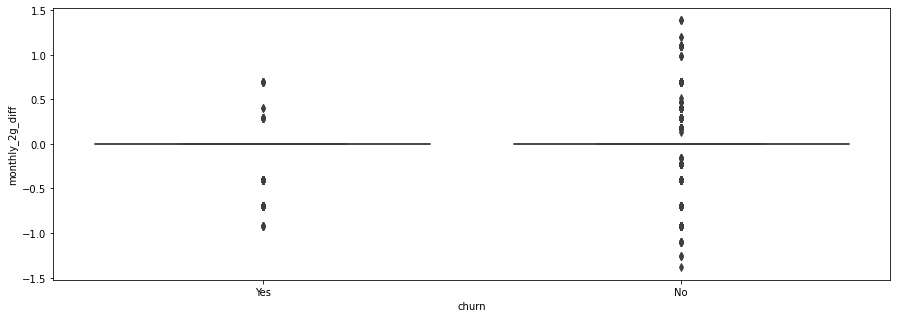

sachet_2g_diff
0.0


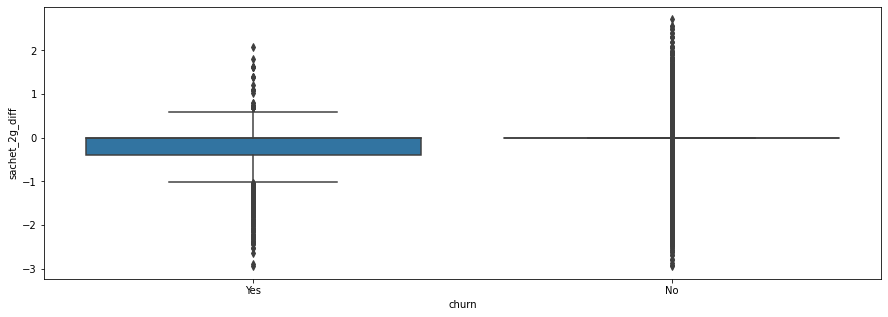

monthly_3g_diff
0.0


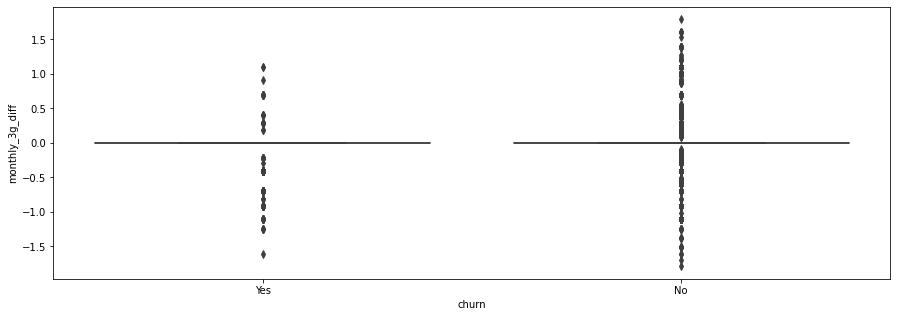

sachet_3g_diff
0.0


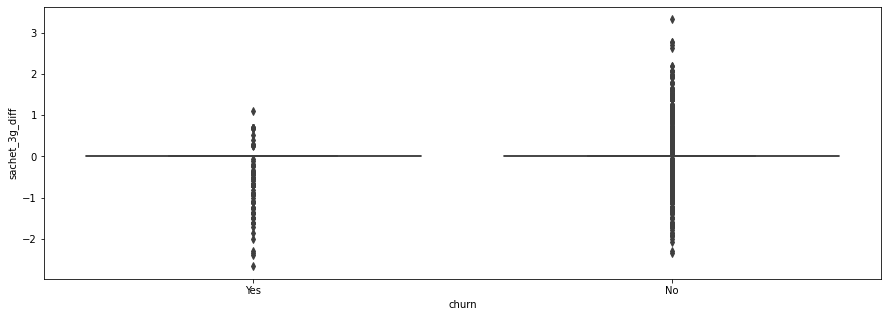

VBC_diff
0.0


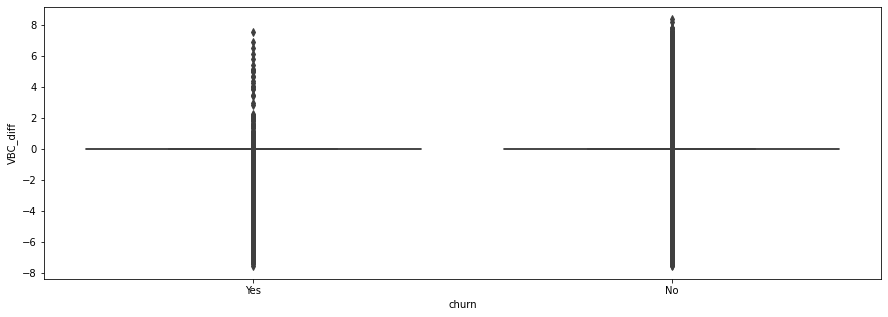

In [81]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
for i in continous_columns:
    if(i != 'churn'):
        print(i)
        print(df_churn[i].quantile(0.95))
        plot_categorical_data(df,'churn',i)
        plt.show()

**Findings from Bivariate Analysis:**
1. loc_og_mou_diff
<200, highly likely to churn

2. std_og_t2t_mou_diff
<10, highly likely to churn

3. Drop in usage for most columns is not able to tell about churn. 

4. Significant increase in usage from good phase to action phase is highly indicative of No Churn, as it will be a happy customer.

In [82]:
#Function to print the highest correlations
def highest_correl(df_temp, i=5):
    correl_var = df_temp.corr().abs()
    np.fill_diagonal(correl_var.values, -2)
    correl_var = correl_var.unstack()
    correl_var = correl_var.sort_values(ascending=False).head(i)
    print(correl_var)

In [83]:
highest_correl(df,50)

og_others_good       og_others_diff         0.974083
og_others_diff       og_others_good         0.974083
loc_og_t2m_mou_8     loc_og_mou_8           0.967104
loc_og_mou_8         loc_og_t2m_mou_8       0.967104
loc_ic_mou_8         loc_ic_t2m_mou_8       0.959758
loc_ic_t2m_mou_8     loc_ic_mou_8           0.959758
loc_og_mou_diff      loc_og_t2m_mou_diff    0.956053
loc_og_t2m_mou_diff  loc_og_mou_diff        0.956053
loc_og_mou_good      loc_og_t2m_mou_good    0.954978
loc_og_t2m_mou_good  loc_og_mou_good        0.954978
loc_ic_mou_diff      loc_ic_t2m_mou_diff    0.944493
loc_ic_t2m_mou_diff  loc_ic_mou_diff        0.944493
loc_ic_mou_good      loc_ic_t2m_mou_good    0.943436
loc_ic_t2m_mou_good  loc_ic_mou_good        0.943436
roam_og_mou_good     roam_ic_mou_good       0.923729
roam_ic_mou_good     roam_og_mou_good       0.923729
roam_ic_mou_8        roam_og_mou_8          0.921507
roam_og_mou_8        roam_ic_mou_8          0.921507
std_og_t2m_mou_good  std_og_mou_good        0.

In [84]:
#Dropping columns based on the Heatmap findings
df = df.drop(['og_others_good','loc_og_t2m_mou_8','loc_ic_t2m_mou_8','loc_og_t2m_mou_good','loc_ic_t2m_mou_diff',
             'loc_ic_t2m_mou_good','std_og_t2m_mou_good','std_ic_t2m_mou_good','std_ic_t2m_mou_8','std_og_t2m_mou_diff','loc_og_t2t_mou_8',
             'VBC_good','std_og_t2t_mou_good','loc_og_t2t_mou_good','loc_ic_mou_good','std_og_t2t_mou_8',
              'total_ic_mou_diff','std_og_t2t_mou_8','std_ic_t2m_mou_diff'],axis = 1)

In [85]:
highest_correl(df,50)

loc_og_t2m_mou_diff  loc_og_mou_diff        0.956053
loc_og_mou_diff      loc_og_t2m_mou_diff    0.956053
roam_ic_mou_good     roam_og_mou_good       0.923729
roam_og_mou_good     roam_ic_mou_good       0.923729
roam_og_mou_8        roam_ic_mou_8          0.921507
roam_ic_mou_8        roam_og_mou_8          0.921507
std_og_t2m_mou_8     std_og_mou_8           0.909808
std_og_mou_8         std_og_t2m_mou_8       0.909808
roam_og_mou_diff     roam_ic_mou_diff       0.896878
roam_ic_mou_diff     roam_og_mou_diff       0.896878
loc_ic_mou_8         loc_ic_t2t_mou_8       0.804847
loc_ic_t2t_mou_8     loc_ic_mou_8           0.804847
std_og_mou_good      std_og_mou_8           0.802569
std_og_mou_8         std_og_mou_good        0.802569
loc_og_t2m_mou_diff  offnet_mou_diff        0.797718
offnet_mou_diff      loc_og_t2m_mou_diff    0.797718
loc_og_mou_diff      offnet_mou_diff        0.794096
offnet_mou_diff      loc_og_mou_diff        0.794096
loc_og_mou_diff      loc_og_t2t_mou_diff    0.

In [86]:
#Dropping further columns based on Heatmap findings
df = df.drop(['loc_og_t2m_mou_diff','roam_ic_mou_good','roam_ic_mou_8','std_og_t2m_mou_8','roam_ic_mou_diff',
             'loc_ic_t2t_mou_8','std_og_mou_8','loc_og_t2m_mou_diff','loc_ic_mou_8','loc_og_t2t_mou_diff',
             'offnet_mou_diff','VBC_8','offnet_mou_good','loc_ic_mou_8','loc_ic_t2f_mou_8','vol_3g_mb_8',
             'offnet_mou_8','onnet_mou_8','loc_og_t2f_mou_8','loc_ic_mou_diff','total_ic_mou_8','std_og_t2t_mou_diff',
             'onnet_mou_diff','loc_ic_t2t_mou_diff','loc_ic_t2t_mou_8'],axis = 1)

In [87]:
highest_correl(df,20)

loc_og_mou_8         loc_og_mou_good        0.727967
loc_og_mou_good      loc_og_mou_8           0.727967
sachet_2g_good       sachet_2g_8            0.721659
sachet_2g_8          sachet_2g_good         0.721659
std_ic_mou_good      std_ic_t2t_mou_good    0.717770
std_ic_t2t_mou_good  std_ic_mou_good        0.717770
onnet_mou_good       total_og_mou_good      0.715750
total_og_mou_good    onnet_mou_good         0.715750
spl_ic_mou_diff      spl_ic_mou_8           0.706134
spl_ic_mou_8         spl_ic_mou_diff        0.706134
std_ic_mou_good      std_ic_mou_8           0.703993
std_ic_mou_8         std_ic_mou_good        0.703993
std_og_mou_diff      total_og_mou_diff      0.694558
total_og_mou_diff    std_og_mou_diff        0.694558
std_ic_t2t_mou_8     std_ic_mou_8           0.692450
std_ic_mou_8         std_ic_t2t_mou_8       0.692450
vol_2g_mb_good       vol_2g_mb_8            0.691948
vol_2g_mb_8          vol_2g_mb_good         0.691948
isd_ic_mou_8         isd_ic_mou_good        0.

In [88]:
#Dropping further columns based on Heatmap findings
df = df.drop(['loc_og_mou_8','sachet_2g_8','std_ic_t2t_mou_good','onnet_mou_good','spl_ic_mou_8','std_ic_mou_8',
             'std_og_mou_diff','std_ic_t2t_mou_8','vol_2g_mb_8','isd_ic_mou_8'],axis = 1)

In [89]:
highest_correl(df,30)

total_og_mou_8       total_og_mou_diff      0.679800
total_og_mou_diff    total_og_mou_8         0.679800
monthly_3g_good      monthly_3g_8           0.665977
monthly_3g_8         monthly_3g_good        0.665977
total_ic_mou_good    loc_ic_t2t_mou_good    0.659699
loc_ic_t2t_mou_good  total_ic_mou_good      0.659699
isd_og_mou_8         isd_og_mou_good        0.641624
isd_og_mou_good      isd_og_mou_8           0.641624
loc_ic_t2t_mou_good  loc_og_mou_good        0.638285
loc_og_mou_good      loc_ic_t2t_mou_good    0.638285
                     total_ic_mou_good      0.636442
total_ic_mou_good    loc_og_mou_good        0.636442
total_og_mou_diff    loc_og_mou_diff        0.634503
loc_og_mou_diff      total_og_mou_diff      0.634503
sachet_3g_8          sachet_3g_good         0.628113
sachet_3g_good       sachet_3g_8            0.628113
total_og_mou_good    std_og_mou_good        0.625655
std_og_mou_good      total_og_mou_good      0.625655
std_ic_mou_good      std_og_mou_good        0.

In [90]:
#Dropping further columns based on Heatmap findings
df = df.drop(['total_og_mou_8','monthly_3g_8','loc_ic_t2t_mou_good','isd_og_mou_8','loc_ic_t2t_mou_good','loc_og_mou_diff',
             'sachet_3g_8','std_og_mou_good','std_ic_mou_good'],axis = 1)

In [91]:
highest_correl(df,30)

total_ic_mou_good    loc_og_mou_good        0.636442
loc_og_mou_good      total_ic_mou_good      0.636442
roam_og_mou_diff     roam_og_mou_good       0.620980
roam_og_mou_good     roam_og_mou_diff       0.620980
monthly_2g_8         monthly_2g_good        0.617468
monthly_2g_good      monthly_2g_8           0.617468
loc_og_t2c_mou_good  spl_og_mou_good        0.612420
spl_og_mou_good      loc_og_t2c_mou_good    0.612420
loc_og_t2c_mou_8     spl_og_mou_8           0.611623
spl_og_mou_8         loc_og_t2c_mou_8       0.611623
loc_og_t2c_mou_8     loc_og_t2c_mou_diff    0.605898
loc_og_t2c_mou_diff  loc_og_t2c_mou_8       0.605898
                     spl_og_mou_diff        0.599936
spl_og_mou_diff      loc_og_t2c_mou_diff    0.599936
total_og_mou_good    loc_og_mou_good        0.599929
loc_og_mou_good      total_og_mou_good      0.599929
std_og_t2f_mou_good  std_og_t2f_mou_8       0.594994
std_og_t2f_mou_8     std_og_t2f_mou_good    0.594994
VBC_diff             vol_3g_mb_diff         0.

In [92]:
#Dropping further columns based on Heatmap findings
df = df.drop(['loc_og_mou_good','roam_og_mou_good','monthly_2g_8','spl_og_mou_good','spl_og_mou_8','loc_og_t2c_mou_8'],axis = 1)

In [93]:
highest_correl(df,30)

spl_og_mou_diff      loc_og_t2c_mou_diff    0.599936
loc_og_t2c_mou_diff  spl_og_mou_diff        0.599936
std_og_t2f_mou_good  std_og_t2f_mou_8       0.594994
std_og_t2f_mou_8     std_og_t2f_mou_good    0.594994
VBC_diff             vol_3g_mb_diff         0.588843
vol_3g_mb_diff       VBC_diff               0.588843
total_og_mou_good    total_ic_mou_good      0.579370
total_ic_mou_good    total_og_mou_good      0.579370
loc_og_t2f_mou_good  loc_ic_t2f_mou_good    0.579201
loc_ic_t2f_mou_good  loc_og_t2f_mou_good    0.579201
loc_og_t2c_mou_good  loc_og_t2c_mou_diff    0.565387
loc_og_t2c_mou_diff  loc_og_t2c_mou_good    0.565387
isd_og_mou_good      isd_og_mou_diff        0.563892
isd_og_mou_diff      isd_og_mou_good        0.563892
monthly_3g_good      vol_3g_mb_good         0.559879
vol_3g_mb_good       monthly_3g_good        0.559879
std_ic_t2f_mou_8     std_ic_t2f_mou_good    0.558713
std_ic_t2f_mou_good  std_ic_t2f_mou_8       0.558713
spl_ic_mou_good      spl_ic_mou_diff        0.

# Step 6: Data Preparation

### Dummy Variable Creation

In [94]:
categorical_columns

['fb_user_action', 'churn', 'fb_user_good']

In [95]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
dummy = pd.get_dummies(df[categorical_columns],drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,dummy],axis=1)

In [96]:
df = df.drop(categorical_columns,axis = 1)

In [97]:
df.columns

Index(['roam_og_mou_8', 'std_og_t2f_mou_8', 'og_others_8', 'std_ic_t2f_mou_8',
       'ic_others_8', 'aon', 'loc_og_t2f_mou_good', 'loc_og_t2c_mou_good',
       'std_og_t2f_mou_good', 'isd_og_mou_good', 'total_og_mou_good',
       'loc_ic_t2f_mou_good', 'std_ic_t2f_mou_good', 'total_ic_mou_good',
       'spl_ic_mou_good', 'isd_ic_mou_good', 'ic_others_good',
       'vol_2g_mb_good', 'vol_3g_mb_good', 'monthly_2g_good', 'sachet_2g_good',
       'monthly_3g_good', 'sachet_3g_good', 'roam_og_mou_diff',
       'loc_og_t2f_mou_diff', 'loc_og_t2c_mou_diff', 'std_og_t2f_mou_diff',
       'isd_og_mou_diff', 'spl_og_mou_diff', 'og_others_diff',
       'total_og_mou_diff', 'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_diff',
       'std_ic_t2f_mou_diff', 'std_ic_mou_diff', 'spl_ic_mou_diff',
       'isd_ic_mou_diff', 'ic_others_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff',
       'monthly_2g_diff', 'sachet_2g_diff', 'monthly_3g_diff',
       'sachet_3g_diff', 'VBC_diff', 'fb_user_action_Unknown',
       '

In [98]:
df = df.rename(columns={'churn_Yes': 'churn'})

In [99]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
for i in continous_columns:
    print(i)
    print(df[i].value_counts())

roam_og_mou_8
0.000000    21019
0.593327        8
0.854415        8
0.270027        7
0.148420        7
            ...  
4.324000        1
5.609765        1
5.795845        1
4.166045        1
5.822039        1
Name: roam_og_mou_8, Length: 3388, dtype: int64
std_og_t2f_mou_8
0.000000    22178
0.300105       23
0.438255       23
0.371564       22
0.231112       22
            ...  
3.948548        1
2.669309        1
3.095125        1
4.212276        1
5.197834        1
Name: std_og_t2f_mou_8, Length: 1221, dtype: int64
og_others_8
0.000000    25347
0.148420        7
1.181727        4
0.048790        3
0.190620        3
            ...  
1.449269        1
3.450305        1
0.285179        1
1.172482        1
0.262364        1
Name: og_others_8, Length: 90, dtype: int64
std_ic_t2f_mou_8
0.000000    19439
0.285179       62
0.307485       52
0.095310       44
0.343590       42
            ...  
2.000128        1
2.672768        1
3.323596        1
1.924249        1
2.290513        1
Name:

Name: vol_2g_mb_diff, Length: 14279, dtype: int64
vol_3g_mb_diff
 0.000000    14443
-0.004988       17
 0.009950        8
-0.014889        5
-0.024693        5
             ...  
 0.694590        1
-1.688190        1
 0.364845        1
 0.417663        1
-0.360449        1
Name: vol_3g_mb_diff, Length: 10927, dtype: int64
monthly_2g_diff
 0.000000    20867
-0.405465     1650
 0.287682      765
 0.693147      653
-0.693147      618
-0.223144      412
-0.916291      161
 0.405465      128
 0.693147       64
 0.182322       41
 1.098612       29
-0.405465       28
-1.098612       11
-0.154151        8
 0.287682        7
 0.470004        6
 1.386294        4
 0.980829        4
-1.252763        3
 1.203973        2
 0.510826        1
 0.133531        1
-1.386294        1
Name: monthly_2g_diff, dtype: int64
sachet_2g_diff
 0.000000    15474
-0.405465     1529
 0.693147      841
-0.693147      737
 0.287682      465
             ...  
-2.058388        1
 1.178655        1
 0.310155        1
-

In [100]:
df = df.sort_index(axis = 1)

### Splitting Data into Training and Test Sets

In [101]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['churn'],axis=1)

# Putting response variable to y
y = df['churn']

y.head()

0     1
7     1
8     0
16    0
17    0
Name: churn, dtype: uint8

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify = y)

In [103]:
y_train.value_counts()/len(y_train.index)*100

0    91.337522
1     8.662478
Name: churn, dtype: float64

In [104]:
y_test.value_counts()/len(y_test.index)*100

0    91.335079
1     8.664921
Name: churn, dtype: float64

**Hence, the stratified has worked properly during train_test_split**

### Feature Standardisation

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()

In [107]:
# Apply scaler() to all the numeric columns
continous_columns_X=X_train.select_dtypes(exclude=['object']).columns.to_list()
X_train[continous_columns_X] = scaler.fit_transform(X_train[continous_columns_X])

In [108]:
X_test[continous_columns_X] = scaler.transform(X_test[continous_columns_X])

In [109]:
X_train.head()

,VBC_diff,aon,fb_user_action_Unknown,fb_user_action_Yes,fb_user_good_Unknown,fb_user_good_Yes,ic_others_8,ic_others_diff,ic_others_good,isd_ic_mou_diff,...,std_og_t2f_mou_8,std_og_t2f_mou_diff,std_og_t2f_mou_good,total_ic_mou_good,total_og_mou_diff,total_og_mou_good,vol_2g_mb_diff,vol_2g_mb_good,vol_3g_mb_diff,vol_3g_mb_good
20659,0.476279,0.554959,1.0,0.0,1.0,0.0,0.000000,0.418449,0.000000,0.455385,...,0.000000,0.516625,0.0,0.808368,0.487877,0.791136,0.499874,0.000000,0.491167,0.000000
81722,0.476279,0.012629,1.0,0.0,1.0,0.0,0.202006,0.427688,0.286396,0.454981,...,0.005476,0.520459,0.0,0.982887,0.514367,0.933143,0.164857,0.670202,0.491167,0.000000
3604,0.476279,0.500398,1.0,0.0,0.0,1.0,0.000000,0.418449,0.000000,0.455385,...,0.000000,0.516625,0.0,0.485185,0.469839,0.647189,0.176369,0.647173,0.491167,0.000000
33848,0.476279,0.666799,0.0,0.0,1.0,0.0,0.000000,0.418449,0.000000,0.455385,...,0.000000,0.516625,0.0,0.813107,0.460365,0.958626,0.499874,0.000000,0.491167,0.000000
22693,0.476316,0.634531,0.0,1.0,0.0,1.0,0.000000,0.418449,0.000000,0.455385,...,0.000000,0.516625,0.0,0.489922,0.365801,0.253052,0.572259,0.440100,0.489917,0.882096


### SMOTE for Data Balancing

In [110]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [111]:
X_train_SMOTE.shape

(32560, 49)

In [112]:
y_train_SMOTE.value_counts()

1    16280
0    16280
Name: churn, dtype: int64

In [113]:
#X_train_SMOTE = X_train
#y_train_SMOTE = y_train

**Hence, the SMOTE technique has led to a balanced class - churn in our dataset.**

**Now we proceed to the Modelling phase.**

# Step 7: Interpretable Model

In [114]:
import statsmodels.api as sm

### Feature Selection Using RFE

In [115]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=100)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_SMOTE,y_train_SMOTE)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True False False False False False False False  True False  True
  True False False False False  True False  True  True  True  True  True
  True  True  True  True  True  True False  True  True False False  True
 False False  True  True False False  True  True False  True False  True
 False]
[10  1  8 23 21 22  5 13 14  1 24  1  1 12 18 25 11  1  3  1  1  1  1  1
  1  1  1  1  1  1 19  1  1 15  9  1  2 20  1  1 17 16  1  1  4  1  6  1
  7]


In [116]:
# Variables selected by RFE 
col = X_train_SMOTE.columns[rfe.support_]

In [117]:
print(col)

Index(['aon', 'isd_ic_mou_diff', 'isd_og_mou_diff', 'isd_og_mou_good',
       'loc_og_t2f_mou_diff', 'monthly_2g_diff', 'monthly_2g_good',
       'monthly_3g_diff', 'monthly_3g_good', 'og_others_8', 'og_others_diff',
       'roam_og_mou_8', 'roam_og_mou_diff', 'sachet_2g_diff', 'sachet_2g_good',
       'sachet_3g_diff', 'spl_ic_mou_diff', 'spl_ic_mou_good',
       'std_ic_t2f_mou_8', 'std_ic_t2t_mou_diff', 'std_og_t2f_mou_8',
       'total_ic_mou_good', 'total_og_mou_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object')


In [118]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_SMOTE[col]

In [119]:
import statsmodels.api as sm

In [120]:
X_train_rfe.head()

,aon,isd_ic_mou_diff,isd_og_mou_diff,isd_og_mou_good,loc_og_t2f_mou_diff,monthly_2g_diff,monthly_2g_good,monthly_3g_diff,monthly_3g_good,og_others_8,...,sachet_3g_diff,spl_ic_mou_diff,spl_ic_mou_good,std_ic_t2f_mou_8,std_ic_t2t_mou_diff,std_og_t2f_mou_8,total_ic_mou_good,total_og_mou_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.554959,0.455385,0.483232,0.000000,0.305089,0.474701,0.000000,0.500000,0.000000,0.0,...,0.418474,0.324698,0.0,0.000000,0.458187,0.000000,0.808368,0.487877,0.499874,0.491167
1,0.012629,0.454981,0.483232,0.000000,0.717681,0.321061,0.323657,0.500000,0.000000,0.0,...,0.418474,0.324698,0.0,0.287880,0.438135,0.005476,0.982887,0.514367,0.164857,0.491167
2,0.500398,0.455385,0.483232,0.000000,0.554366,0.474701,0.000000,0.306574,0.356207,0.0,...,0.418474,0.324698,0.0,0.143441,0.537567,0.000000,0.485185,0.469839,0.176369,0.491167
3,0.666799,0.455385,0.401560,0.167103,0.554366,0.474701,0.000000,0.500000,0.000000,0.0,...,0.418474,0.324698,0.0,0.000000,0.390710,0.000000,0.813107,0.460365,0.499874,0.491167
4,0.634531,0.455385,0.483232,0.000000,0.554366,0.390147,0.731416,0.500000,0.000000,0.0,...,0.539440,0.324698,0.0,0.000000,0.458187,0.000000,0.489922,0.365801,0.572259,0.489917


In [121]:
# Logistic regression model
logm1 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial(),random_state=100)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                32560
Model:                            GLM   Df Residuals:                    32534
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11633.
Date:                Mon, 22 Feb 2021   Deviance:                       23266.
Time:                        22:34:35   Pearson chi2:                 5.81e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.2865      0.549     33.284      0.000      17.210      19.363
aon                    -0.9943      0.070    -14.175      0.000      -1.132      -0.857
isd_ic_mou_diff        -1.1763      0.260     -4.533      0.000      -1.685      -0.668
isd_og_mou_diff         1.2769      0.510      2.503      0.012       0.277       2.277
isd_og_mou_good         1.0461      0.192      5.443      0.000       0.669       1.423
loc_og_t2f_mou_diff    -0.7889      0.209     -3.782      0.000      -1.198      -0.380
monthly_2g_diff        -3.5936      0.390     -9.207      0.000      -4.359      -2.829
monthly_2g_good        -3.8119      0.171    -22.237      0.000      -4.148      -3.476
monthly_3g_diff        -4.4485      0.414    -10.733      0.000      -5.261      -3.636
monthly_3g_good        -2.4323      0.156    -15.584      0.000      -2.738      -2.126
og_others_8           -19.9898      9.032     -2.213      0.027     -37.693      -2.287
og_others_diff          2.0655      0.338      6.105      0.000       1.402       2.729
roam_og_mou_8           1.4356      0.106     13.554      0.000       1.228       1.643
roam_og_mou_diff        1.8490      0.157     11.779      0.000       1.541       2.157
sachet_2g_diff         -2.9460      0.245    -12.023      0.000      -3.426      -2.466
sachet_2g_good         -1.6295      0.105    -15.567      0.000      -1.835      -1.424
sachet_3g_diff         -2.0997      0.424     -4.950      0.000      -2.931      -1.268
spl_ic_mou_diff       -12.7925      0.832    -15.370      0.000     -14.424     -11.161
spl_ic_mou_good        -4.3543      0.283    -15.410      0.000      -4.908      -3.800
std_ic_t2f_mou_8       -1.9520      0.248     -7.864      0.000      -2.438      -1.466
std_ic_t2t_mou_diff    -2.1708      0.216    -10.056      0.000      -2.594      -1.748
std_og_t2f_mou_8       -1.6680      0.265     -6.306      0.000      -2.186      -1.150
total_ic_mou_good      -3.2269      0.087    -37.276      0.000      -3.397      -3.057
total_og_mou_diff      -9.2713      0.159    -58.171      0.000      -9.584      -8.959
vol_2g_mb_diff         -1.9347      0.172    -11.242      0.000      -2.272      -1.597
vol_3g_mb_diff         -1.2445      0.176     -7.087      0.000      -1.589      -0.900
=======================================================================================
"""

In [122]:
#X_train_rfe = X_train_rfe.drop('std_ic_t2f_mou_diff',axis = 1)

In [123]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,isd_og_mou_diff,171.18
7,monthly_3g_diff,90.66
15,sachet_3g_diff,86.36
5,monthly_2g_diff,62.69
13,sachet_2g_diff,49.36
4,loc_og_t2f_mou_diff,38.13
1,isd_ic_mou_diff,38.08
16,spl_ic_mou_diff,35.55
10,og_others_diff,29.40
19,std_ic_t2t_mou_diff,26.74


In [124]:
X_train_rfe = X_train_rfe.drop(['isd_og_mou_diff'],axis = 1)

In [125]:
# Logistic regression model
logm1 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial(),random_state=100)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                32560
Model:                            GLM   Df Residuals:                    32535
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11636.
Date:                Mon, 22 Feb 2021   Deviance:                       23272.
Time:                        22:34:38   Pearson chi2:                 6.01e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.8206      0.507     37.115      0.000      17.827      19.814
aon                    -0.9983      0.070    -14.236      0.000      -1.136      -0.861
isd_ic_mou_diff        -1.0618      0.255     -4.158      0.000      -1.562      -0.561
isd_og_mou_good         0.7499      0.155      4.842      0.000       0.446       1.054
loc_og_t2f_mou_diff    -0.7739      0.209     -3.711      0.000      -1.183      -0.365
monthly_2g_diff        -3.5886      0.390     -9.197      0.000      -4.353      -2.824
monthly_2g_good        -3.8109      0.171    -22.240      0.000      -4.147      -3.475
monthly_3g_diff        -4.4580      0.414    -10.760      0.000      -5.270      -3.646
monthly_3g_good        -2.4209      0.156    -15.525      0.000      -2.727      -2.115
og_others_8           -19.8679      8.967     -2.216      0.027     -37.442      -2.294
og_others_diff          2.0560      0.338      6.078      0.000       1.393       2.719
roam_og_mou_8           1.4420      0.106     13.625      0.000       1.235       1.649
roam_og_mou_diff        1.8481      0.157     11.778      0.000       1.541       2.156
sachet_2g_diff         -2.9563      0.245    -12.071      0.000      -3.436      -2.476
sachet_2g_good         -1.6302      0.105    -15.580      0.000      -1.835      -1.425
sachet_3g_diff         -2.0840      0.424     -4.915      0.000      -2.915      -1.253
spl_ic_mou_diff       -12.7634      0.831    -15.367      0.000     -14.391     -11.136
spl_ic_mou_good        -4.3493      0.282    -15.421      0.000      -4.902      -3.797
std_ic_t2f_mou_8       -1.9495      0.248     -7.849      0.000      -2.436      -1.463
std_ic_t2t_mou_diff    -2.1675      0.216    -10.044      0.000      -2.590      -1.745
std_og_t2f_mou_8       -1.6641      0.265     -6.282      0.000      -2.183      -1.145
total_ic_mou_good      -3.2144      0.086    -37.221      0.000      -3.384      -3.045
total_og_mou_diff      -9.2414      0.159    -58.236      0.000      -9.552      -8.930
vol_2g_mb_diff         -1.9316      0.172    -11.228      0.000      -2.269      -1.594
vol_3g_mb_diff         -1.2504      0.176     -7.124      0.000      -1.594      -0.906
=======================================================================================
"""

In [126]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,sachet_3g_diff,80.60
6,monthly_3g_diff,79.67
4,monthly_2g_diff,57.04
12,sachet_2g_diff,48.07
3,loc_og_t2f_mou_diff,37.03
15,spl_ic_mou_diff,34.91
1,isd_ic_mou_diff,34.91
9,og_others_diff,28.94
18,std_ic_t2t_mou_diff,26.59
23,vol_3g_mb_diff,19.76


In [127]:
X_train_rfe = X_train_rfe.drop(['sachet_3g_diff','monthly_2g_diff','monthly_3g_diff','sachet_2g_diff'],axis = 1)

In [128]:
# Logistic regression model
logm1 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial(), random_state=100)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                32560
Model:                            GLM   Df Residuals:                    32539
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11766.
Date:                Mon, 22 Feb 2021   Deviance:                       23532.
Time:                        22:34:40   Pearson chi2:                 6.57e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.9381      0.360     38.681      0.000      13.232      14.644
aon                    -1.0253      0.070    -14.718      0.000      -1.162      -0.889
isd_ic_mou_diff        -1.0643      0.253     -4.199      0.000      -1.561      -0.568
isd_og_mou_good         0.8035      0.154      5.210      0.000       0.501       1.106
loc_og_t2f_mou_diff    -0.7479      0.207     -3.608      0.000      -1.154      -0.342
monthly_2g_good        -3.2783      0.133    -24.641      0.000      -3.539      -3.018
monthly_3g_good        -1.9050      0.134    -14.253      0.000      -2.167      -1.643
og_others_8           -19.4821      8.890     -2.192      0.028     -36.905      -2.059
og_others_diff          1.8732      0.336      5.568      0.000       1.214       2.533
roam_og_mou_8           1.3917      0.105     13.226      0.000       1.185       1.598
roam_og_mou_diff        1.8247      0.156     11.688      0.000       1.519       2.131
sachet_2g_good         -1.1391      0.088    -12.923      0.000      -1.312      -0.966
spl_ic_mou_diff       -13.0187      0.839    -15.525      0.000     -14.662     -11.375
spl_ic_mou_good        -4.3858      0.284    -15.431      0.000      -4.943      -3.829
std_ic_t2f_mou_8       -1.9942      0.248     -8.044      0.000      -2.480      -1.508
std_ic_t2t_mou_diff    -2.1529      0.215    -10.012      0.000      -2.574      -1.731
std_og_t2f_mou_8       -1.6728      0.265     -6.314      0.000      -2.192      -1.154
total_ic_mou_good      -3.2028      0.085    -37.871      0.000      -3.369      -3.037
total_og_mou_diff      -9.4761      0.158    -60.160      0.000      -9.785      -9.167
vol_2g_mb_diff         -3.2436      0.149    -21.809      0.000      -3.535      -2.952
vol_3g_mb_diff         -2.6469      0.145    -18.208      0.000      -2.932      -2.362
=======================================================================================
"""

In [129]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_t2f_mou_diff,32.48
1,isd_ic_mou_diff,31.70
11,spl_ic_mou_diff,30.27
14,std_ic_t2t_mou_diff,25.10
7,og_others_diff,24.42
9,roam_og_mou_diff,16.62
18,vol_2g_mb_diff,15.86
19,vol_3g_mb_diff,15.85
16,total_ic_mou_good,12.81
17,total_og_mou_diff,8.16


In [130]:
X_train_rfe = X_train_rfe.drop('loc_og_t2f_mou_diff',axis = 1)

In [131]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,isd_ic_mou_diff,29.90
10,spl_ic_mou_diff,28.56
13,std_ic_t2t_mou_diff,24.49
6,og_others_diff,23.62
8,roam_og_mou_diff,16.57
17,vol_2g_mb_diff,15.80
18,vol_3g_mb_diff,15.57
15,total_ic_mou_good,12.80
16,total_og_mou_diff,8.11
0,aon,5.24


In [132]:
X_train_rfe = X_train_rfe.drop('isd_ic_mou_diff',axis = 1)

In [133]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_diff,26.57
12,std_ic_t2t_mou_diff,23.37
5,og_others_diff,22.46
7,roam_og_mou_diff,16.26
16,vol_2g_mb_diff,15.67
17,vol_3g_mb_diff,15.23
14,total_ic_mou_good,12.75
15,total_og_mou_diff,8.09
0,aon,5.24
10,spl_ic_mou_good,1.92


In [134]:
X_train_rfe = X_train_rfe.drop('spl_ic_mou_diff',axis = 1)

In [135]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,std_ic_t2t_mou_diff,21.59
5,og_others_diff,19.85
7,roam_og_mou_diff,15.92
15,vol_2g_mb_diff,15.40
16,vol_3g_mb_diff,14.86
13,total_ic_mou_good,12.01
14,total_og_mou_diff,8.09
0,aon,5.23
6,roam_og_mou_8,1.91
8,sachet_2g_good,1.66


In [136]:
X_train_rfe = X_train_rfe.drop('std_ic_t2t_mou_diff',axis = 1)

In [137]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,og_others_diff,17.17
7,roam_og_mou_diff,15.32
14,vol_2g_mb_diff,15.18
15,vol_3g_mb_diff,14.63
12,total_ic_mou_good,11.94
13,total_og_mou_diff,7.18
0,aon,5.22
6,roam_og_mou_8,1.85
8,sachet_2g_good,1.63
10,std_ic_t2f_mou_8,1.44


In [138]:
# Logistic regression model
logm1 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial(),random_state=100)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                32560
Model:                            GLM   Df Residuals:                    32543
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12136.
Date:                Mon, 22 Feb 2021   Deviance:                       24272.
Time:                        22:34:47   Pearson chi2:                 4.22e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0436      0.157     51.097      0.000       7.735       8.352
aon                  -0.9053      0.068    -13.272      0.000      -1.039      -0.772
isd_og_mou_good       0.9107      0.148      6.150      0.000       0.620       1.201
monthly_2g_good      -3.3289      0.132    -25.240      0.000      -3.587      -3.070
monthly_3g_good      -1.8341      0.131    -13.949      0.000      -2.092      -1.576
og_others_8         -19.4948      8.750     -2.228      0.026     -36.645      -2.345
og_others_diff        2.2001      0.329      6.677      0.000       1.554       2.846
roam_og_mou_8         1.4954      0.103     14.554      0.000       1.294       1.697
roam_og_mou_diff      1.9341      0.153     12.641      0.000       1.634       2.234
sachet_2g_good       -1.2722      0.087    -14.706      0.000      -1.442      -1.103
spl_ic_mou_good      -0.4332      0.095     -4.544      0.000      -0.620      -0.246
std_ic_t2f_mou_8     -1.9968      0.246     -8.131      0.000      -2.478      -1.515
std_og_t2f_mou_8     -1.6695      0.263     -6.339      0.000      -2.186      -1.153
total_ic_mou_good    -3.0959      0.082    -37.665      0.000      -3.257      -2.935
total_og_mou_diff   -10.4075      0.146    -71.089      0.000     -10.694     -10.121
vol_2g_mb_diff       -3.3231      0.146    -22.798      0.000      -3.609      -3.037
vol_3g_mb_diff       -2.6808      0.143    -18.791      0.000      -2.960      -2.401
=====================================================================================
"""

### Finding the Optimal Cutoff Point

In [139]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(random_state=100)
logsk.fit(X_train_rfe, y_train_SMOTE)

LogisticRegression(random_state=100)

In [140]:
X_test_rfe = X_test[X_train_rfe.columns]

In [141]:
# Predicted probabilities
y_pred_train = logsk.predict_proba(X_train_rfe)
# Converting y_pred to a dataframe which is an array
y_pred_train_df = pd.DataFrame(y_pred_train)
# Converting to column dataframe
y_pred_train_1 = y_pred_train_df.iloc[:,[1]]
# Let's see the head
y_pred_train_1.head()

,1
0,0.133476
1,0.092205
2,0.376215
3,0.172354
4,0.130589


In [142]:
y_pred_train

array([[0.86652379, 0.13347621],
       [0.90779498, 0.09220502],
       [0.62378534, 0.37621466],
       ...,
       [0.13795441, 0.86204559],
       [0.1373233 , 0.8626767 ],
       [0.14020162, 0.85979838]])

In [143]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train_SMOTE)
y_train_df.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_train_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_train_final = pd.concat([y_train_df,y_pred_train_1],axis=1)
# Renaming the column 
y_pred_train_final= y_pred_train_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_train_final.head()

,churn,Churn_Prob
0,0,0.133476
1,0,0.092205
2,0,0.376215
3,0,0.172354
4,0,0.130589


In [145]:
y_pred_train_final['churn'].value_counts()

1    16280
0    16280
Name: churn, dtype: int64

#### Finding Optimal Cutoff Point

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_train_final[i]= y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_train_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.133476,1,1,0,0,0,0,0,0,0,0
1,0,0.092205,1,0,0,0,0,0,0,0,0,0
2,0,0.376215,1,1,1,1,0,0,0,0,0,0
3,0,0.172354,1,1,0,0,0,0,0,0,0,0
4,0,0.130589,1,1,0,0,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_train_final.churn, y_pred_train_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.661916  0.982924  0.340909
0.2   0.2  0.773771  0.953133  0.594410
0.3   0.3  0.824447  0.908600  0.740295
0.4   0.4  0.842998  0.862285  0.823710
0.5   0.5  0.845823  0.816339  0.875307
0.6   0.6  0.834982  0.760627  0.909337
0.7   0.7  0.816339  0.696867  0.935811
0.8   0.8  0.790633  0.624877  0.956388
0.9   0.9  0.736087  0.498771  0.973403


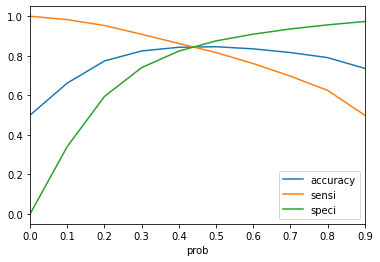

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take as a cutoff probability. This is because we need to maximize our sensitivity.

### Making Predictions

In [149]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_rfe)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.193144
1,0.095475
2,0.070979
3,0.045416
4,0.186898


In [150]:
y_pred

array([[0.80685585, 0.19314415],
       [0.90452495, 0.09547505],
       [0.92902115, 0.07097885],
       ...,
       [0.88805831, 0.11194169],
       [0.77336112, 0.22663888],
       [0.97312182, 0.02687818]])

In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
85106,0
62647,0
86056,0
51303,0
24830,0


In [152]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Churn_Prob
0,0,0.193144
1,0,0.095475
2,0,0.070979
3,0,0.045416
4,0,0.186898


In [153]:
y_pred_final['churn'].value_counts()

0    6978
1     662
Name: churn, dtype: int64

In [154]:
# Creating new column 'predicted' with 1 if Churn_Prob> Cutoff probability of 0.4 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0,0.193144,0
1,0,0.095475,0
2,0,0.070979,0
3,0,0.045416,0
4,0,0.186898,0


In [155]:
y_pred_final['predicted'].value_counts()

0    5849
1    1791
Name: predicted, dtype: int64

In [156]:
from sklearn import metrics

In [157]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[5734, 1244],
       [ 115,  547]], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [159]:
print(confusion_matrix(y_pred_final.churn, y_pred_final.predicted))
print(accuracy_score(y_pred_final.churn, y_pred_final.predicted))
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

[[5734 1244]
 [ 115  547]]
0.8221204188481676
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      6978
           1       0.31      0.83      0.45       662

    accuracy                           0.82      7640
   macro avg       0.64      0.82      0.67      7640
weighted avg       0.92      0.82      0.86      7640



In [160]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

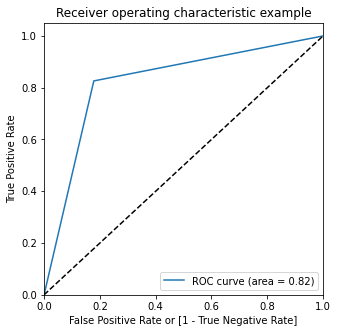

In [161]:
# Calling the function
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [162]:
coeffecients = pd.DataFrame(logsk.coef_.reshape(-1,),X_train_rfe.columns)
coeffecients.columns = ['Coeffecient']
coeffecients = coeffecients.sort_values(by='Coeffecient')

In [163]:
print(coeffecients)

                   Coeffecient
total_og_mou_diff   -10.200565
vol_2g_mb_diff       -3.253378
monthly_2g_good      -3.237240
total_ic_mou_good    -3.061221
vol_3g_mb_diff       -2.639215
std_ic_t2f_mou_8     -1.956250
monthly_3g_good      -1.766937
og_others_8          -1.738831
std_og_t2f_mou_8     -1.623416
sachet_2g_good       -1.240788
aon                  -0.905620
spl_ic_mou_good      -0.435761
isd_og_mou_good       0.888433
roam_og_mou_8         1.516592
og_others_diff        1.843314
roam_og_mou_diff      1.844557


**The 5 most important factors affecting churn are as follows:**
1. total_og_mou_diff            
2. vol_2g_mb_diff           
3. monthly_2g_good
4. total_ic_mou_good        
5. vol_3g_mb_diff


**Recommendations to the Business Team:**
1. Total Outgoing Minutes of Usage: Decrease in total outgoing minutes of usage from good phase to action phase leads to churn.
2. Volume of 2g data: Decrease in total usage of 2g data indicates high chances of churn.
3. monthly_2g_good: Users with lesser recharge 2g data in good phase show higher chances of churn.
4. total_ic_mou_good: Users with lesser incoming minutes in the good phase show higher chances of churn.
5. Volume of 3g data: Decrease in total usage of 3g data indicates high chances of churn. 

**Random Forest Classifier**

In [164]:
from sklearn.ensemble import RandomForestClassifier
class_weight = {0:1,1:100}
classifier = RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [165]:
# Making predictions
predictions = classifier.predict(X_test)

In [166]:
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

[[6606  372]
 [ 248  414]]
0.918848167539267
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6978
           1       0.53      0.63      0.57       662

    accuracy                           0.92      7640
   macro avg       0.75      0.79      0.76      7640
weighted avg       0.93      0.92      0.92      7640



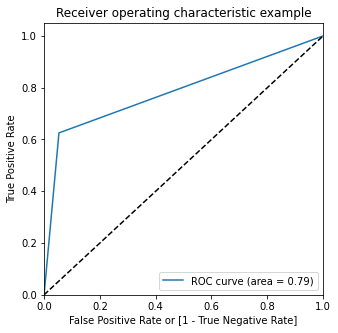

In [167]:
# Calling the function
draw_roc(y_test, predictions)

In [168]:
auc_score = metrics.roc_auc_score(y_test, predictions)

In [169]:
print(auc_score)

0.7860336196886374


**We are selecting the Logistic Regression model as it gives us good accuracy, sensitivity and accuracy.**

# Step 8: High Performance Model (with PCA)

### PCA on the data

In [170]:
X_train.shape

(17824, 49)

In [171]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA(random_state=42)

In [173]:
pca.fit(X_train_SMOTE)

PCA(random_state=42)

#### Components from the PCA

In [174]:
pca.components_

array([[-5.45468745e-03,  9.61222584e-03, -4.24310138e-01, ...,
         2.53779442e-01, -7.20094787e-03,  2.50329409e-01],
       [ 9.75410076e-02,  1.30116060e-01, -5.59774435e-01, ...,
        -1.89981667e-01,  1.73602187e-01, -1.24614948e-01],
       [-1.75618822e-02,  3.82153240e-01,  1.27996488e-01, ...,
         4.69472753e-03, -4.47801425e-02,  8.32537490e-02],
       ...,
       [-1.27950825e-16,  1.93670711e-17,  8.19183110e-17, ...,
         1.38777878e-16,  1.38777878e-16,  4.16333634e-17],
       [-0.00000000e+00,  8.32667268e-17,  8.48655637e-17, ...,
         1.94289029e-16,  1.66533454e-16, -5.55111512e-17],
       [ 0.00000000e+00,  6.93889390e-18,  2.21064004e-17, ...,
        -2.77555756e-17, -5.55111512e-17,  0.00000000e+00]])

Looking at the explained variance ratio for each component

In [175]:
pca.explained_variance_ratio_

array([4.17568879e-01, 1.11536372e-01, 7.08650560e-02, 5.37241695e-02,
       3.28630341e-02, 3.18649762e-02, 2.58480658e-02, 2.46789920e-02,
       2.22847400e-02, 2.01426339e-02, 1.79508244e-02, 1.66158511e-02,
       1.49217233e-02, 1.36608057e-02, 1.24051899e-02, 1.13741230e-02,
       1.02990225e-02, 9.56076095e-03, 6.72134522e-03, 5.99954798e-03,
       5.78213786e-03, 5.34519394e-03, 5.24023318e-03, 5.04816843e-03,
       4.60520649e-03, 4.53303982e-03, 4.29089218e-03, 3.86878019e-03,
       3.51853348e-03, 3.28102041e-03, 3.26795757e-03, 2.59945487e-03,
       2.12010915e-03, 2.03459870e-03, 1.89914361e-03, 1.77927889e-03,
       1.68772816e-03, 1.58219654e-03, 1.44562458e-03, 1.31132927e-03,
       1.25336213e-03, 1.11417721e-03, 6.15618524e-04, 4.21770405e-04,
       3.65089734e-04, 1.03241468e-04, 8.23509410e-32, 2.49375410e-33,
       1.07096078e-33])

Making a scree plot for the explained variance

In [176]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

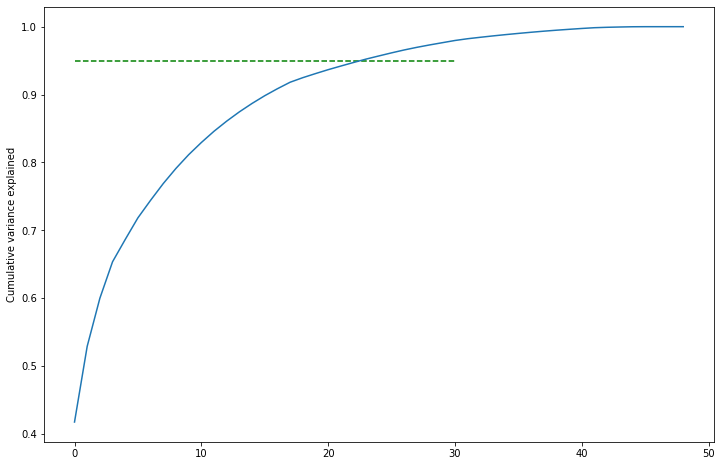

In [177]:
fig = plt.figure(figsize=[12,8])
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 16 components

In [178]:
from sklearn.decomposition import IncrementalPCA

In [179]:
pca_final = IncrementalPCA(n_components=25)

In [180]:
df_train_pca = pca_final.fit_transform(X_train_SMOTE)

In [181]:
df_train_pca.shape

(32560, 25)

In [182]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [183]:
corrmat.shape

(25, 25)

In [184]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7640, 25)

### Applying Logistic Regression on the data on our Principal components

In [185]:
df_train_pca.shape

(32560, 25)

In [186]:
y_train.shape

(17824,)

In [187]:
df_test_pca.shape

(7640, 25)

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
learner_pca = LogisticRegression(random_state=100)

In [190]:
model_pca = learner_pca.fit(df_train_pca, y_train_SMOTE)

Making predictions on the train set

In [191]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [192]:
pred_probs_train

array([[0.76409273, 0.23590727],
       [0.94562   , 0.05438   ],
       [0.58139241, 0.41860759],
       ...,
       [0.10205548, 0.89794452],
       [0.10026514, 0.89973486],
       [0.16944134, 0.83055866]])

In [193]:
# Predicted probabilities
#y_pred_train = logsk.predict_proba(X_train_rfe)
# Converting y_pred to a dataframe which is an array
y_pred_pca_train_df = pd.DataFrame(pred_probs_train)
# Converting to column dataframe
y_pred_pca_train_1 = y_pred_pca_train_df.iloc[:,[1]]
# Let's see the head
y_pred_pca_train_1.head()

,1
0,0.235907
1,0.054380
2,0.418608
3,0.283933
4,0.141351


In [194]:
# Converting y_train to dataframe
y_train_pca_df = pd.DataFrame(y_train_SMOTE)
y_train_pca_df.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [195]:
# Removing index for both dataframes to append them side by side 
y_pred_pca_train_1.reset_index(drop=True, inplace=True)
y_train_pca_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_pca_train_final = pd.concat([y_train_pca_df,y_pred_pca_train_1],axis=1)
# Renaming the column 
y_pred_pca_train_final= y_pred_pca_train_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_pca_train_final.head()

,churn,Churn_Prob
0,0,0.235907
1,0,0.054380
2,0,0.418608
3,0,0.283933
4,0,0.141351


In [196]:
y_pred_pca_train_final['churn'].value_counts()

1    16280
0    16280
Name: churn, dtype: int64

#### Finding Optimal Cutoff Point

In [197]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_pca_train_final[i]= y_pred_pca_train_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_pca_train_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235907,1,1,1,0,0,0,0,0,0,0
1,0,0.054380,1,0,0,0,0,0,0,0,0,0
2,0,0.418608,1,1,1,1,1,0,0,0,0,0
3,0,0.283933,1,1,1,0,0,0,0,0,0,0
4,0,0.141351,1,1,0,0,0,0,0,0,0,0


In [198]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_pca_train_final.churn, y_pred_pca_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.676106  0.980897  0.371314
0.2   0.2  0.766615  0.951167  0.582064
0.3   0.3  0.817752  0.909582  0.725921
0.4   0.4  0.840878  0.869595  0.812162
0.5   0.5  0.843735  0.820700  0.866769
0.6   0.6  0.838299  0.771622  0.904975
0.7   0.7  0.823679  0.713084  0.934275
0.8   0.8  0.794287  0.632248  0.956327
0.9   0.9  0.728686  0.483477  0.973894


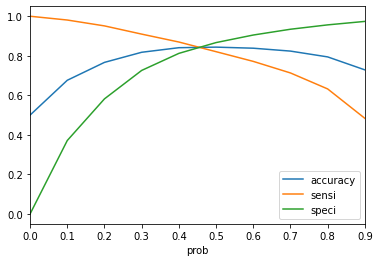

In [199]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take as a cutoff probability. This is because we need to maximize our sensitivity.

### Making Predictions

Making predictions on the test set

In [200]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [201]:
pred_probs_test

array([[0.92762204, 0.07237796],
       [0.98634178, 0.01365822],
       [0.92241681, 0.07758319],
       ...,
       [0.84502282, 0.15497718],
       [0.87204906, 0.12795094],
       [0.973432  , 0.026568  ]])

In [202]:
# Predicted probabilities
#y_pred_train = logsk.predict_proba(X_train_rfe)
# Converting y_pred to a dataframe which is an array
y_pred_pca_test_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_pca_test_1 = y_pred_pca_test_df.iloc[:,[1]]
# Let's see the head
y_pred_pca_test_1.head()

,1
0,0.072378
1,0.013658
2,0.077583
3,0.036173
4,0.042669


In [203]:
# Converting y_train to dataframe
y_test_pca_df = pd.DataFrame(y_test)
y_test_pca_df.head()

,churn
85106,0
62647,0
86056,0
51303,0
24830,0


In [204]:
# Removing index for both dataframes to append them side by side 
y_pred_pca_test_1.reset_index(drop=True, inplace=True)
y_test_pca_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_pca_final = pd.concat([y_test_pca_df,y_pred_pca_test_1],axis=1)
# Renaming the column 
y_pred_pca_final= y_pred_pca_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_pca_final.head()

,churn,Churn_Prob
0,0,0.072378
1,0,0.013658
2,0,0.077583
3,0,0.036173
4,0,0.042669


In [205]:
y_pred_pca_final['churn'].value_counts()

0    6978
1     662
Name: churn, dtype: int64

In [206]:
# Creating new column 'predicted' with 1 if Churn_Prob> Cutoff probability of 0.1 else 0
y_pred_pca_final['predicted'] = y_pred_pca_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_pca_final.head()

,churn,Churn_Prob,predicted
0,0,0.072378,0
1,0,0.013658,0
2,0,0.077583,0
3,0,0.036173,0
4,0,0.042669,0


In [207]:
y_pred_pca_final['predicted'].value_counts()

0    5779
1    1861
Name: predicted, dtype: int64

In [208]:
from sklearn import metrics

In [209]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_pca_final.churn, y_pred_pca_final.predicted )
confusion

array([[5674, 1304],
       [ 105,  557]], dtype=int64)

In [210]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [211]:
print(confusion_matrix(y_pred_pca_final.churn, y_pred_pca_final.predicted))
print(accuracy_score(y_pred_pca_final.churn, y_pred_pca_final.predicted))
print(classification_report(y_pred_pca_final.churn, y_pred_pca_final.predicted))

[[5674 1304]
 [ 105  557]]
0.8155759162303665
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      6978
           1       0.30      0.84      0.44       662

    accuracy                           0.82      7640
   macro avg       0.64      0.83      0.67      7640
weighted avg       0.92      0.82      0.85      7640



In [212]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

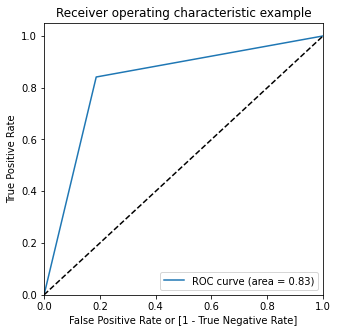

In [213]:
# Calling the function
draw_roc(y_pred_pca_final.churn, y_pred_pca_final.predicted)

# Step 9: Hyperparameter Tuning

In [214]:
from sklearn.model_selection import StratifiedKFold

In [215]:
log_hyper = LogisticRegression(random_state=100)
#setting hyperparameter options
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
#stratified k-fold Cross-Validation
cv = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
#Grid Search
gcv = GridSearchCV(log_hyper,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
#fit model
gcv.fit(X_train_rfe,y_train_SMOTE)
THRESHOLD = 0.4
y_pred_hyper = gcv.predict_proba(X_test_rfe)

In [218]:
y_pred_hyper

array([[0.80739543, 0.19260457],
       [0.90536456, 0.09463544],
       [0.9329792 , 0.0670208 ],
       ...,
       [0.89195576, 0.10804424],
       [0.77353104, 0.22646896],
       [0.97628387, 0.02371613]])

In [219]:
y_pred_hyper.shape

(7640, 2)

In [220]:
X_test_rfe.shape

(7640, 16)

In [221]:
# Converting y_pred to a dataframe which is an array
y_pred_hyper_df = pd.DataFrame(y_pred_hyper)
# Converting to column dataframe
y_pred_hyper_1 = y_pred_hyper_df.iloc[:,[1]]
# Let's see the head
y_pred_hyper_1.head()

,1
0,0.192605
1,0.094635
2,0.067021
3,0.043440
4,0.185993


In [222]:
# Converting y_test to dataframe
y_test_hyper_df = pd.DataFrame(y_test)
y_test_hyper_df.head()

,churn
85106,0
62647,0
86056,0
51303,0
24830,0


In [223]:
# Removing index for both dataframes to append them side by side 
y_pred_hyper_1.reset_index(drop=True, inplace=True)
y_test_hyper_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_hyper_final = pd.concat([y_test_hyper_df,y_pred_hyper_1],axis=1)
# Renaming the column 
y_pred_hyper_final= y_pred_hyper_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_hyper_final.head()

,churn,Churn_Prob
0,0,0.192605
1,0,0.094635
2,0,0.067021
3,0,0.043440
4,0,0.185993


In [224]:
y_pred_hyper_final['churn'].value_counts()

0    6978
1     662
Name: churn, dtype: int64

In [225]:
# Creating new column 'predicted' with 1 if Churn_Prob> Cutoff probability of 0.4 else 0
y_pred_hyper_final['predicted'] = y_pred_hyper_final.Churn_Prob.map( lambda x: 1 if x > THRESHOLD else 0)
# Let's see the head
y_pred_hyper_final.head()

,churn,Churn_Prob,predicted
0,0,0.192605,0
1,0,0.094635,0
2,0,0.067021,0
3,0,0.043440,0
4,0,0.185993,0


In [226]:
y_pred_hyper_final['predicted'].value_counts()

0    5855
1    1785
Name: predicted, dtype: int64

In [227]:
from sklearn import metrics

In [228]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_hyper_final.churn, y_pred_hyper_final.predicted )
confusion

array([[5741, 1237],
       [ 114,  548]], dtype=int64)

In [229]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [230]:
print(confusion_matrix(y_pred_hyper_final.churn, y_pred_hyper_final.predicted))
print(accuracy_score(y_pred_hyper_final.churn, y_pred_hyper_final.predicted))
print(classification_report(y_pred_hyper_final.churn, y_pred_hyper_final.predicted))

[[5741 1237]
 [ 114  548]]
0.8231675392670157
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      6978
           1       0.31      0.83      0.45       662

    accuracy                           0.82      7640
   macro avg       0.64      0.83      0.67      7640
weighted avg       0.92      0.82      0.86      7640



In [231]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

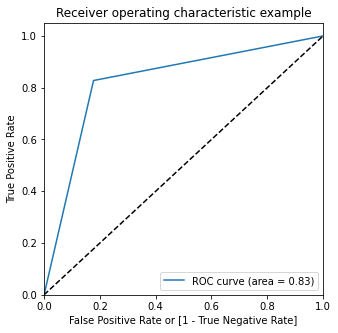

In [232]:
# Calling the function
draw_roc(y_pred_hyper_final.churn, y_pred_hyper_final.predicted)

**Hyperparameter tuning of the Logistic Regression model had negligible change on the sensitivity of the model.**

# Step 10: Recommendations

**The 5 most important factors affecting churn are as follows:**
1. total_og_mou_diff            
2. vol_2g_mb_diff           
3. monthly_2g_good
4. total_ic_mou_good        
5. vol_3g_mb_diff


**Recommendations to the Business Team:**
1. Total Outgoing Minutes of Usage: Decrease in total outgoing minutes of usage from good phase to action phase leads to churn.
2. Volume of 2g data: Decrease in total usage of 2g data indicates high chances of churn.
3. monthly_2g_good: Users with lesser recharge 2g data in good phase show higher chances of churn.
4. total_ic_mou_good: Users with lesser incoming minutes in the good phase show higher chances of churn.
5. Volume of 3g data: Decrease in total usage of 3g data indicates high chances of churn. 